# Whole data evaluation_version_1

In [1]:
%matplotlib inline
import math
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import numpy as np
#import scipy as sp
from scipy.stats import *
import scipy.special as sp
from scipy.interpolate import*
from scipy import integrate
from ipywidgets import interact, interactive
from ipywidgets import widgets
from IPython.display import display
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
import matplotlib . font_manager as font_manager
from matplotlib import container
from scipy.optimize import curve_fit
from scipy.interpolate import UnivariateSpline
import numpy.polynomial.polynomial as poly
from scipy import optimize
import pandas as pd
#pd.set_option("html",False)
pd.set_option("max_columns",30)
pd.set_option("max_rows",90000)
#import mpld3  ##helps to make zoom in and zoomout 
#mpld3.enable_notebook()
#plt.style.use('bmh')
#from mpld3 import plugins
#from mpld3.utils import get_id
import collections
#import seaborn as sns
import matplotlib.ticker as mtick
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from uncertainties import ufloat

In [2]:
#%config InlineBackend.print_figure_kwargs={'bbox_inches':None}
#%load_ext autoreload
#%autoreload 2
import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'w'

# IVY modified 

In [3]:
Photo_summary=pd.read_excel("/Users/getachew/surfdrive/Photosynthesis/Second_phase_Experiment/Photosynthesis paper/Summary_photosynthesis_Final_#IVY.xlsx"
                        ,sheet_name=0)

In [4]:
Photo_summary

Unnamed: 0  d13C_in  Unnamed: 2   d17O_in   Unnamed: 4  d18O_in   \
0     EXP3_NL  -10.232       0.006  15.763000    0.023000    30.485   
1     EXP3_NH  -10.232       0.006  15.763000    0.023000    30.485   
2   EXP1_EL_1  -11.130       0.008  17.081000    0.017000    31.797   
3     EXP2_NH  -10.232       0.006  15.763219    0.022888    30.485   
4     EXP1_NH  -10.232       0.006  15.763219    0.022888    30.482   
5     EXP2_NL  -10.232       0.006  15.763219    0.022888    30.482   
6     EXP1_NL  -10.232       0.006  15.763219    0.022888    30.482   
7    EXP1_ELS   -3.271       0.032  14.616000    0.025000    27.259   
8    EXP2_ELS   -3.271       0.032  14.616000    0.025000    27.259   
9    EXP3_ELS   -3.271       0.032  14.616000    0.025000    27.259   
10   EXP2_EHS   -3.271       0.032  14.616000    0.025000    27.259   
11   EXP3_EHS   -3.271       0.032  14.616000    0.025000    27.259   
12   EXP1_NLM  -10.232       0.006  15.763219    0.022888    30.482   
13   EXP2_NHM  -10.232       0.006  15.763219    0.022888    30.482   
14   EXP3_NHM  -10.232       0.006  15.763219    0.022888    30.482   
15   EXP1_EHM   -3.271       0.032  14.616000    0.025000    27.259   
16   EXP2_EHM   -3.271       0.032  14.616000    0.025000    27.259   
17   EXP1_NLM  -10.232       0.006  15.763219    0.022888    30.482   
18   EXP2_NLM  -10.232       0.006  15.763219    0.022888    30.482   
19   EXP3_NLM  -10.232       0.006  15.763219    0.022888    30.482   
20   EXP1_ELM   -3.271       0.032  14.616000    0.025000    27.259   
21   EXP2_ELM   -3.271       0.032  14.616000    0.025000    27.259   
22   EXP3_ELM   -3.271       0.032  14.616000    0.025000    27.259   
23   EXP1_NLI  -10.232       0.006  15.763219    0.022888    30.482   
24   EXP2_NLI  -10.232       0.006  15.763219    0.022888    30.482   
25   EXP3_NLI  -10.232       0.006  15.763219    0.022888    30.482   
26   EXP1_NHI  -10.232       0.006  15.763219    0.022888    30.482   
27   EXP2_NHI  -10.232       0.006  15.763219    0.022888    30.482   
28   EXP3_NHI  -10.232       0.006  15.763219    0.022888    30.482   
29   EXP1_ELI   -4.086       0.013  15.274000    0.017000    28.278   
30   EXP2_ELI   -4.086       0.013  15.274000    0.017000    28.278   
31   EXP3_ELI   -4.086       0.013  15.274000    0.017000    28.278   
32   EXP1_EHI   -4.086       0.013  15.274000    0.017000    28.278   
33   EXP2_EHI   -4.086       0.013  15.274000    0.017000    28.278   
34   EXP3_EHI   -4.086       0.013  15.274000    0.017000    28.278   
35   EXP4_EHI   -4.086       0.013  15.274000    0.017000    28.278   

    Unnamed: 6  D17O_in   Unnamed: 8  d13C_out  Unnamed: 10  d17O_out   \
0        0.012    -0.215       0.017 -6.572000        0.015     19.652   
1        0.012    -0.215       0.017 -6.691667        0.017     19.380   
2        0.029     0.409       0.006 -6.464000        0.008     22.900   
3        0.012    -0.215       0.017 -6.496500        0.009     19.525   
4        0.012    -0.215       0.017 -6.902000        0.004     19.306   
5        0.012    -0.215       0.017 -5.997000        0.015     21.216   
6        0.012    -0.215       0.017 -5.803500        0.037     22.256   
7        0.026     0.310       0.015  0.732000        0.051     19.927   
8        0.026     0.310       0.015  0.985000        0.033     20.229   
9        0.026     0.310       0.015  1.053000        0.067     20.249   
10       0.026     0.310       0.015 -0.035000        0.084     18.349   
11       0.026     0.310       0.015 -0.765000        0.044     17.584   
12       0.012    -0.215       0.017 -9.672000        0.006     17.488   
13       0.012    -0.215       0.017 -9.762000        0.004     17.229   
14       0.012    -0.215       0.017 -9.603000        0.000     16.797   
15       0.026     0.310       0.015 -2.607000        0.013     15.887   
16       0.026     0.310       0.015 -2.626000        0.003     16.001   
17       0.012    -0.215       0.017 -9.704

# Discription for the above table 
### all delta values are in per mill vs VSMOW 
#### d13C_in,d17O_in, d18O_in, D17O_in are the $\delta^{13}$C, $\delta^{17}$O,$\delta^{18}$O and $\Delta^{17}$CO of the air entering the cuvette
#### d13C_out,d17O_out, d18O_out, D17O_out are the $\delta^{13}$C, $\delta^{17}$O,$\delta^{18}$O and $\Delta^{17}$CO of the air leaving the cuvette
### d18O_iw and d18O_ow is the water vapor $\delta^{18}$O value of the air entering and leaving the cuvette respectively 
#### Incoming and outgoing concentration of CO2 in $\mu$mol mol-1
#### Airflow in mmol mol-1
#### Incoming and outgoing water vapour concentration in mmol mol-1
#### Area is leaf are  in cm$^2$
#### Pressu is the room presssure on kpa 
#### PFD light intensity in µmol m$^{-2}$ s$^{-1}$
#### CO2_i and CO2_o is the CO2  mole fraction of air entering and leaving the leaf cuvette respectively in  µmol mol$^{-1}$
#### w_i and w_o is water  mole fraction of air entering and leaving the leaf cuvette respectively in  mmol mol$^{-1}$

# Section one 

# CO2 exchange calculation 

### We used a similaer calcuation by Caemmerer S and Farquhar, 1981

#### $A=\frac{u_e}{s}\Big(c_e-c_o\frac{(1-w_e)}{(1-w_o)}\Big)$
Where $u_e$ is molar air flow entering the cuvette, $s$ is leaf area,$c_e$ is the concentration of $CO_2$ entering the cuvette,$c_o$ is the concentration of $CO_2$ leaving the cuvette, $w_e$ is the concentration of $H_2O$ entering the cuvette and $w_o$ is the concentration of $H_2O$ leaving the cuvette
#### $E=\frac{u_e}{s}\Big(\frac{w_o-w_e}{1-w_o}\Big)$
#### $g_t^{H_2O}=E\Big(\frac{(1-\frac{w_i+w_a}{2})}{w_i-w_a}\Big)$

Where $w_i$ is water vapour mole fraction in the intercellular air space and $w_a$ is water vapour mole fraction in the surrounding air, in these case $w_o$. Water vapour mole fraction in the intecellular air space is calculated assuming the water vapour is saturated in the intercellular air space. 
Assuming water vapour in the intercellular airspaces is saturated, for temperature range of -20 degree centigrade to 50 degree cenigrade saturated vapour pressure is expressed as follow: 
### $W_i=611.21*e^{\Big(\frac{17.502*T_{leaf}}{240.97+T_{leaf}}\Big)}$ in Pa, Buck, 1981
where $T_{leaf}$ is leaf temperature in degree centigrade
#### $g_s^{H_2O}=\frac{g_t^{H_2O}g_b^{H_2O}}{g_b^{H_2O}-g_t^{H_2O}}$
### $g_s^{CO_2}=\frac{g_s^{H_2O}}{1.6}$
###  $g_b^{CO_2}=\frac{g_b^{H_2O}}{1.37}$
#### $g_t{CO2}=\frac{g_b^{CO_2}g_s^{CO_2}}{g_s^{CO_2}+g_b^{CO_2}}$
#### $c_i=\frac{C_a(g_t{CO2}-\frac{E}{2})-A}{g_t{CO2}+\frac{E}{2}}$

Where $c_a$ is the $CO_2$ concentration in the surrounding air, in these case it is equal to $c_o$


In [5]:
W_inside_leaf= 611.21*np.exp((17.502*Photo_summary["Temp"])/(240.97+Photo_summary["Temp"]))*1E-5 # water vapour inside the leaf in pascal
W_i=((W_inside_leaf)/(Photo_summary["P_bar"]))  # mole fraction water vapor inside the leafd in mol mol-1, 
gb_H2O=12.39-(2.254*np.log(Photo_summary["Area"]/10000)) #mol m-2 s-1 #boundary layer conductance of water 
  


In [6]:
Gas_exchange=pd.DataFrame()
Gas_exchange["A"]=((Photo_summary["Af"])/(Photo_summary["Ar_ea"]))*(((Photo_summary["c_e"])-(Photo_summary["c_o"])*((1-Photo_summary["w_e"])/(1-Photo_summary["w_o"]))))#mol m-2s-1
# air flow in mmol s-1, area in cm-2
# Water in mmol, CO2 in micro mol 
Gas_exchange["E"]=((Photo_summary["Af"])/(Photo_summary["Ar_ea"]))*(Photo_summary["w_o"]-Photo_summary["w_e"])/(1-Photo_summary["w_o"])#mol m-2 s-1

Gas_exchange["gt(H2O)"]=(((Gas_exchange["E"]*(1-(W_i+Photo_summary["w_o"])/2)))/((W_i-Photo_summary["w_o"]))) #mol m-2s-1 ## Total water conductance

Gas_exchange["gs(H2O)"]=(Gas_exchange["gt(H2O)"]*gb_H2O)/(gb_H2O-Gas_exchange["gt(H2O)"])#mol m-2s-1 ## water stomatal conductance

Gas_exchange["gs(CO2)"]=Gas_exchange["gs(H2O)"]/1.6 #mol m-2s-1 ## stomatal conductance of CO2
Gas_exchange["gb(CO2)"]=gb_H2O/1.37
Gas_exchange["gt(CO2)"]=(Gas_exchange["gs(CO2)"]*Gas_exchange["gb(CO2)"])/(Gas_exchange["gs(CO2)"]+Gas_exchange["gb(CO2)"])#mol m-2 s-1 # total conductance of CO2

Gas_exchange["C_s"]=(Photo_summary["c_o"])-(Gas_exchange["A"]/Gas_exchange["gb(CO2)"]) ## #mol mol-1, Fick's law

Gas_exchange["C_i"]=(((((Photo_summary["c_o"])*(Gas_exchange["gt(CO2)"]-Gas_exchange["E"]/2))-Gas_exchange["A"]))/(Gas_exchange["gt(CO2)"]+Gas_exchange["E"]/2)) #mol mol-1


In [7]:
# # Create a Pandas Excel writer using XlsxWriter as the engine.
# writer = pd.ExcelWriter('Transpiration rate.xlsx', engine='xlsxwriter')

# # Convert the dataframe to an XlsxWriter Excel object.
# Gas_exchange["E"].to_excel(writer, sheet_name='Sheet1')

# # Close the Pandas Excel writer and output the Excel file.
# writer.save()

In [8]:
C_a_C_i=(Photo_summary["c_o"])-Gas_exchange["C_i"]

In [9]:
Gas_exchange

A         E   gt(H2O)   gs(H2O)   gs(CO2)    gb(CO2)   gt(CO2)  \
0   0.000015  0.001712  0.271385  0.274315  0.171447  18.547372  0.169877   
1   0.000029  0.004784  0.673187  0.691414  0.432134  18.640164  0.422342   
2   0.000017  0.002692  0.572290  0.584769  0.365481  19.574973  0.358782   
3   0.000030  0.004067  0.528983  0.540172  0.337608  18.640164  0.331602   
4   0.000027  0.004021  0.674495  0.692718  0.432949  18.714831  0.423159   
5   0.000018  0.002735  0.507793  0.517970  0.323731  18.864838  0.318269   
6   0.000018  0.003664  0.791846  0.817065  0.510665  18.726625  0.497110   
7   0.000018  0.003682  0.954153  0.991117  0.619448  18.674205  0.599560   
8   0.000016  0.002580  0.479693  0.488851  0.305532  18.691493  0.300618   
9   0.000018  0.002811  0.596977  0.611208  0.382005  18.714831  0.374363   
10  0.000032  0.004419  0.593646  0.607364  0.379603  19.184229  0.372237   
11  0.000027  0.004168  0.544389  0.555882  0.347426  19.219782  0.341257   
12  0.000016  0.001050  0.142405  0.143218  0.089512  18.305931  0.089076   
13  0.000029  0.002220  0.250407  0.252907  0.158067  18.495138  0.156727   
14  0.000030  0.001998  0.212152  0.213938  0.133711  18.547372  0.132754   
15  0.000035  0.002484  0.281673  0.284839  0.178025  18.495138  0.176327   
16  0.000034  0.002491  0.271244  0.274186  0.171366  18.454512  0.169789   
17  0.000032  0.002175  0.240007  0.242296  0.151435  18.547372  0.150208   
18  0.000016  0.000937  0.122958  0.123561  0.077225  18.392977  0.076903   
19  0.000016  0.001015  0.141944  0.142757  0.089223  18.208076  0.088788   
20  0.000016  0.001005  0.118783  0.119342  0.074589  18.510635  0.074290   
21  0.000016  0.000933  0.120700  0.121287  0.075804  18.208076  0.075490   
22  0.000021  0.001077  0.145648  0.146492  0.091557  18.469629  0.091106   
23  0.000012  0.000807  0.148107  0.148971  0.093107  18.640164  0.092644   
24  0.000012  0.000836  0.160085  0.161095  0.100684  18.634559  0.100143   
25  0.000011  0.000744  0.147358  0.148227  0.092642  18.347703  0.092177   
26  0.000014  0.001651  0.227978  0.230038  0.143774  18.584949  0.142670   
27  0.000017  0.001949  0.229046  0.231124  0.144452  18.601320  0.143339   
28  0.000012  0.001478  0.162773  0.163818  0.102386  18.628972  0.101827   
29  0.000012  0.000834  0.152104  0.153015  0.095634  18.649173  0.095146   
30  0.000013  0.001008  0.219870  0.221780  0.138613  18.634559  0.137589   
31  0.000012  0.000905  0.178448  0.179709  0.112318  18.568740  0.111643   
32  0.000014  0.001724  0.240532  0.242826  0.151766  18.584949  0.150537   
33  0.000017  0.002037  0.280150  0.283313  0.177071  18.315122  0.175375   
34  0.000014  0.001890  0.259741  0.262385  0.163990  18.817882  0.162574   
35  0.000017  0.002005  0.294364  0.297764  0.186102  18.817882  0.184280   

         C_s       C_i  
0   0.000397  0.000305  
1   0.000401  0.000329  
2   0.000406  0.000356  
3   0.000401  0.000309  
4   0.000398  0.000332  
5   0.000398  0.000340  
6   0.000399  0.000361  
7   0.000400  0.000368  
8   0.000404  0.000347  
9   0.000400  0.000351  
10  0.000398  0.000309  
11  0.000404  0.000320  
12  0.000404  0.000222  
13  0.000402  0.000212  
14  0.000405  0.000173  
15  0.000402  0.000201  
16  0.000402  0.000201  
17  0.000398  0.000185  
18  0.000399  0.000186  
19  0.000398  0.000216  
20  0.000401  0.000184  
21  0.000404  0.000186  
22  0.000399  0.000170  
23  0.000400  0.000273  
24  0.000398  0.000275  
25  0.000399  0.000280  
26  0.000401  0.000298  
27  0.000401  0.000281  
28  0.000407  0.000288  
29  0.000402  0.000278  
30  0.000401  0.000305  
31  0.000404  0.000294  
32  0.000402  0.000306  
33  0.000404  0.000305  
34  0.000408  0.000319  
35  0.000399  0.000307

# Section two

# Calculating $\delta^{17}$O,$\delta^{18}$O and $\delta^{13}$C discrimination

### Using the approach presented by Evans et al (1986)

# $\Delta_{obs}=\frac{\zeta(\delta_o-\delta_e)}{1000+\delta_o-\zeta(\delta_o-\delta_e)}$
#### $\zeta=\frac{c_{in}}{(c_{in}-c_o)}$
##### C_i and C_o is mole fraction of CO2 entering and leaving the cuvette 
###### $\Delta_{obs}$ is observed dicrimination 
###### $\delta_o$ is the isotopic omposition of CO2 leaving the cuvette 
###### $\delta_e$ is the isotopic omposition of CO2 entering the cuvette 



In [10]:
zeta=Photo_summary["c_e"]/(Photo_summary["c_e"]-Photo_summary["c_o"])
#DD17O=Photo_summary["D17O_out"]- Photo_summary["D17O_in "]

In [11]:
Observed_discrimination=pd.DataFrame()
Observed_discrimination["d17O_out"]=Photo_summary["d17O_out "]
Observed_discrimination["d18O_out"]=Photo_summary["d18O_out"]
Observed_discrimination["Bigdelta_17O_out"]=Photo_summary["D17O_out"]
Observed_discrimination["D13C_obs"]=(1000*zeta*(Photo_summary["d13C_out"]-Photo_summary["d13C_in"]))/(1000+Photo_summary["d13C_out"]-zeta*(Photo_summary["d13C_out"]-Photo_summary["d13C_in"]))
#round((((Photo_summary["CO2_i"]/(Photo_summary["CO2_i"]-Photo_summary["CO2_o"]))*((Photo_summary["d13C_out"]-Photo_summary["d13C_in"])))/((1000+Photo_summary["d13C_out"]-(Photo_summary["CO2_i"]/(Photo_summary["CO2_i"]-Photo_summary["CO2_o"]))*((Photo_summary["d13C_out"]-Photo_summary["d13C_in"])))))*1000,3)
Observed_discrimination["D17O_obs"]=(1000*zeta*(Photo_summary["d17O_out "]-Photo_summary["d17O_in "]))/(1000+Photo_summary["d17O_out "]-zeta*(Photo_summary["d17O_out "]-Photo_summary["d17O_in "]))

#round(((zeta*(Photo_summary["d17O_out "]-Photo_summary["d17O_in "]))/(1000+Photo_summary["d17O_out "]-zeta*(Photo_summary["d17O_out "]-Photo_summary["d17O_in "])))*1000,3)
Observed_discrimination["D18O_obs"]=(1000*zeta*(Photo_summary["d18O_out"]-Photo_summary["d18O_in "]))/(1000+Photo_summary["d18O_out"]-zeta*(Photo_summary["d18O_out"]-Photo_summary["d18O_in "]))
#round((((Photo_summary["CO2_i"]/(Photo_summary["CO2_i"]-Photo_summary["CO2_o"]))*((Photo_summary["d18O_out"]-Photo_summary["d18O_in "])))/((1000+Photo_summary["d18O_out"]-(Photo_summary["CO2_i"]/(Photo_summary["CO2_i"]-Photo_summary["CO2_o"]))*((Photo_summary["d18O_out"]-Photo_summary["d18O_in "])))))*1000,3)
Observed_discrimination["Ci/Ca"]=Gas_exchange["C_i"]/(Photo_summary["c_o"])
Observed_discrimination["PFD"]=Photo_summary['PFD']
Observed_discrimination["Plant"]=Photo_summary['Plant']


Observed_discrimination["D17O_diff_err"]=Photo_summary["err"]
Observed_discrimination["d17O_diff_err"]=Photo_summary["E17"]
Observed_discrimination["d18O_diff_err"]=Photo_summary["E18"]
Observed_discrimination["Enrich"]=Photo_summary["Enrich"]
Observed_discrimination["Dd17O"]=Photo_summary["Dd17O"]
Observed_discrimination["Dd18O"]=Photo_summary["Dd18O"]
Observed_discrimination["DD17O"]=1000*np.log(Photo_summary["Dd17O"]/1000+1)-0.528*1000*np.log(Photo_summary["Dd18O"]/1000+1)
Observed_discrimination["Dd13C"]=Photo_summary["Dd13C"]
Observed_discrimination["A"]=Gas_exchange["A"]
Observed_discrimination["gs(CO2)"]=Gas_exchange["gs(CO2)"]
Observed_discrimination["ACi_Ca"]=Observed_discrimination["A"]*Observed_discrimination["Ci/Ca"]
Observed_discrimination["D17O_excess_obs"]=1000*np.log(Observed_discrimination["D17O_obs"]/1000+1)-0.528*1000*np.log(Observed_discrimination["D18O_obs"]/1000+1)

#Observed_discrimination["BigDD17O"]=Photo_summary["D17O_out"]-Photo_summary["D17O_in "]
#Observed_discrimination["D17O_excess"]=round(1000*np.log(((zeta*(Photo_summary["d17O_out "]-Photo_summary["d17O_in "]))/(1000+Photo_summary["d17O_out "]-zeta*(Photo_summary["d17O_out "]-Photo_summary["d17O_in "])))+1)-0.528*1000*np.log((((Photo_summary["CO2_i"]/(Photo_summary["CO2_i"]-Photo_summary["CO2_o"]))*((Photo_summary["d18O_out"]-Photo_summary["d18O_in "])))/((1000+Photo_summary["d18O_out"]-(Photo_summary["CO2_i"]/(Photo_summary["CO2_i"]-Photo_summary["CO2_o"]))*((Photo_summary["d18O_out"]-Photo_summary["d18O_in "])))))+1),3)

In [12]:
Observed_discrimination

d17O_out  d18O_out  Bigdelta_17O_out   D13C_obs   D17O_obs   D18O_obs  \
0     19.652    38.138            -0.300  18.652409  19.322432  38.032221   
1     19.380    37.586            -0.293  19.438654  19.349990  38.004921   
2     22.900    43.870            -0.028  24.168238  29.425417  61.699697   
3     19.525    37.826            -0.266  20.528127  20.137206  39.330490   
4     19.306    37.434            -0.299  17.231217  17.872162  35.038870   
5     21.216    41.190            -0.318  22.107659  27.862222  55.086722   
6     22.256    43.158            -0.297  22.558124  32.477472  64.035186   
7     19.927    37.990             0.044  20.054452  26.265556  53.532120   
8     20.229    38.634             0.012  20.929293  27.249476  55.748636   
9     20.249    38.697             0.007  20.936657  26.918413  55.164719   
10    18.349    34.722             0.161  15.286669  17.351330  34.722759   
11    17.584    33.246             0.163  12.827448  14.949597  30.143568   
12    17.488    33.880            -0.255   2.829754   8.531129  16.674301   
13    17.229    33.376            -0.253   2.478175   7.561723  14.801995   
14    16.797    32.519            -0.239   3.310820   5.310720  10.356823   
15    15.887    29.765             0.275   3.339795   6.294996  12.317704   
16    16.001    29.945             0.296   3.270017   6.917996  13.318909   
17    17.099    33.159            -0.269   2.672995   6.610028  13.125457   
18    17.512    33.946            -0.265   3.119193   8.624408  16.950550   
19    17.555    34.039            -0.270   2.931102   8.834305  17.404686   
20    16.494    30.970             0.255   3.237761   9.844624  19.360954   
21    16.445    30.858             0.265   3.145957   9.014189  17.639097   
22    16.298    30.629             0.237   3.080699   7.705563  15.339263   
23    18.040    34.953            -0.257  13.936779  11.377671  22.213096   
24    18.058    34.953            -0.243  14.168020  10.968775  21.235457   
25    17.929    34.771            -0.276  13.292466  10.338704  20.340375   
26    18.346    35.568            -0.273  12.344583  11.503255  22.518006   
27    18.104    35.093            -0.269  12.298483  11.215473  21.961166   
28    18.513    35.857            -0.257  13.872584  13.838166  26.940288   
29    17.433    32.636             0.327  17.262503  11.115244  22.351765   
30    17.635    33.190             0.242  17.569979  11.638412  24.143682   
31    17.486    32.783             0.303  16.803808  11.284227  22.901366   
32    17.491    32.940             0.257  13.228906  10.044952  21.033384   
33    17.827    33.485             0.280  14.436488  11.421693  23.209693   
34    18.260    34.375             0.251  15.963675  14.564126  29.711710   
35    17.859    33.566             0.270  14.280970  12.289589  25.070715   

       Ci/Ca   PFD Plant  D17O_diff_err  d17O_diff_err  d18O_diff_err Enrich  \
0   0.766806   299     S       0.027019       0.023000       0.041761      N   
1   0.817118  1193     S       0.017117       0.023345       0.025942      N   
2   0.875313   297     S       0.008485       0.024759       0.045453     E1   
3   0.767182  1193     S       0.026249       0.026831       0.017692      N   
4   0.832074  1203     S       0.030232       0.048712       0.045607      N   
5   0.852880   300     S       0.027803       0.046086       0.098732      N   
6   0.901504   298     S       0.024042       0.159649       0.339212      N   
7   0.920086   298     S       0.016553       0.031401       0.034713      E   
8   0.856561   295     S       0.015133       0.102108       0.195735      E   
9   0.875733   297     S       0.023431       0.068710       0.091761      E   
10  0.774232  1188     S       0.015033       0.079057       0.146328      E   
11  0.790539  1194     S       0.015524       0.065924       0.112058      E   
12  0.548110   300     M       0.019723       0.023935       0.035114      N   
13  0.524827  1203     M       0.0

In [13]:
Observed_discrimination["D17O_in"]=Photo_summary["D17O_in "]
Observed_discrimination["PFD"]=Photo_summary["PFD"]

In [14]:
Observed_discrimination["D17O_o"]=Photo_summary["D17O_out"]

In [15]:
#Classifying only based enrichment 

In [16]:
Sunflower=Observed_discrimination.loc[~Observed_discrimination['Plant'].isin(['I'])&~Observed_discrimination['Plant'].isin(['M'])]
#######################################
Maize=Observed_discrimination.loc[~Observed_discrimination['Plant'].isin(['I'])&~Observed_discrimination['Plant'].isin(['S'])]
########################################
Ivy=Observed_discrimination.loc[~Observed_discrimination['Plant'].isin(['M'])&~Observed_discrimination['Plant'].isin(['S'])]

In [17]:
Sunflower_Normal=Sunflower.loc[~Sunflower["Enrich"].isin(["E"])&~Sunflower["Enrich"].isin(["E1"])&~Sunflower["Enrich"].isin(["E2"])&~Sunflower["Enrich"].isin(["E3"])]
Sunflower_enriched=Sunflower.loc[~Sunflower["Enrich"].isin(["N"])]   
###############
Maize_enriched=Maize.loc[~Maize["Enrich"].isin(["N"])] 
Maize_Normal=Maize.loc[~Maize["Enrich"].isin(["E"])] 
#########################
Ivy_enriched=Ivy.loc[~Ivy["Enrich"].isin(["N"])] 
Ivy_Normal=Ivy.loc[~Ivy["Enrich"].isin(["E2"])] 

In [18]:
Maize_enriched.mean(),Maize_enriched.std()

(d17O_out             16.225000
 d18O_out             30.433400
 Bigdelta_17O_out      0.265600
 D13C_obs              3.214846
 D17O_obs              7.955474
 D18O_obs             15.595185
 Ci/Ca                 0.467530
 PFD                 653.400000
 D17O_diff_err         0.016955
 d17O_diff_err         0.034993
 d18O_diff_err         0.050821
 Dd17O                 1.585822
 Dd18O                 3.090165
 DD17O                -0.044495
 Dd13C                 0.644508
 A                     0.000024
 gs(CO2)               0.118268
 ACi_Ca                0.000012
 D17O_excess_obs      -0.245802
 D17O_in               0.310000
 D17O_o                0.265600
 dtype: float64, d17O_out              0.269495
 d18O_out              0.545843
 Bigdelta_17O_out      0.022041
 D13C_obs              0.102375
 D17O_obs              1.465074
 D18O_obs              2.930333
 Ci/Ca                 0.030797
 PFD                 484.374132
 D17O_diff_err         0.003626
 d17O_diff_err         0

# Discrimination vs Ci/Ca

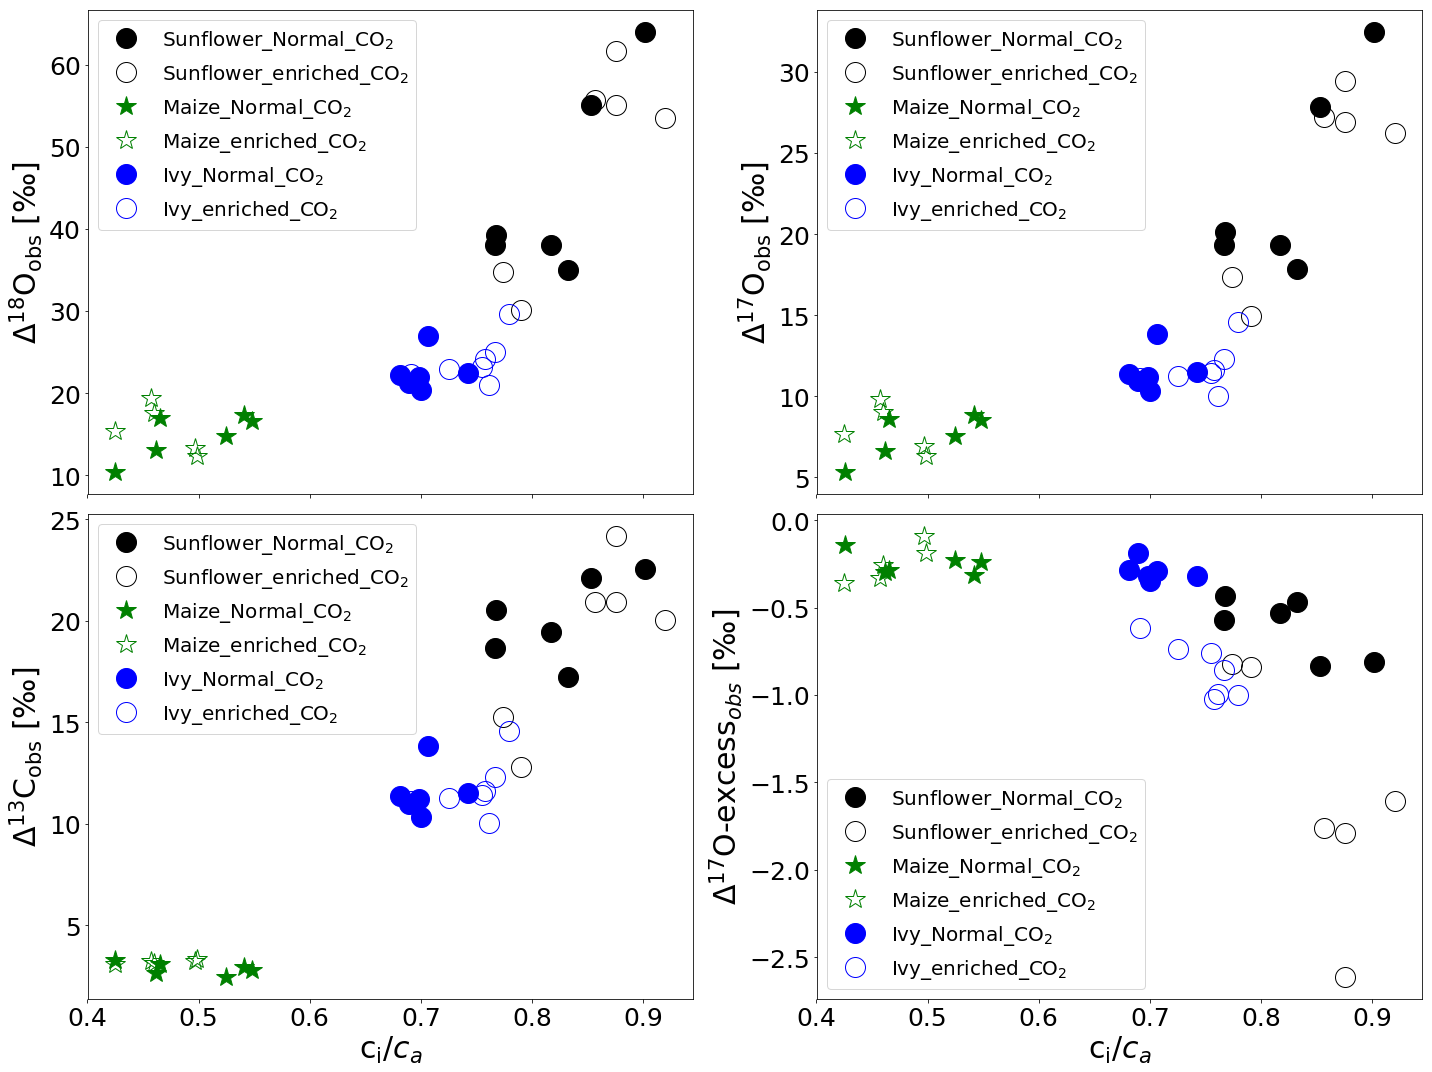

In [19]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,sharex=True, figsize=(20,15))
########highlight Maiz###

ax1.errorbar(Sunflower_Normal["Ci/Ca"],Sunflower_Normal["D18O_obs"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax1.errorbar(Sunflower_enriched["Ci/Ca"],Sunflower_enriched["D18O_obs"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax1.errorbar(Maize_Normal["Ci/Ca"],Maize_Normal["D18O_obs"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax1.errorbar(Maize_enriched["Ci/Ca"],Maize_enriched["D18O_obs"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax1.errorbar(Ivy_Normal["Ci/Ca"],Ivy_Normal["D18O_obs"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax1.errorbar(Ivy_enriched["Ci/Ca"],Ivy_enriched["D18O_obs"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")

ax1.legend(fontsize=20)
ax1.tick_params(labelsize=25)
ax1.set_ylabel("$\Delta^{18}\mathregular{O_{obs}}$ "+u"[\u2030]",fontsize=30)

#ax6=ax1.twinx()
#ax6.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["A"],ls="none")
#ax4.set_ylim(-0.01,-500)
#####maize####

ax2.errorbar(Sunflower_Normal["Ci/Ca"],Sunflower_Normal["D17O_obs"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax2.errorbar(Sunflower_enriched["Ci/Ca"],Sunflower_enriched["D17O_obs"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax2.errorbar(Maize_Normal["Ci/Ca"],Maize_Normal["D17O_obs"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax2.errorbar(Maize_enriched["Ci/Ca"],Maize_enriched["D17O_obs"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax2.errorbar(Ivy_Normal["Ci/Ca"],Ivy_Normal["D17O_obs"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax2.errorbar(Ivy_enriched["Ci/Ca"],Ivy_enriched["D17O_obs"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")

#######################
######################
ax2.legend(fontsize=20)
ax2.tick_params(labelsize=25)
ax2.set_ylabel("$\Delta^{17}\mathregular{O_{obs}}$ "+u"[\u2030]",fontsize=30)
################################################
#################################################


#######Low light Maize
ax3.errorbar(Sunflower_Normal["Ci/Ca"],Sunflower_Normal["D13C_obs"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax3.errorbar(Sunflower_enriched["Ci/Ca"],Sunflower_enriched["D13C_obs"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax3.errorbar(Maize_Normal["Ci/Ca"],Maize_Normal["D13C_obs"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax3.errorbar(Maize_enriched["Ci/Ca"],Maize_enriched["D13C_obs"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax3.errorbar(Ivy_Normal["Ci/Ca"],Ivy_Normal["D17O_obs"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax3.errorbar(Ivy_enriched["Ci/Ca"],Ivy_enriched["D17O_obs"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")



ax3.legend(fontsize=20)
#ax3.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["D13C_obs"],marker="o",markersize=20,color="g",ls="none")
ax3.set_xlabel("$\mathregular{c_i}/{c_a}$",fontsize=30)
ax3.set_ylabel("$\Delta^{13}\mathregular{C_{obs}}$ "+u"[\u2030]",fontsize=30)
ax3.tick_params(labelsize=25)
ax3.tick_params(labelsize=25)

#####################
######################

ax4.errorbar(Sunflower_Normal["Ci/Ca"],Sunflower_Normal["D17O_excess_obs"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Sunflower_enriched["Ci/Ca"],Sunflower_enriched["D17O_excess_obs"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax4.errorbar(Maize_Normal["Ci/Ca"],Maize_Normal["D17O_excess_obs"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Maize_enriched["Ci/Ca"],Maize_enriched["D17O_excess_obs"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax4.errorbar(Ivy_Normal["Ci/Ca"],Ivy_Normal["D17O_excess_obs"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Ivy_enriched["Ci/Ca"],Ivy_enriched["D17O_excess_obs"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")


######################

ax4.tick_params(labelsize=25)
ax4.tick_params(labelsize=25)
ax4.legend(fontsize=20)
#ax5=ax4.twinx()
#ax5.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["A"],ls="none")
#ax4.set_ylim(-0.01,-500)
ax4.set_xlabel("$\mathregular{c_i}/{c_a}$",fontsize=30)
ax4.set_ylabel("$\Delta^{17}\mathregular{O}$"+"-"+"excess"+"$_{obs}$ "+u"[\u2030]",fontsize=30)

fig.tight_layout()
plt.savefig("/Users/getachew/surfdrive/Photosynthesis/Second_phase_Experiment/Photosynthesis paper/CO2_type_Plant.eps")
plt.show()





# Difference vs Ci/Ca

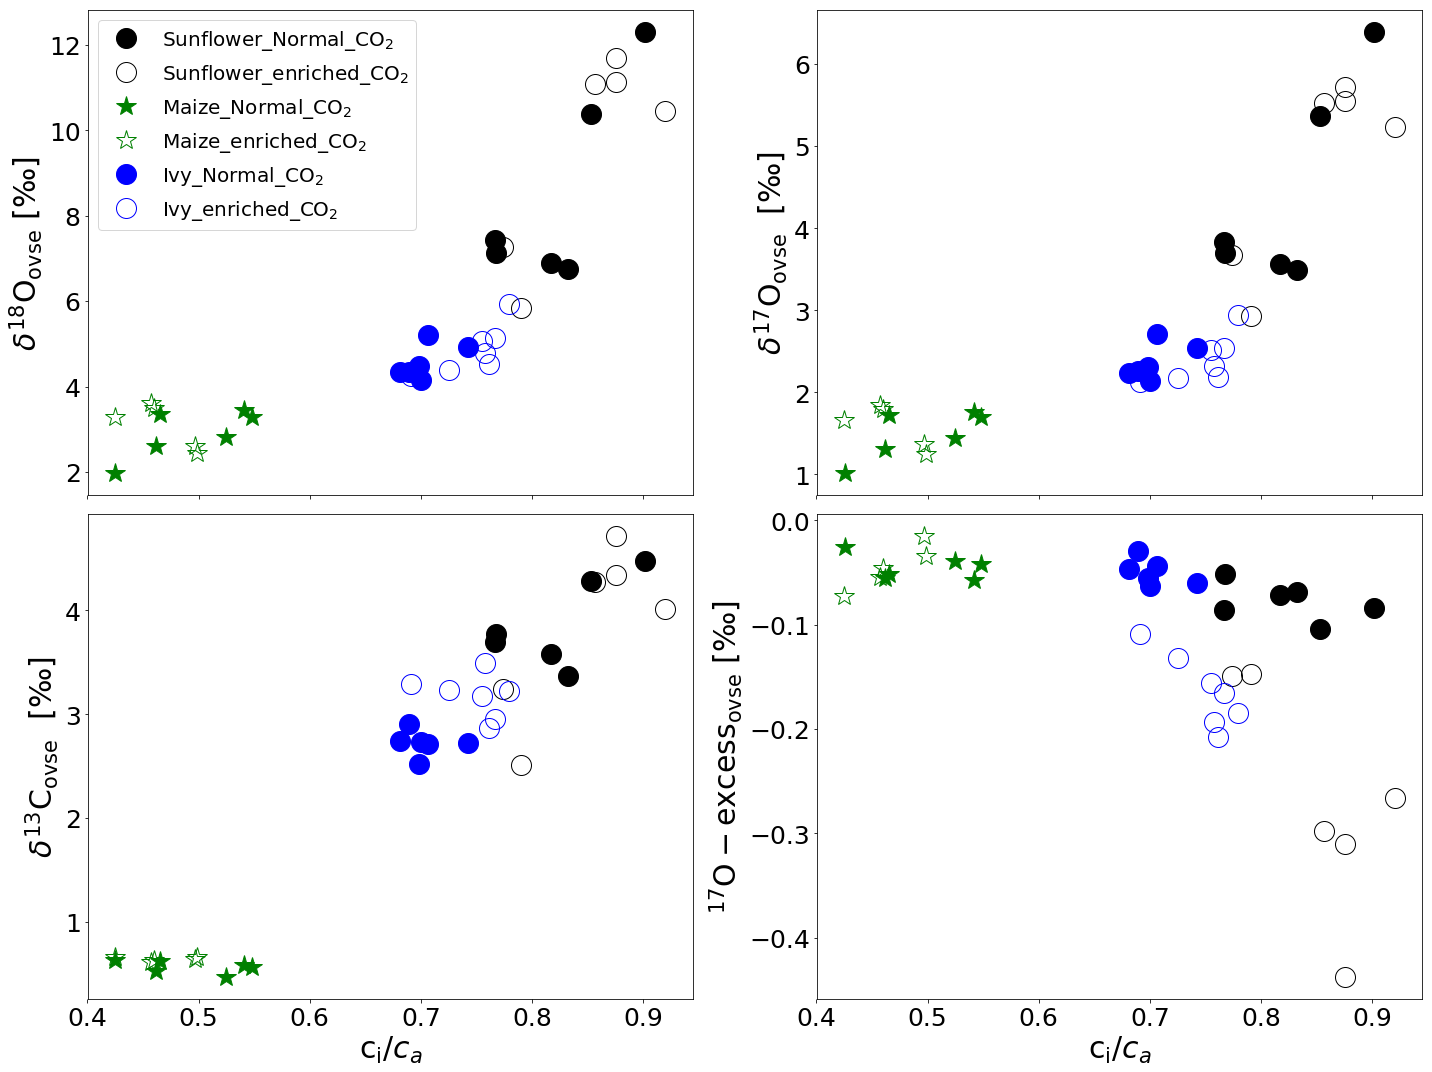

In [20]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,sharex=True, figsize=(20,15))
########highlight###
ax1.errorbar(Sunflower_Normal["Ci/Ca"],Sunflower_Normal["Dd18O"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax1.errorbar(Sunflower_enriched["Ci/Ca"],Sunflower_enriched["Dd18O"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax1.errorbar(Maize_Normal["Ci/Ca"],Maize_Normal["Dd18O"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax1.errorbar(Maize_enriched["Ci/Ca"],Maize_enriched["Dd18O"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax1.errorbar(Ivy_Normal["Ci/Ca"],Ivy_Normal["Dd18O"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax1.errorbar(Ivy_enriched["Ci/Ca"],Ivy_enriched["Dd18O"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")



#########################



#/Ca"],Sunflower_low["D18O_obs"],marker="o",markersize=20,color="y",label="Sunflower_Low light",ls="none")
ax1.legend(fontsize=20)
ax1.tick_params(labelsize=25)
ax1.set_ylabel("$\delta^{18}\mathregular{O_{ovse}}$ "+u"[\u2030]",fontsize=30)
#####maize####
##################################
ax2.errorbar(Sunflower_Normal["Ci/Ca"],Sunflower_Normal["Dd17O"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax2.errorbar(Sunflower_enriched["Ci/Ca"],Sunflower_enriched["Dd17O"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax2.errorbar(Maize_Normal["Ci/Ca"],Maize_Normal["Dd17O"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax2.errorbar(Maize_enriched["Ci/Ca"],Maize_enriched["Dd17O"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax2.errorbar(Ivy_Normal["Ci/Ca"],Ivy_Normal["Dd17O"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax2.errorbar(Ivy_enriched["Ci/Ca"],Ivy_enriched["Dd17O"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")






#######Low light Maize
#####################

#########Ivy d18O
#####################################

####################
#################################
#######Sunflower_d18O
#############################
#### Low light sunflower
######################


#######################


#ax2.legend(fontsize=20)
ax2.tick_params(labelsize=25)
ax2.set_ylabel("$\delta^{17}\mathregular{O_{ovse}}$ "+u" [\u2030]",fontsize=30)
################################################
#################################################

################################################
#################################################


ax3.errorbar(Sunflower_Normal["Ci/Ca"],Sunflower_Normal["Dd13C"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax3.errorbar(Sunflower_enriched["Ci/Ca"],Sunflower_enriched["Dd13C"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax3.errorbar(Maize_Normal["Ci/Ca"],Maize_Normal["Dd13C"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax3.errorbar(Maize_enriched["Ci/Ca"],Maize_enriched["Dd13C"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax3.errorbar(Ivy_Normal["Ci/Ca"],Ivy_Normal["Dd13C"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax3.errorbar(Ivy_enriched["Ci/Ca"],Ivy_enriched["Dd13C"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")




#######Low light Maize
####################

#########Ivy d18O
#####################################

####################
#################################
#######Sunflower_d18O
#############################


#ax3.legend(fontsize=20)

#ax3.legend(fontsize=20)
#ax3.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["D13C_obs"],marker="o",markersize=20,color="g",ls="none")
ax3.set_xlabel("$\mathregular{c_i}/{c_a}$",fontsize=30)
ax3.set_ylabel("$\delta^{13}\mathregular{C_{ovse}}$ "+u" [\u2030]",fontsize=30)
ax3.tick_params(labelsize=25)
ax3.tick_params(labelsize=25)

#####################
######################
################################################
#################################################

#####################
######################
##################################
ax4.errorbar(Sunflower_Normal["Ci/Ca"],Sunflower_Normal["DD17O"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Sunflower_enriched["Ci/Ca"],Sunflower_enriched["DD17O"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax4.errorbar(Maize_Normal["Ci/Ca"],Maize_Normal["DD17O"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Maize_enriched["Ci/Ca"],Maize_enriched["DD17O"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax4.errorbar(Ivy_Normal["Ci/Ca"],Ivy_Normal["DD17O"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Ivy_enriched["Ci/Ca"],Ivy_enriched["DD17O"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")





#######Low light Maize

#########################



######################


ax4.tick_params(labelsize=25)
ax4.tick_params(labelsize=25)
#ax4.legend(fontsize=20)
#ax4.set_ylim(-0.01,-500)
ax4.set_xlabel("$\mathregular{c_i}/{c_a}$",fontsize=30)
ax4.set_ylabel("$^{17}\mathregular{O-excess_{ovse}}$"+ u" [\u2030]",fontsize=30)
fig.tight_layout()
plt.savefig("/Users/getachew/surfdrive/Photosynthesis/Second_phase_Experiment/Photosynthesis paper/Difference_Only_plant_CO2.eps")
plt.show()






# Classifying for light intensity 

In [21]:
Observed_discrimination_high=Observed_discrimination[(Observed_discrimination['PFD'] >= 500)]
Observed_discrimination_low=Observed_discrimination[(Observed_discrimination['PFD'] <500)]


In [22]:
Maize=Observed_discrimination.loc[~Observed_discrimination['Plant'].isin(['S'])&~Observed_discrimination['Plant'].isin(['I'])] 
Maize_high=Maize[(Maize['PFD'] >= 500)]
Maize_low=Maize[(Maize['PFD'] < 500)]

In [23]:
Sunflower=Observed_discrimination.loc[~Observed_discrimination['Plant'].isin(['M'])&~Observed_discrimination['Plant'].isin(['I'])] 
Sunflower_high=Sunflower[(Sunflower['PFD'] >= 500)]
Sunflower_low=Sunflower[(Sunflower['PFD'] < 500)]

In [24]:
Ivy=Observed_discrimination.loc[~Observed_discrimination['Plant'].isin(['S'])&~Observed_discrimination['Plant'].isin(['M'])] 
Ivy_high=Ivy[(Ivy['PFD'] >= 500)]
Ivy_low=Ivy[(Ivy['PFD'] < 500)]

In [25]:
Sunflower

d17O_out  d18O_out  Bigdelta_17O_out   D13C_obs   D17O_obs   D18O_obs  \
0     19.652    38.138            -0.300  18.652409  19.322432  38.032221   
1     19.380    37.586            -0.293  19.438654  19.349990  38.004921   
2     22.900    43.870            -0.028  24.168238  29.425417  61.699697   
3     19.525    37.826            -0.266  20.528127  20.137206  39.330490   
4     19.306    37.434            -0.299  17.231217  17.872162  35.038870   
5     21.216    41.190            -0.318  22.107659  27.862222  55.086722   
6     22.256    43.158            -0.297  22.558124  32.477472  64.035186   
7     19.927    37.990             0.044  20.054452  26.265556  53.532120   
8     20.229    38.634             0.012  20.929293  27.249476  55.748636   
9     20.249    38.697             0.007  20.936657  26.918413  55.164719   
10    18.349    34.722             0.161  15.286669  17.351330  34.722759   
11    17.584    33.246             0.163  12.827448  14.949597  30.143568   

       Ci/Ca   PFD Plant  D17O_diff_err  d17O_diff_err  d18O_diff_err Enrich  \
0   0.766806   299     S       0.027019       0.023000       0.041761      N   
1   0.817118  1193     S       0.017117       0.023345       0.025942      N   
2   0.875313   297     S       0.008485       0.024759       0.045453     E1   
3   0.767182  1193     S       0.026249       0.026831       0.017692      N   
4   0.832074  1203     S       0.030232       0.048712       0.045607      N   
5   0.852880   300     S       0.027803       0.046086       0.098732      N   
6   0.901504   298     S       0.024042       0.159649       0.339212      N   
7   0.920086   298     S       0.016553       0.031401       0.034713      E   
8   0.856561   295     S       0.015133       0.102108       0.195735      E   
9   0.875733   297     S       0.023431       0.068710       0.091761      E   
10  0.774232  1188     S       0.015033       0.079057       0.146328      E   
11  0.790539  1194     S       0.015524       0.065924       0.112058      E   

       Dd17O      Dd18O     DD17O     Dd13C         A   gs(CO2)    ACi_Ca  \
0   3.828649   7.426600 -0.085417  3.697836  0.000015  0.171447  0.000012   
1   3.560870   6.890930 -0.071387  3.576933  0.000029  0.432134  0.000024   
2   5.721275  11.700945 -0.437263  4.718517  0.000017  0.365481  0.000015   
3   3.703403   7.123830 -0.051485  3.774117  0.000030  0.337608  0.000023   
4   3.487802   6.746358 -0.068381  3.364425  0.000027  0.432949  0.000022   
5   5.368161  10.391254 -0.104468  4.278780  0.000018  0.323731  0.000015   
6   6.392022  12.301040 -0.083647  4.474281  0.000018  0.510665  0.000016   
7   5.234493  10.446246 -0.266168  4.016137  0.000018  0.619448  0.000016   
8   5.532142  11.073157 -0.297597  4.269967  0.000016  0.305532  0.000014   
9   5.551854  11.134485 -0.310020  4.338190  0.000018  0.382005  0.000015   
10  3.679224   7.264964 -0.149562  3.246620  0.000032  0.379603  0.000025   
11  2.925245   5.828131 -0.147346  2.514224  0.000027  0.347426  0.000022   

    D17O_excess_obs  D17O_in  D17O_o  
0         -0.570440   -0.215  -0.300  
1         -0.529518   -0.215  -0.293  
2         -2.611148    0.409  -0.028  
3         -0.431388   -0.215  -0.266  
4         -0.469449   -0.215  -0.299  
5         -0.831793   -0.215  -0.318  
6         -0.810920   -0.215  -0.297  
7         -1.607838    0.310   0.044  
8         -1.759246    0.310   0.012  
9         -1.789471    0.310   0.007  
10        -0.819987    0.310   0.161  
11        -0.841686    0.310   0.163

# Calssifying based on CO2 type 

In [26]:
######sunflower
SHN=Sunflower_high.loc[~Sunflower_high["Enrich"].isin(["E"])&~Sunflower_high["Enrich"].isin(["E1"])&~Sunflower_high["Enrich"].isin(["E2"])&~Sunflower_high["Enrich"].isin(["E3"])]
SHE_E1=Sunflower_high.loc[~Sunflower_high["Enrich"].isin(["N"])&~Sunflower_high["Enrich"].isin(["E"])&~Sunflower_high["Enrich"].isin(["E2"])&~Sunflower_high["Enrich"].isin(["E3"])]
SHE_E=Sunflower_high.loc[~Sunflower_high["Enrich"].isin(["N"])&~Sunflower_high["Enrich"].isin(["E1"])&~Sunflower_high["Enrich"].isin(["E2"])&~Sunflower_high["Enrich"].isin(["E3"])]
SHE_E2=Sunflower_high.loc[~Sunflower_high["Enrich"].isin(["N"])&~Sunflower_high["Enrich"].isin(["E1"])&~Sunflower_high["Enrich"].isin(["E"])&~Sunflower_high["Enrich"].isin(["E3"])]
SHE_E3=Sunflower_high.loc[~Sunflower_high["Enrich"].isin(["N"])&~Sunflower_high["Enrich"].isin(["E1"])&~Sunflower_high["Enrich"].isin(["E2"])&~Sunflower_high["Enrich"].isin(["E"])]
#######################
##########################

SLN=Sunflower_low.loc[~Sunflower_low["Enrich"].isin(["E"])&~Sunflower_low["Enrich"].isin(["E1"])]
SLE_E1=Sunflower_low.loc[~Sunflower_low["Enrich"].isin(["N"])&~Sunflower_low["Enrich"].isin(["E"])]
SLE_E=Sunflower_low.loc[~Sunflower_low["Enrich"].isin(["N"])&~Sunflower_low["Enrich"].isin(["E1"])]
########## Maize
MHN=Maize_high.loc[~Maize_high["Enrich"].isin(["E"])]
MHE=Maize_high.loc[~Maize_high["Enrich"].isin(["N"])]
MLN=Maize_low.loc[~Maize_low["Enrich"].isin(["E"])]
MLE=Maize_low.loc[~Maize_low["Enrich"].isin(["N"])]
######################################
###############################
######IVY
IHN=Ivy_high.loc[~Ivy_high["Enrich"].isin(["E2"])]
IHE=Ivy_high.loc[~Ivy_high["Enrich"].isin(["N"])]
ILN=Ivy_low.loc[~Ivy_low["Enrich"].isin(["E2"])]
ILE=Ivy_low.loc[~Ivy_low["Enrich"].isin(["N"])]

In [27]:
SLE_E

d17O_out  d18O_out  Bigdelta_17O_out   D13C_obs   D17O_obs   D18O_obs  \
7    19.927    37.990             0.044  20.054452  26.265556  53.532120   
8    20.229    38.634             0.012  20.929293  27.249476  55.748636   
9    20.249    38.697             0.007  20.936657  26.918413  55.164719   

      Ci/Ca  PFD Plant  D17O_diff_err  d17O_diff_err  d18O_diff_err Enrich  \
7  0.920086  298     S       0.016553       0.031401       0.034713      E   
8  0.856561  295     S       0.015133       0.102108       0.195735      E   
9  0.875733  297     S       0.023431       0.068710       0.091761      E   

      Dd17O      Dd18O     DD17O     Dd13C         A   gs(CO2)    ACi_Ca  \
7  5.234493  10.446246 -0.266168  4.016137  0.000018  0.619448  0.000016   
8  5.532142  11.073157 -0.297597  4.269967  0.000016  0.305532  0.000014   
9  5.551854  11.134485 -0.310020  4.338190  0.000018  0.382005  0.000015   

   D17O_excess_obs  D17O_in  D17O_o  
7        -1.607838     0.31   0.044  
8        -1.759246     0.31   0.012  
9        -1.789471     0.31   0.007

### In the above figure M stands for maiz and S stands for sunflower, H for highlight, L for low light, E enriched CO2 and N normal CO2 

# Out going and engoing $\Delta^{17}{O_{CO_2}}$

In [28]:
Enriched_e=Photo_summary.loc[~Photo_summary['Enrich'].isin(['N'])]
Enriched_ci_ca=Observed_discrimination.loc[~Observed_discrimination['Enrich'].isin(['N'])]
Norma_e=Photo_summary.loc[~Photo_summary["Enrich"].isin(["E"])&~Photo_summary["Enrich"].isin(["E1"])&~Photo_summary["Enrich"].isin(["E2"])&~Photo_summary["Enrich"].isin(["E3"])]
normal_ci_ca=Observed_discrimination.loc[~Observed_discrimination["Enrich"].isin(["E"])&~Observed_discrimination["Enrich"].isin(["E1"])&~Observed_discrimination["Enrich"].isin(["E2"])&~Observed_discrimination["Enrich"].isin(["E3"])]

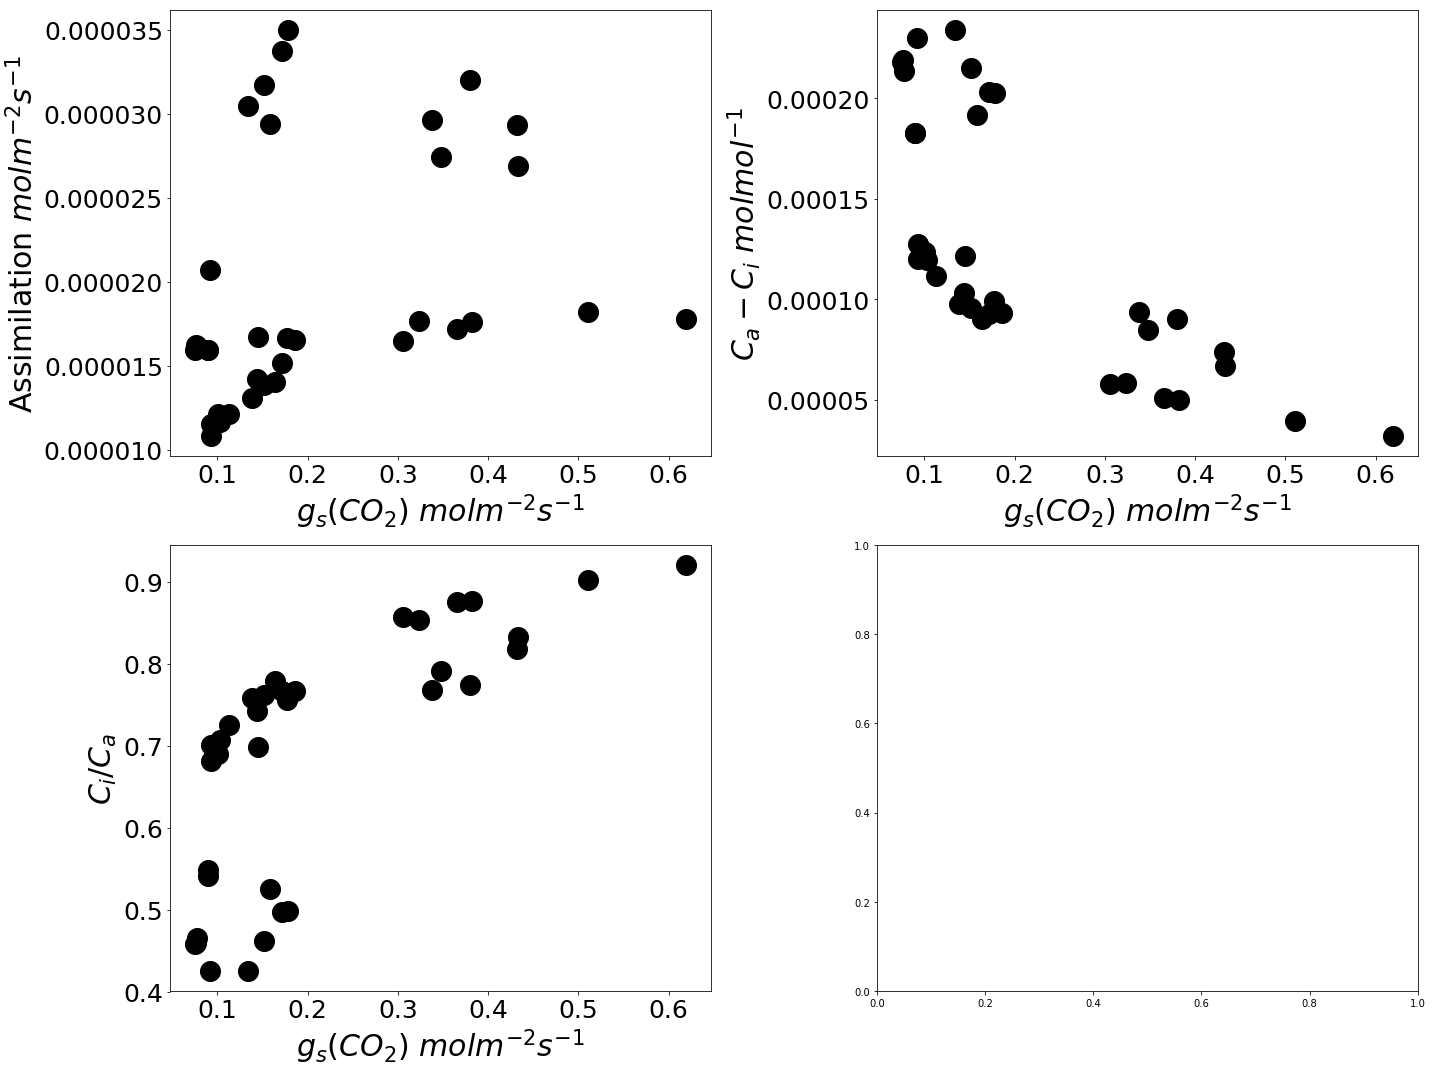

In [29]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,sharex=False, figsize=(20,15))
########highlight###

ax1.errorbar(Observed_discrimination["gs(CO2)"],Observed_discrimination["A"],marker="o",markersize=20,color="k",ls="none")
ax1.set_xlabel("$g_s(CO_2)$"+  " $mol m^{-2}s^{-1}$" ,fontsize=30)
ax1.set_ylabel("Assimilation"+  " $mol m^{-2}s^{-1}$" ,fontsize=30)
ax1.tick_params(labelsize=25)
ax2.errorbar(Observed_discrimination["gs(CO2)"],C_a_C_i,marker="o",markersize=20,color="k",ls="none")
ax2.set_xlabel("$g_s(CO_2)$"+  " $mol m^{-2}s^{-1}$" ,fontsize=30)
ax2.set_ylabel("$C_a-C_i$"+  " $mol mol^{-1}$" ,fontsize=30)
ax2.tick_params(labelsize=25)
ax3.errorbar(Observed_discrimination["gs(CO2)"],Observed_discrimination["Ci/Ca"],marker="o",markersize=20,color="k",ls="none")
ax3.set_xlabel("$g_s(CO_2)$"+  " $mol m^{-2}s^{-1}$" ,fontsize=30)
ax3.set_ylabel("$C_i/C_a$" ,fontsize=30)
ax3.tick_params(labelsize=25)
fig.tight_layout()
plt.savefig("/Users/getachew/surfdrive/Photosynthesis/Second_phase_Experiment/Photosynthesis paper/Assimilation.eps")
plt.show()





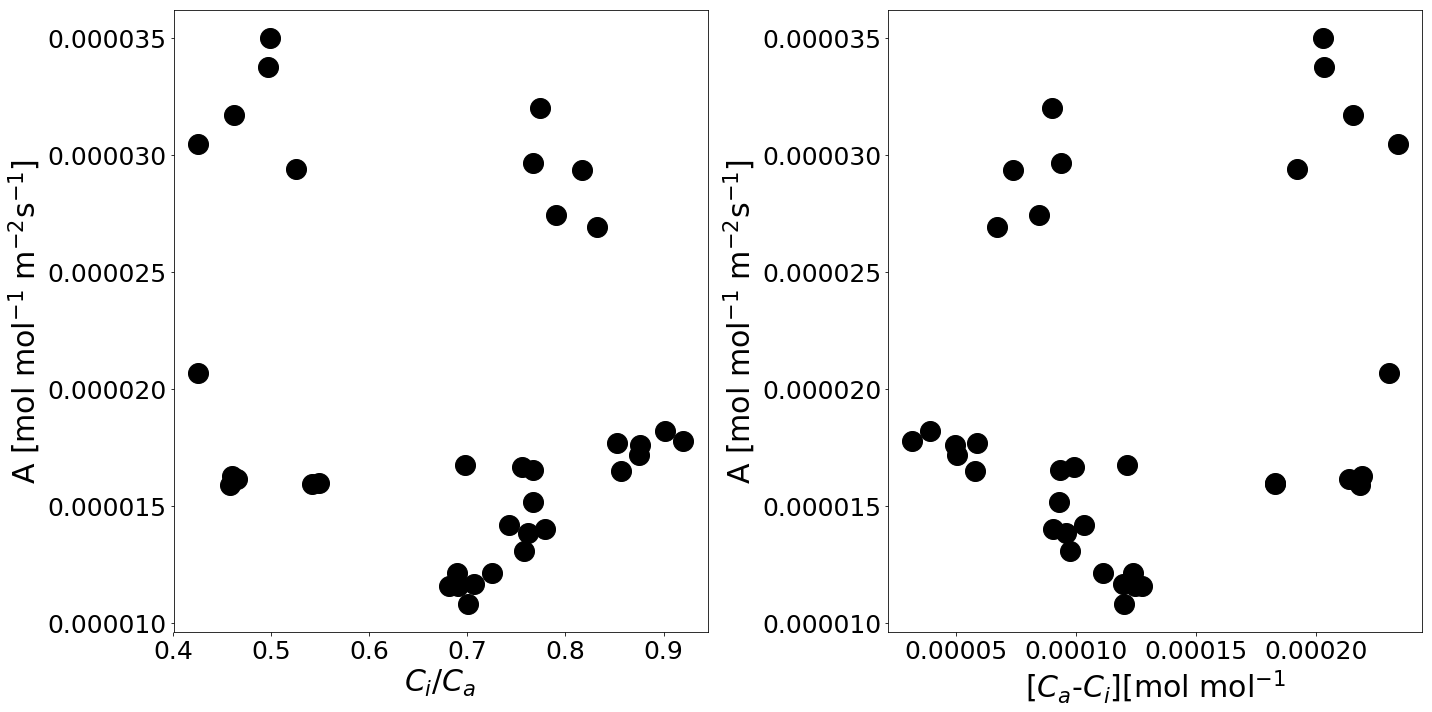

In [30]:
fig,(ax,ax1)=plt.subplots(1,2,figsize=(20,10))
ax.errorbar(Observed_discrimination["Ci/Ca"],Gas_exchange["A"],marker="o",markersize=20,color="k",ls="none")
ax.tick_params(labelsize=25)
ax.set_ylabel("A"+" [$\mathregular{mol}$"+" mol$^{-1}$"+ " m$^{-2}$"+"s$^{-1}$]",fontsize=30)
ax.set_xlabel("$C_i/C_a$",fontsize=30)
ax1.errorbar(C_a_C_i,Gas_exchange["A"],marker="o",markersize=20,color="k",ls="none")
ax1.tick_params(labelsize=25)
ax1.set_ylabel("A"+" [$\mathregular{mol}$"+" mol$^{-1}$"+ " m$^{-2}$"+"s$^{-1}$]",fontsize=30)
ax1.set_xlabel("[$C_a$"+"-"+"$C_i$]"+"[$\mathregular{mol}$"+" mol$^{-1}$",fontsize=30)
fig.tight_layout()
plt.show()



# How to caluclate the discrimination in $\Delta^{17}$O????

# Section three 

# Isotopic composition of water at the evaporating site 
## $\delta^{18}O_{trans}=\Big(\delta^{18}O_{o}(1-w_{e})-\delta^{18}O_{e}\frac{w_{e}}{w_{o}}(1-w_{o})\Big)\frac{w_{o}}{w_{o}-w_{e}}$, Barbour, 2016
where $\delta^{18}O_{trans}$ is isotopic composition of transpired water vapour,$\delta^{18}O_{o}$ is the isotopic composition of water vapour leaving the cuvette, $\delta^{18}O_{o}$ is the isotopic composition of water vapour enetring the cuvette , $w_e$ and $w_o$ is mole fraction of water vapour enetering and leaving the cuvette
## $\delta^{18}O_e=\delta^{18}_{trans}+\epsilon_{equ}+\epsilon_k+ \frac{w_o}{w_{i}}(\delta^{18}O_o-\epsilon_k+\delta^{18}_{trans})$
where $\epsilon_{equ}$ the equilibrum fractionation during evaporation from liquid to vapour and $\epsilon_k$ is kinetic fractionation during diffusion of vapour from the leaf to the atmosphere, $w_i$ is water vapour mole fraction in the inetercelular airspace 

$\delta^{18}O_e$ is water vapour isotopic composition at the evaporating site, $\epsilon_k$ is kenetic fractionation during diffusion of vapour from the leaf to the atmosphere which is dependent on stomatal and boundary layer conductance. According to Cappa et al 2003, $H_2^{18}O$ diffuces 1.032 times slower than $H_2^{16}O$  through stomata and according to Polhausen analysis, Farquhar et al, 1989, $H_2^{18}O$ diffuces 1.021 times slower than $H_2^{16}O$  through boundary layer. According to Merlivat, 1978 the values are 1.028 and 1.019 for stomatal and boundary layer diffusion, respectively. Recent papers tend to use the values of Merlivat after Luz et al(2003) got a similar value with Merlivat, 1978.Barkan and Luz, 2007 reported a kintetic fractionation during diffusion of vapour through stomata 1.0146$\pm$0.0002 and 1.0283$\pm$0.0003 for $H_2^{17}O$  and $H_2^{18}O$ respectively.This crossponds the ratio $ln(^{17}\alpha_{diff})/ln(^{18}\alpha_{diff})=0.5185\pm 0.0002$
## $\epsilon_{k_{H_2^{18}O}}=\frac{28g_s^{-1}+19g_b^{-1}}{g_s^{-1}+g_b^{-1}}=\frac{28g_b+19g_s}{g_s+g_b}$
## $\epsilon_{k_{H_2^{17}O}}=\frac{14.6g_s^{-1}+9.852g_b^{-1}}{g_s^{-1}+g_b^{-1}}=\frac{14.6g_b+9.852g_s}{g_s+g_b}$
##### $\epsilon_{eq}$ is equilibrum fractionation during evaporation from liquid to vapou and it is temeprature dependent (Bottinga and Craig, 1969)
## $\epsilon_{eq_{H_2^{18}O}}=2.644-3.206\Big(\frac{1000}{T}\Big)+1.534\Big(\frac{1000000}{T^2}\Big)$
## $\epsilon_{eq_{H_2^{17}O}}=(\epsilon_{eq_{H_2^{18}O}})^{0.529}$ , Barkan and luz, 2007

In [31]:
Ek=(28*gb_H2O+19*Gas_exchange["gs(H2O)"])/(Gas_exchange["gs(H2O)"]+gb_H2O)
Eeq=2.644-3.206*(1000/(Photo_summary["Temp"]+273.5))+1.534*(1000000/((Photo_summary["Temp"]+273.5)**2))
zetaaa=Photo_summary["w_o"]/(Photo_summary["w_o"]-Photo_summary["w_e"])

# ${H_2^{17}O}$

In [32]:
#Eeq_17=Eeq^0.529
Ek_17=(14.6*gb_H2O+9.852*Gas_exchange["gs(H2O)"])/(Gas_exchange["gs(H2O)"]+gb_H2O)
Eeq_17=(np.log((Eeq/1000+1)**(0.529)))*1000
humidity=(Photo_summary["w_o"])/W_i

#### kintic fractionation lambda for water vapour as it leaves stomata is calculated as follows and have 
#### a value of 0.5428 plus/minus 0.00003 (the value given by Barkan is 0.5185)

In [33]:
Kinetic_frctionation_lambda=np.log(Ek_17/1000+1)/(np.log(Ek/1000+1))
Kinetic_frctionation_lambda.mean(),Kinetic_frctionation_lambda.std()

(0.5248329481552231, 2.606612783830372e-05)

# Transpiration process 

#### Landais et al, 2006 
#### $\lambda_{trans}=0.522-0.008h$
### where h is relative humidity 

#### $\delta^{17}O=1000[e^{\lambda_{trans}*ln(\frac{\delta^{18}O}{1000}+1)}-1]$

In [34]:
Water_evaporation_site=pd.DataFrame()
## isotopic composition of transpired water vapor
#Water_evaporation_site["d18O_trans"]=zetaaa*(Photo_summary["d18O_ow"]-Photo_summary["d18O_iw"])+Photo_summary["d18O_iw"]
Water_evaporation_site["d18O_trans"]=(Photo_summary["d18O_ow"]*(1-Photo_summary["w_e"])-Photo_summary["d18O_iw"]*(Photo_summary["w_e"]/Photo_summary["w_o"])*(1-Photo_summary["w_o"]))*zetaaa
# water isotopic composition at the evaporating site d18O_e
Water_evaporation_site["d18O_e"]=Water_evaporation_site["d18O_trans"]+Eeq+Ek+humidity*(Photo_summary["d18O_ow"]-Ek-Water_evaporation_site["d18O_trans"])

In [35]:
lambda_diffu=0.5185 # barkan and Luz
d17O_H2O_trans=round(1000*(np.exp(lambda_diffu*np.log((Water_evaporation_site["d18O_trans"]/1000)+1))-1),3)
d17O_H2O_iw=round(1000*(np.exp(lambda_diffu*np.log((Photo_summary["d18O_iw"]/1000)+1))-1),3) ## for this might not be true 

# 17O excess at of the transpired water vapor 

In [36]:
excess_17O_trans=1000*np.log(d17O_H2O_trans/1000+1)-0.528*1000*np.log(Water_evaporation_site["d18O_trans"]/1000+1)

In [37]:
excess_17O_trans.max(),excess_17O_trans.min()

(0.08462690307947707, -0.04289723242828547)

## Water at the evaporating site 

## Asuming the water vapour inside the leaf is saturated
#### $\delta^{17}O_{es}=1000[e^{\lambda_{trans}*ln(\frac{\delta^{18}O_{es}}{1000}+1)}-1]$
#### $\lambda_{trans}=0.522-0.008*humidity$

In [38]:
# lambda_trans=0.522-0.008*humidity 
# #d17O_H2O_es=round(1000*(np.exp(lambda_trans*np.log((Water_evaporation_site["d18O_e"]/1000)+1))-1),3)
# d17O_H2O_es=((Water_evaporation_site["d18O_e"]/1000+1)**lambda_trans-1)*1000

## $^{17}O$-excess of water at the evaporating site 

In [39]:
# excess17O_H2O_es=1000*np.log(d17O_H2O_es/1000+1)-0.528*1000*np.log(Water_evaporation_site["d18O_e"]/1000+1)

In [40]:
# # Create a Pandas Excel writer using XlsxWriter as the engine.
# writer = pd.ExcelWriter('Onlywater_fractionation.xlsx', engine='xlsxwriter')

# # # Convert the dataframe to an XlsxWriter Excel object.
# Water_evaporation_site["d18O_trans"].to_excel(writer, sheet_name='Sheet1')
# d17O_H2O_trans.to_excel(writer, sheet_name='Sheet2')
# Photo_summary["d18O_iw"].to_excel(writer, sheet_name='Sheet3')
# d17O_H2O_iw.to_excel(writer, sheet_name='Sheet4')
# Water_evaporation_site["d18O_e"].to_excel(writer, sheet_name='Sheet5')
# d17O_H2O_es.to_excel(writer, sheet_name='Sheet6')

# # # Close the Pandas Excel writer and output the Excel file.
# writer.save()

In [41]:
# excess17O_H2O_es.max(),excess17O_H2O_es.min()

# Isotopic composition of the vapour in equiliburum with liquid water 
### Based on Barkan and Luz: 2005
### $\alpha^{17}_{\frac{l}{v}}=1.00431$
### $\alpha^{18}_{\frac{l}{v}}=1.00816$
### $\lambda_{\frac{l}{v}}=0.529$



In [44]:
# assuming the leaf water vapour is in equiliburum with the the leaf water
alpha_17_lv=np.log(1.00431)*1000
alpha_18_lv=np.log(1.00816)*1000

In [45]:
# Vouper_equ_with_leaf_water=pd.DataFrame()
# Vouper_equ_with_leaf_water["d18O"]=Water_evaporation_site["d18O_e"]-alpha_18_lv
# Vouper_equ_with_leaf_water["d17O"]=d17O_H2O_es-alpha_17_lv
# Vouper_equ_with_leaf_water["D17O"]=1000*np.log(Vouper_equ_with_leaf_water["d17O"]/1000+1)-1000*0.528*np.log(Vouper_equ_with_leaf_water["d18O"]/1000+1)


In [46]:
Vouper_equ_with_leaf_water

d18O
0   0.984296
1   0.913639
2   1.737558
3   2.643077
4   2.083309
5   0.828220
6   3.307605
7   0.739912
8   1.937123
9   0.912031
10  3.737441
11  3.565834
12  1.929976
13  6.239256
14  4.281449
15  4.495366
16  3.301277
17  6.900786
18  1.668832
19  1.977311
20  2.773159
21  2.933443
22  2.575339
23 -3.988017
24 -3.320661
25 -4.453231
26 -0.430841
27  0.537925
28  0.934368
29 -1.416490
30 -2.784889
31 -2.142948
32 -0.191938
33  0.976123
34  4.687799
35  0.432544

In [47]:
Vouper_equ_with_leaf_water.mean(),Vouper_equ_with_leaf_water.std()

(d18O    1.425166
 dtype: float64, d18O    2.626359
 dtype: float64)

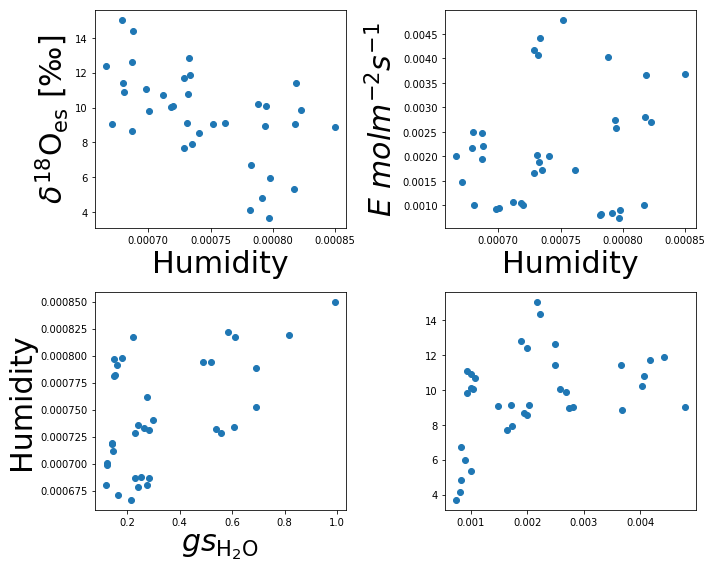

In [48]:
humidity=(Photo_summary["w_o"]/1000)/W_i
fig,((ax,ax1),(ax3,ax4))=plt.subplots(2,2,figsize=(10,8))
ax.plot(humidity,Water_evaporation_site["d18O_e"],marker="o",ls="none")
ax.set_ylabel("$\delta^{18}\mathregular{O_{es}}$ "+u"[\u2030]",fontsize=30)
ax.set_xlabel("Humidity",fontsize=30)
ax1.plot(humidity,Gas_exchange["E"],marker="o",ls="none")
ax1.set_ylabel("$E$"+  " $mol m^{-2}s^{-1}$",fontsize=30)
ax1.set_xlabel("Humidity",fontsize=30)
ax3.plot(Gas_exchange["gs(H2O)"],humidity,marker="o",ls="none")
ax3.set_ylabel("Humidity",fontsize=30)
ax3.set_xlabel("$gs_{\mathregular{H_{2}O}}$",fontsize=30)
ax4.plot(Gas_exchange["E"],Water_evaporation_site["d18O_e"],marker="o",ls="none")
fig.tight_layout()
plt.show()

### Relation ship between stomatal conductance for water and ci/ca

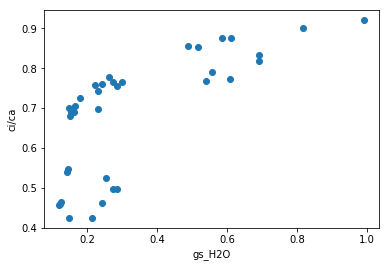

In [49]:
fig,ax=plt.subplots()
ax.plot(Gas_exchange["gs(H2O)"],Observed_discrimination["Ci/Ca"],marker="o",ls="none")
ax.set_ylabel("ci/ca")
ax.set_xlabel("gs_H2O")
plt.show()

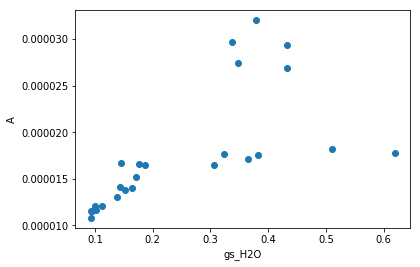

In [50]:
C3_plant=Observed_discrimination.loc[~Observed_discrimination['Plant'].isin(['M'])]

#######################################
fig,ax=plt.subplots()
ax.plot(C3_plant["gs(CO2)"],C3_plant["A"],marker="o",ls="none")
ax.set_ylabel("A")
ax.set_xlabel("gs_H2O")
plt.show()

# Farquhar etal (2007)
Transpiration effeciency is the leaf contribution to water use efficiency at the plant, crop or ecosytem lavel.1) vapour pressure of heavy water is less than the light 2) the binary diffusitivity of heavier isotopes is lower than the light once.\\\

As stomata resistance increases, its fractionation tends to dominate and $\epsilon_k$ increases. That is the leaf water should become more enriched as stomata close and as E is reduced. Seondly, stomata closure and reduced transpiration causes heating of the leaf, so that saturated vapour pressure in the intercellular air spaces increases resulting a decrease in the humidity (w_a/w_i). This should also cause an enrichment. \\\

When the source of varation in transpiration rate  is stomatal conductnce, transpiration rate  and $\delta^{18}$O enrichment have negative relationship . This also reasults less enrichment in leaf water compared to at the site of evaporation since mass flow from the xylem of unenriched wter will oppose the back diffusion of enriched water from the site of evaporation.\\

$$P=\frac{vl}{D}$$, where v is velocity, l is distance from the sites and D is diffusivitivity of heavy water in water. Velocity is proportional to transpiration rate. \\


Peclet number (P) is proportional to E , as E increases, average leaf enrichemnet becomes increasingly depleted compared to the isotopic composition at the evaporating site. This repersents one of the reasns as stomata conductance increases leaf water enrichmenet decreases. \\



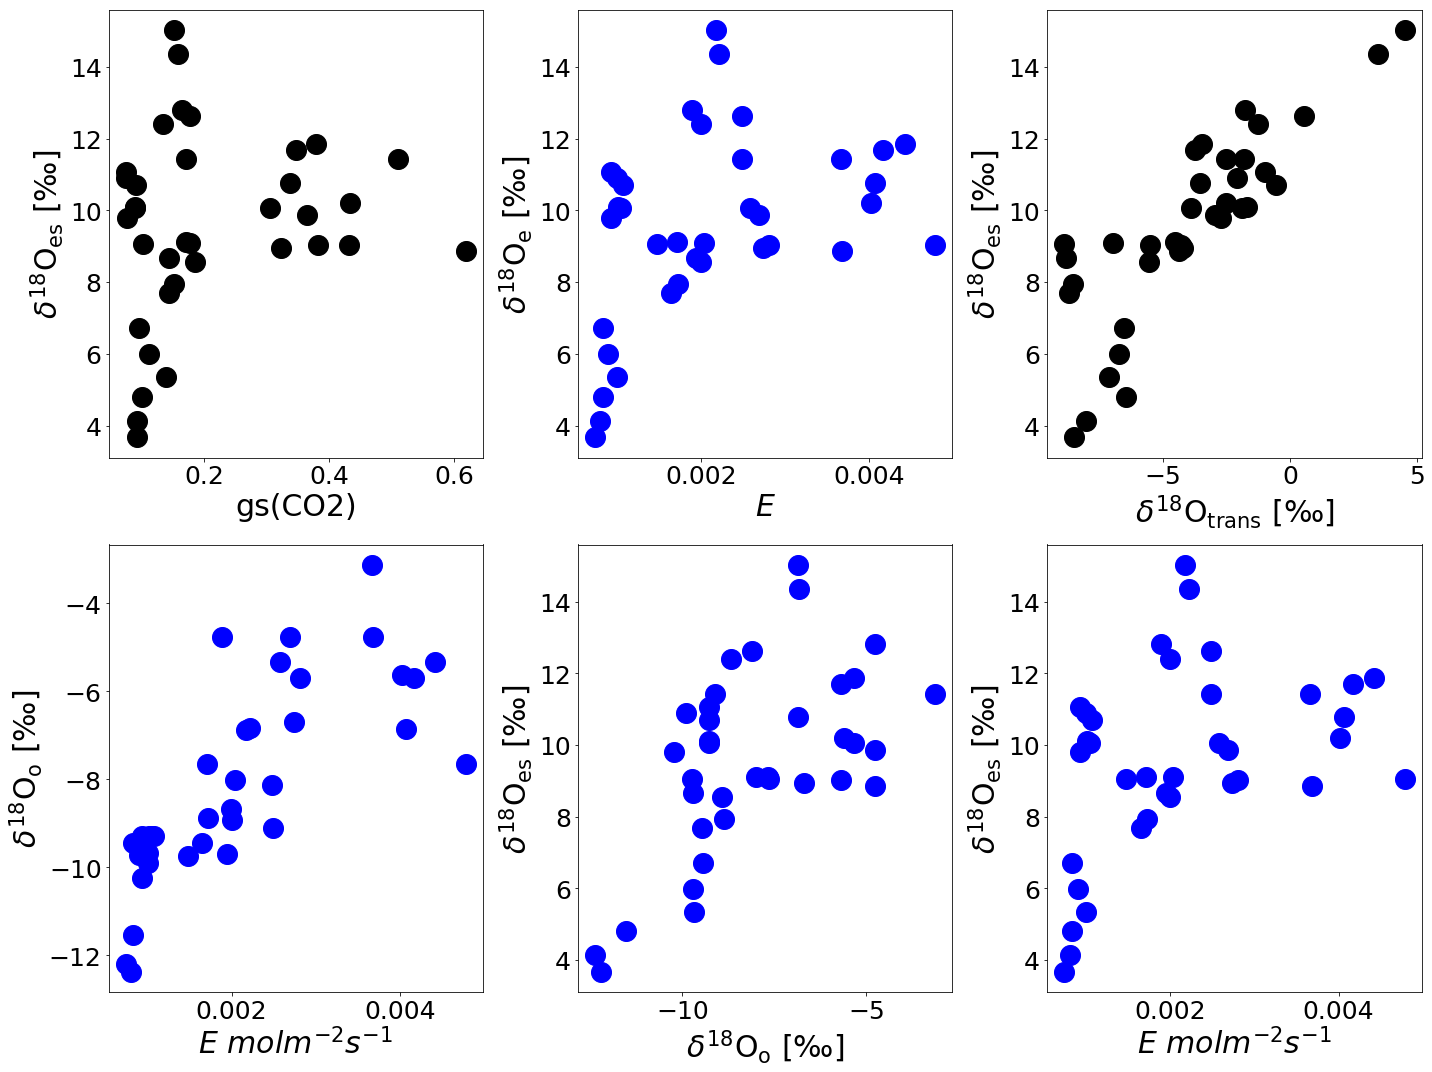

In [51]:
fig,((ax,ax1,ax2),(ax3,ax4,ax5))=plt.subplots(2,3,sharex=False, figsize=(20,15))
#fig,((ax,ax1,ax2),(ax3,ax4,ax5))=plt.subplots(3,3, figsize=(10,20))
ax.errorbar(Gas_exchange["gs(CO2)"],Water_evaporation_site["d18O_e"],marker="o",markersize=20,color="k",ls="none")
ax.tick_params(labelsize=25)
ax.set_ylabel("$\delta^{18}\mathregular{O_{es}}$ "+u"[\u2030]",fontsize=30)
ax.set_xlabel("gs(CO2)",fontsize=30)
ax1.errorbar(Gas_exchange["E"],Water_evaporation_site["d18O_e"],marker="o",markersize=20,color="b",ls="none")
ax1.tick_params(labelsize=25)
ax1.set_ylabel("$\delta^{18}\mathregular{O_{e}}$ "+u"[\u2030]",fontsize=30)
ax1.set_xlabel("$E$",fontsize=30)
ax2.errorbar(Water_evaporation_site["d18O_trans"],Water_evaporation_site["d18O_e"],marker="o",markersize=20,color="k",ls="none")
ax2.tick_params(labelsize=25)
ax2.set_ylabel("$\delta^{18}\mathregular{O_{es}}$ "+u"[\u2030]",fontsize=30)
ax2.set_xlabel("$\delta^{18}\mathregular{O_{trans}}$ "+u"[\u2030]",fontsize=30)
ax3.errorbar(Gas_exchange["E"],Photo_summary["d18O_ow"],marker="o",markersize=20,color="b",ls="none")
ax3.tick_params(labelsize=25)
ax3.set_ylabel("$\delta^{18}\mathregular{O_{o}}$ "+u"[\u2030]",fontsize=30)
ax3.set_xlabel("$E$"+  " $mol m^{-2}s^{-1}$",fontsize=30)
ax4.errorbar(Photo_summary["d18O_ow"],Water_evaporation_site["d18O_e"],marker="o",markersize=20,color="b",ls="none")
ax4.tick_params(labelsize=25)
ax4.set_ylabel("$\delta^{18}\mathregular{O_{es}}$ "+u"[\u2030]",fontsize=30)
ax4.set_xlabel("$\delta^{18}\mathregular{O_{o}}$ "+u"[\u2030]",fontsize=30)
ax5.errorbar(Gas_exchange["E"],Water_evaporation_site["d18O_e"],marker="o",markersize=20,color="b",ls="none")
ax5.tick_params(labelsize=25)
ax5.set_xlabel("$E$"+  " $mol m^{-2}s^{-1}$" ,fontsize=30)
ax5.set_ylabel("$\delta^{18}\mathregular{O_{es}}$ "+u"[\u2030]",fontsize=30)
#ax5.set_xlabel(",fontsize=30)
fig.tight_layout()
plt.savefig("/Users/getachew/surfdrive/Photosynthesis/Second_phase_Experiment/Photosynthesis paper/Water_isotope_composition_es.eps")
plt.show()

# Isotopic composition of bulk leaf water and water at the evaporating site 
The difference in the isotopic composition of bulk leaf water and water at the evaporating site depends on the transpiration rate. According to Gillon and Yakir,2000, at steady state the isotopic composition of bulk leaf water and water the evaportating site has only small difference. The isotopic composition of water at the evaporating site will be significantly higher relative to the bulk leaf water when the transpiration rate is higher which prevents the back diffusion of the heavy iostopes away from the evaporating site to the bulk leaf water. 

# Section four 

# Mesophyly conductance calculation 

#### $g_m$ is the difference between the obsrved isotope discrimination ($\Delta^{13}\mathrm{C_{obs}}$) and the calculated isotope discrimination assuming infinite $g_m$ (i.e no resistnace). Farquhar and Cernusak, 2012
($\Delta^{13}\mathrm{C_i}$)

$$\Delta^{13}C_{i}=\frac{1}{1-t}\Big[a_b\frac{c_a-c_s}{c_a}+a_s\frac{c_s-c_i}{c_a}\Big]+\frac{1+t}{1-t}\Big[b\frac{c_i}{c_a}-\frac{\alpha_b}{\alpha_{e}}e\frac{R_d}{A+R_d}\frac{c_i-\Gamma^*}{c_a}-\frac{\alpha_b}{\alpha_f}f\frac{\Gamma^*}{c_a}\Big]$$


$$\Delta^{13}C_{obs}=\frac{1}{1+t}\Big[a_b\frac{C_a-C_s}{C_a}+a_s\frac{C_s-C_i}{C_a}\Big]+\frac{1+t}{1-t}\Big[a_m\frac{C_i-C_c}{C_a}+b\frac{C_c}{C_a}-\frac{\alpha_b}{\alpha_{e}}e\frac{R_d}{A+R_d}\frac{C_c-\Gamma^*}{C_a}-\frac{\alpha_b}{\alpha_f}f\frac{\Gamma^*}{C_a}\Big]$$
Take the difference of the two equations 
$$\Delta^{13}C_{obs}=\Delta^{13}C_{i}-\frac{1+t}{1-t}[-a_m\frac{c_i-c_c}{c_a}+b\frac{c_i-c_c}{c_a}-\frac{\alpha_b}{\alpha_e}e\frac{R_d}{A+R_d}\frac{c_i-c_c}{c_a}]$$
$$C_c=C_i-\frac{Ar_m}{P}$$
substitute $C_i-C_c$ with $\frac{Ar_m}{P}$
$$\Delta^{13}C_{obs}=\Delta^{13}C_{i}-\frac{1+t}{1-t}\frac{Ar_m}{pc_a}[-a_m+b-\frac{\alpha_b}{\alpha_e}e\frac{R_d}{A+R_d}]$$
Rearange the equation for $r_m$
$$r_m=\frac{1-t}{1+t}(\Delta^{13}C_i-\Delta^{13}C_{obs} )\frac{pc_a}{A(b-a_m-\frac{\alpha_b}{\alpha_{e}}e\frac{R_d}{A+R_d})}$$

$$t=\frac{\alpha_{ac}E}{2g_{ac}}$$
where $\alpha_{ac}$ is the fractionation for the isotopologues of $CO_2$ diffusing in air 
$$\alpha_{ac}=1+\overline a$$
where :
$$\overline a=\frac{\alpha_b(c_a-c_s)+\alpha_s(c_s-c_i)}{c_a-c_i}$$
$$\Delta^{13}C_{gm}=\frac{1}{r_m}$$
$$C_c=C_i-\frac{A}{\Delta^{13}C_{gm}}$$

# Oxygen isotope composition of $CO_2$
The isotopic composition of $CO_2$ being assimilated is calculated as:
$$\delta^{18}O_A=\frac{\delta^{18}O_o-\Delta^{18}O_{obs}}{1+\Delta^{18}O_{obs}}$$

Assuming $CO_2$ is in full equilibrum with water in cytosolic water, Cernusak et al, 2004, the isotopic composition of $CO_2$ inside the leaf is calculated as 
$$\delta^{18}O_{ce}=\delta^{18}O_e+ \epsilon_w$$
Where $\delta^{18}O_e$ is the isotopic composition of water at the evaporating site and $\epsilon_w$ is the isotopic equilibration between $CO_2$ and $H_2O$ which is calculated as:

$$\epsilon_w=\frac{17604}{T}-17.93$$ , Brenninkmeijer et al., 1983
where $T$ is temperature in K.
If The cytosolic $CO_2$ is not be fully equilbrated with cytosolic water, the isotopic composition of $CO_2$ in cytosol is given as : 
$$\delta^{18}O_{co}=\delta^{18}O_o-\overline \alpha_{18}\Big(1-\frac{C_c}{C_a}\Big)$$
Where $\alpha_{18}$ is the weighted fractionation of $\delta^{18}$O of $CO_2$ accross boundary layer,stomata,cell wall and plasma membrane and is given as:
$$\overline \alpha_{18}=\frac{(C_i-C_c)\alpha_{18w}+(C_s-C_i)\alpha_{18}+(C_a-C_s)\alpha_{18b}}{C_a-C_c}$$
Where $\alpha_{18w}$ is the summed discrimination against $\delta^{18}$O during liquid diffusion and dissolution (0.8$\permil$, $\alpha_{18}$ and $\alpha_{18b}$ are discrimination of $\delta^{18}$O during diffusion through the stomata and the boundary layer (8.8$\permil$ and 5.4$\permil$), respectively. 

The Oxygen isotopic comnposition of $CO_2$ in the cytosol($\delta^{18}O_c$)is:
$$\delta^{18}O_c=\theta\delta^{18}O_{ce}+(1-\theta)\delta^{18}O_{co}) $$ , Cernusak et al, 2004
The oxygen isotopic composition of $CO_2$ in the intercellular air spaces, ignoring ternary correction:

$$\delta^{18}O_{io}=\delta^{18}O_{A}(1-\frac{C_a}{C_i})(1+\alpha_{18a})\frac{C_a}{C_i}(\delta^{18}O_{out}-\alpha_{18a})+\alpha_{18a}$$ , Farquhar and Cernusak, 2012
where $\alpha_{18a}$ is the summed $\delta^{18}O$ discrimination during diffusion through stomata and boundary layer. Including ternary corrcetion, it can be expressed as:

$$\delta^{18}O_{i}=\frac{\delta^{18}O_{io}+t[\delta^{18}O_{A}(\frac{C_a}{C_i}+1)-\delta^{18}O_{a}\frac{C_a}{C_i}]}{1+t}$$, Farquhar and Cernusak, 2012
The CO2 partial pressure at the site of CO2-H2O exchange ($c_{CH}$)may be calculated from the oxygen isotope composition of $CO_2$ in the intercellular airspaces ($\delta^{18}O_i$ and the oxygen isotopic composition of $CO_2$ at the site of $CO_2-H_2O$ exchange ($\delta^{18}O_c$) by:
$$c_{CH}=c_i(\frac{\delta^{18}O_i-\alpha_{18w}-\delta^{18}O_{A}(1+\alpha_{18w})}{\delta^{18}O_c-\alpha_{18w}-\delta^{18}O_{A}(1+\alpha_{18w})})$$ Barbour, 2016
$$g_m(\Delta^{18}O)=\frac{A}{c_i-c_{CH}}$$


# Parameters for $\Delta^{13}C$

###### All the diffusional frctionation calculations are calculated assuming the air is dry (taking mass of 28.96 g mol). 
###### So in this calculation I took the mole the outgoing water to calculate the mass of the air, the the corresponding fractionatio. 

In [52]:
#M_H2O=18.011 # g mol -1 
#mole_frac_H2O=Photo_summary["w_i"]/1000
#M_dry_air=29.282 # g mol -1
#M_air=(1-mole_frac_H2O)*M_dry_air+mole_frac_H2O*M_H2O
M_air=29.282 # g mol -1
MC12OO=43.99 # g mol-1 
MC13OO=44.99 # g mol-1
C13_stomata=(((MC13OO*M_air)/(MC13OO+M_air))/((MC12OO*M_air)/(MC12OO+M_air)))**0.5
C13_boundar=C13_stomata**(2/3)

In [53]:
C13_stomata,C13_boundar

(1.0044711767658903, 1.0029785676441232)

# Parameters for $\Delta^{13}C$

In [597]:
a_s=4.4# fractionation during diffusion through stomata 
a_b=2.9# fractionation during diffusion through boundary layer
b=29 ## carbon isotope fractionation during carboxylation in C3 plants, Farquhar et al, 1989
f=16/1000000## fractionation during photorespiration (decarboxylation), Lanigan et al 2008
## from barbour et al,2007
p=(Photo_summary["c_o"]-Photo_summary["c_e"])/Photo_summary["c_o"]# Bickford et al, 2009
d13C_res=(Photo_summary["d13C_out"]-Photo_summary["d13C_in"]*(1-p))/p ## Bickford et al., 2009 # isotopic composition of respired CO2
## Barbour et al. (2007)

eRd=0.8/1000000 ## dark respiration rate, average value (measured) ([0 to -5􏰀],Farquhar and Cernusak, 2012)
d13C_substrate=1000*((Photo_summary["d13C_out"]-Observed_discrimination["D13C_obs"])/(Observed_discrimination["D13C_obs"]+1000))
el=Photo_summary["d13C_out"]-Observed_discrimination["D13C_obs"]-d13C_substrate ## Bickford et al.,2009
####Winget et al,2007
## for R.communis
#e=eRd+el##fractionation during day respiration (decarboxylation)[0 to -5􏰀],Farquhar and Cernusak, 2012
el_2=Photo_summary["d13C_out"]-Observed_discrimination["D13C_obs"]-d13C_res
e=eRd+el # Winget et al,2007 
alpha_b= 1+b/1000#fractionation factor for C3 carboxylation (1+b)
alpha_e=1+e/1000##fractionation factor for day respiration (decarboxylation) with respect to net assimilation

alpha_f=1+f/1000##αf fractionation factor for photorespiration (decarboxylation) with respect to net assimilation
#the chloroplastic CO2 partial pressure at which rates of Rubisco carboxylation equal rates
#of CO2 loss from photorespiration
#tawu=(42.7+1.68*(Photo_summary["Temp"]-25)+0.0012*((Photo_summary["Temp"]-25)**2)) ##CO2 photo-compensation point (mol mol-1),
## temperature in degree centigrade (Brooks and Farquhar, 1985)
tawu=45/1000000 #tawu=45 Bernacchi et al, 2002 micro mol m-2s-1
c_s=Photo_summary["c_o"]-(Gas_exchange["A"]/Gas_exchange["gb(CO2)"])## mol mol-1
a_m=1.8/1000#d13C fractionation across rm including dissolution (entering to water) (0.7􏰀)and diffusion in liquid (1.1􏰀)((1.8􏰀),Lisa Winget et al, 2007),Farquhar et al, 1989
g_ac=Gas_exchange["gt(CO2)"]# Conductance for diffusion of CO2 in the air (stomata and boundary layer, total conductance)
## mol m-2 s-1
Rd=1.5/1000000 #day respiration rate (micomol m−2s−1)cerunusak et a, 2004
##a_bar is the weighted fractionation for diffusion across boundary layer and stomata
a_bar=(a_b*(Photo_summary["c_o"]-c_s)+a_s*(c_s-Gas_exchange["C_i"]))/(Photo_summary["c_o"]-Gas_exchange["C_i"]) # permil

alpha_ac=1+(a_bar)/1000
t=(alpha_ac*Gas_exchange["E"])/(2*g_ac)# ternary correction, unit less 


In [598]:
Mesophyl_coductance=pd.DataFrame()
Mesophyl_coductance["D13_i"]=(1/(1-t))*(a_b*((Photo_summary["c_o"])-c_s)/(Photo_summary["c_o"])+ a_s*(c_s-Gas_exchange["C_i"])/(Photo_summary["c_o"]))+((1+t)/(1-t))*(b*(Gas_exchange["C_i"]/(Photo_summary["c_o"]))-(alpha_b/alpha_e)*e*((Rd)/(Gas_exchange["A"]+(Rd))*(Gas_exchange["C_i"]-tawu)/(Photo_summary["c_o"]))-(alpha_b/alpha_f)*f*(tawu/(Photo_summary["c_o"])))
Mesophyl_coductance["rm"]=(((1-t)/(1+t))*(Mesophyl_coductance["D13_i"]-Observed_discrimination["D13C_obs"])*(Photo_summary["c_o"]*Photo_summary["P_bar"]))/(Gas_exchange["A"]*(b-a_m-((alpha_b/alpha_e)*e*Rd/(Gas_exchange["A"]+(Rd))))) ## in bar
# in m2 s mol-1 Pa 
Mesophyl_coductance["D13C_gm"]=1/Mesophyl_coductance["rm"]
Mesophyl_coductance["C_c"]=(Gas_exchange["C_i"]-(Gas_exchange["A"]/Mesophyl_coductance["D13C_gm"]))


In [599]:
Sunflower_cc=1000000*Mesophyl_coductance["C_c"][:17]
Maiz_cc=1000000*Mesophyl_coductance["C_c"][17:27]
ivy_cc=1000000*Mesophyl_coductance["C_c"][27:]

In [600]:
Mesophyl_coductance["D13C_gm"]

0     0.227581
1     0.395800
2     0.611378
3     0.704456
4     0.247799
5     0.364456
6     0.310345
7     0.178981
8     0.245662
9     0.241925
10    0.276067
11    0.174429
12    0.074834
13    0.139500
14    0.184120
15    0.185337
16    0.178362
17    0.172238
18    0.090591
19    0.077049
20    0.090936
21    0.091035
22    0.125125
23    0.112057
24    0.118637
25    0.091402
26    0.096478
27    0.126243
28    0.100587
29    0.191294
30    0.165875
31    0.153518
32    0.097548
33    0.134742
34    0.125215
35    0.128818
Name: D13C_gm, dtype: float64

# $\delta^{13}$C of the assmilated CO2


In [601]:
Mesophyl_coductance["d13C_ass"]=1000*((Photo_summary["d13C_out"]-Observed_discrimination["D13C_obs"])/(1000+Observed_discrimination["D13C_obs"]))

In [602]:
Mesophyl_coductance["Enrich"]=Photo_summary["Enrich"]

# Parameters for $\Delta^{18}O$

In [603]:
MC18OO=45.99 #g mol -1
C18OO_stomata=(((MC18OO*M_air)/(MC18OO+M_air))/((MC12OO*M_air)/(MC12OO+M_air)))**0.5
C18OO_boundar=C18OO_stomata**(2/3)

In [604]:
C18OO_stomata,C18OO_boundar

(1.0088045190559634, 1.0058610996193766)

In [605]:
a_18s=8.8 # fractionation of C18OO due to diffusion through stomata in per mill 
a_18b=5.8 # fractionation of C18OO due to diffusion through boundary layer in per mill
a_18w=0.8 #summed discrimination againist c18OO during liquid phase diffusion and dissolution in per mill 
#a18w_w is the waited fractionation of c18OO across boundary layer, stomata, cell wall and plasma membrane in series
a18w_w=((Gas_exchange["C_i"]-Mesophyl_coductance["C_c"])*a_18w+(c_s-Gas_exchange["C_i"])*a_18s+(Photo_summary["c_o"]-c_s)*a_18b)/(Photo_summary["c_o"]-Mesophyl_coductance["C_c"]) 
e_w=(17604/(Photo_summary["Temp"]+273.5))-17.93 # isotopic equilibrum between CO2 and water 



In [606]:
# fractionation of C18OO as it diffuses through the boundary layer and stomata in series 
a18_bar=(((Photo_summary["c_o"])-c_s)*a_18b+(c_s-Gas_exchange["C_i"])*a_18s)/((Photo_summary["c_o"])-Gas_exchange["C_i"]) # weighted fractionation as  C18OO  diffusion through stomata and the boundary layer in series
alpha_ac_18=1+a18_bar/1000

# $\delta^{18}O$ of assimilated CO2 

In [607]:
## d18O of assimilated CO2 
Mesophyl_coductance["d18O_ass"]=(1000*((Photo_summary["d18O_out"]-Observed_discrimination["D18O_obs"])
                                      /(1000+Observed_discrimination["D18O_obs"])))
#Mesophyl_coductance["d17O_ass"]=1000*((Photo_summary["d17O_out "]-Observed_discrimination["D17O_obs"])/(1000+Observed_discrimination["D17O_obs"]))

#dellta_17O_excess_ass=1000*np.log(Mesophyl_coductance["d17O_ass"]/1000+1)-0.528*1000*np.log(Mesophyl_coductance["d18O_ass"]/1000+1)

 # $\delta^{18}O$ of CO2 fully equilibrated with cytosolic water 

In [608]:
### d18O of CO2 fully equilibrated with cytosolic water 
Mesophyl_coductance["d18O_ce"]=Water_evaporation_site["d18O_e"]*(1+e_w/1000)+ e_w # CO2 in cyctol fully equilibrated with local cyctolic water

# Calculating mesophyll conductance and concentration at the mesophyll using discrimination in $\delta^{18}O$ assuming full equiliburation 

### $\Delta^{18}O_{obs}=\frac{a18{bs}+\frac{c_m}{c_o-c_m}\Delta^{18}O_{ca}}{1-\frac{c_m}{c_o-c_m}\frac{\Delta^{18}O_{ca}}{1000}}$
##### assuming the CO2 in the co2 in the mesophyll cell is fully equilibrum with the water at the evaporating site 
### $\Delta^{18}O_{obs}=\frac{a18{bs}+\frac{c_m}{c_o-c_m}\Delta^{18}O_{ea}}{1-\frac{c_m}{c_o-c_m}\frac{\Delta^{18}O_{ea}}{1000}}$
### $a18{bs}=\frac{(c_o-c_s)a_b+(c_s-c_i)a_s+(c_i-c_m)a_w}{c_o-c_m}$

##### Solve for $c_m$
### $c_m=\frac{(c_o-c_s)a_b+(c_s-c_i)+c_ia_w-c_o\Delta^{18}O_{obs}}{-\Delta^{18}O_{obs}-\frac{\Delta^{18}O_{obs}\Delta^{18}O_{ea}}{1000}-\Delta^{18}O_{ea}}$

In [609]:
D18ea=(Mesophyl_coductance["d18O_ce"]-Photo_summary["d18O_out"])/(1+0.001*Photo_summary["d18O_out"])
cia_18w=a_18w*Gas_exchange["C_i"]
fraxx=(Photo_summary["c_o"]-c_s)*a_18b+(c_s-Gas_exchange["C_i"])*a_18s+cia_18w-Photo_summary["c_o"]*Observed_discrimination["D18O_obs"]
C_M=fraxx/(-Observed_discrimination["D18O_obs"]-(1/1000)*Observed_discrimination["D18O_obs"]*D18ea+a_18w-D18ea)

# $\delta^{18}O$ of CO2 not  equilibrated with cytosolic water
### $\delta^{18}O_{nonequ}=\delta^{18}O_o-\overline{a}_{18}(1-\frac{c_c}{c_o})$
### $\delta^{18}O_{chlorplast}=\theta\delta^{18}O_{ce}+(1-\theta)\delta^{18}O_{nonequ}$ ## this is the value in the chloroplast or in the mesopyll
## $\theta=\frac{\delta^{18}O_{chlorplast}-\delta^{18}O_{nonequ}}{\delta^{18}O_{ce}-\delta^{18}O_{nonequ}}$

#### $\delta^{18}O_{c}=\delta^{18}O_A(1-\frac{c_i}{c_c})(1+a_{18w})+\frac{c_i}{c_c}(\delta^{18}O_{ias}-a_{18w})+a_{18w}$

In [610]:
Mesophyl_coductance["d18o_co"]=Photo_summary["d18O_out"]-a18w_w*(1-Mesophyl_coductance["C_c"]/Photo_summary["CO2_o"]/1000000)

In [611]:
Mesophyl_coductance["d18o_co"]

0     32.696642
1     32.831948
2     37.954483
3     31.539351
4     33.604125
5     36.035076
6     39.172067
7     35.261832
8     34.144109
9     34.667646
10    30.445901
11    29.660892
12    29.393631
13    28.774606
14    27.046305
15    24.837358
16    25.016382
17    28.059079
18    28.792420
19    29.490277
20    25.737287
21    25.658003
22    25.179416
23    29.735650
24    29.777901
25    29.949006
26    31.472544
27    30.479591
28    31.003193
29    26.460523
30    27.975853
31    27.311526
32    28.920933
33    29.137536
34    30.010746
35    29.404710
Name: d18o_co, dtype: float64

# $\delta^{18}O$  of CO2 in the intercellular air spaces ignoring ternarry correction

In [612]:
# The oxygen isotopic composition of CO2 in the intercellular air spaces ignoring ternarry correction
Mesophyl_coductance["d18o_io"]=(Mesophyl_coductance["d18O_ass"]*(1-(Photo_summary["CO2_o"]/(1000000*Gas_exchange["C_i"])))*(alpha_ac_18)+ 
                                ((Photo_summary["CO2_o"]/(1000000*Gas_exchange["C_i"])))*(Photo_summary["d18O_out"]-a18_bar)+a18_bar)
# The oxygen isotopic composition of CO2 in the intercellular air spaces including ternarry correction
# The oxygen isotopic composition of CO2 in the intercellular air spaces ignoring ternarry correction
#Mesophyl_coductance["d18o_io"]=Mesophyl_coductance["d18O_ass"]*(1-(Photo_summary["CO2_o"]/(1000000*Gas_exchange["C_i"])))*(alpha_ac_18)+ ((Photo_summary["CO2_o"]/(1000000)*Gas_exchange["C_i"]))*(Photo_summary["d18O_out"]-a18_bar)+a18_bar

In [613]:
t_18=alpha_ac_18*Gas_exchange["E"]/(2*g_ac)

# $\delta^{18}O$  of CO2 in the intercellular air spaces including ternarry correction

In [614]:
# The oxygen isotopic composition of CO2 in the intercellular air spaces ignoring ternarry correction
#Mesophyl_coductance["d18o_io"]=Mesophyl_coductance["d18O_ass"]*(1-(Photo_summary["CO2_o"]/(1000000*Gas_exchange["C_i"])))*(alpha_ac_18)+ ((Photo_summary["CO2_o"]/(1000000*Gas_exchange["C_i"])))*(Photo_summary["d18O_out"]-a18_bar)+a18_bar
# The oxygen isotopic composition of CO2 in the intercellular air spaces including ternarry correction
Mesophyl_coductance["d18o_i"]=((Mesophyl_coductance["d18o_io"]+t_18*(Mesophyl_coductance["d18O_ass"]*((Photo_summary["CO2_o"]
                            /(1000000*Gas_exchange["C_i"]))+1)
                            -Photo_summary["d18O_out"]*((Photo_summary["CO2_o"]/1000000)/Gas_exchange["C_i"])))
                            /(1+t_18))

In [615]:
d17OO=((Mesophyl_coductance["d18o_i"]/1000+1)**0.507-1)*1000

In [616]:
Mesophyl_coductance["d18o_i"]

0     46.548426
1     43.617107
2     50.768181
3     46.480032
4     42.360458
5     48.533526
6     48.569946
7     41.473851
8     45.830298
9     44.718130
10    41.778682
11    38.477566
12    40.171660
13    38.582406
14    34.415092
15    33.103128
16    34.287373
17    37.986645
18    43.095020
19    41.130502
20    43.138054
21    40.982148
22    39.266335
23    41.037339
24    40.388815
25    39.566058
26    40.054315
27    40.462794
28    42.927963
29    38.500249
30    37.930287
31    37.947586
32    36.519012
33    37.868259
34    39.905155
35    38.225028
Name: d18o_i, dtype: float64

# $\delta^{18}O$ of CO2 at cytosol(d18O_c) given by Cernusak et al., 2004, using degree of equliburum

is the sum of equiliburated and non-equiliburated CO2 

### $\delta^{18}O_{nonequ}=\delta^{18}O_o-\overline{a}_{18}(1-\frac{c_c}{c_o})$
### $\delta^{18}O_{chlorplast}=\theta\delta^{18}O_{ce}+(1-\theta)\delta^{18}O_{nonequ}$ ## this is the value in the chloroplast or in the mesopyll


In [617]:
#Mesophyl_coductance["Theta"]=(Mesophyl_coductance["d18o_co"]/Mesophyl_coductance["d18O_ce"])
### Assuming Theta =1

# the isotopic composition of CO2 at cytosol(d18O_c) given by Cernusak et al., 2004
#Mesophyl_coductance["d18O_c"]=Theta*Mesophyl_coductance["d18O_ce"]+(1-Theta)*Mesophyl_coductance["d18o_co"]
Mesophyl_coductance["d18O_c"]=Mesophyl_coductance["d18O_ce"] 

## calculating concentartion of CO2 in the mesophyll (for C4 plants) and chlorplast (C3 PLANTS) and mesophyll conductance USING

$\delta^{18}O$

#### assuming Theta=1

In [618]:
#Mesophyl_coductance["c_m"]=Gas_exchange["C_i"]*((Mesophyl_coductance["d18o_i"]-a_18w-Mesophyl_coductance["d18O_ass"]*(1+a_18w/1000))/(Mesophyl_coductance["d18O_c"]-a_17w-Mesophyl_coductance["d18O_ass"]*(1+a_18w/1000)))
Mesophyl_coductance["c_m"]=(Gas_exchange["C_i"]*((Mesophyl_coductance["d18o_i"]-a_18w-Mesophyl_coductance["d18O_ass"]*(1+a_18w/1000))
                                              /(Mesophyl_coductance["d18O_c"]-a_18w-Mesophyl_coductance["d18O_ass"]*(1+a_18w/1000))))

In [619]:
Mesophyl_coductance["gm_D18O"]=Gas_exchange["A"]/(Gas_exchange["C_i"]-Mesophyl_coductance["c_m"])


In [620]:
Mesophyl_coductance["gm_D18O"]

0     0.539930
1     0.623185
2     2.751044
3     0.830177
4     0.406697
5     1.307408
6     0.711019
7     0.328271
8     0.505635
9     0.513202
10    0.454505
11    0.281356
12    0.206383
13    0.290304
14    0.279059
15    0.295298
16    0.318936
17    0.328091
18    0.336745
19    0.231965
20    0.357260
21    0.280040
22    0.329649
23    0.271109
24    0.222263
25    0.193496
26    0.178563
27    0.217242
28    0.209048
29    0.152930
30    0.170968
31    0.153294
32    0.126637
33    0.166072
34    0.145148
35    0.180458
Name: gm_D18O, dtype: float64

In [621]:
a18w_w_cm=((Gas_exchange["C_i"]-C_M)*a_18w+(c_s-Gas_exchange["C_i"])*a_18s+(Photo_summary["c_o"]-c_s)*a_18b)/(Photo_summary["c_o"]-Mesophyl_coductance["c_m"]) 

In [622]:
Sunflower_cm=1000000*Mesophyl_coductance["c_m"][:17]
Maiz_cm=1000000*Mesophyl_coductance["c_m"][17:27]
ivy_cm=1000000*Mesophyl_coductance["c_m"][27:]



a18w_w_cm.mean()

5.927601091872557

In [623]:
Mesophyl_coductance["Outgoing_flux"]=Mesophyl_coductance["c_m"]/(Photo_summary["CO2_o"]/1000000-Mesophyl_coductance["c_m"])

In [624]:
ivy_cm.mean(),ivy_cm.std()

(213.4566976893155, 12.290512042519977)

# Parameters for $\Delta^{17}O$, note that this is for $\delta^{17}$O

In [625]:
MC17OO=44.99 #g mol -1
C17OO_stomata=(((MC17OO*M_air)/(MC17OO+M_air))/((MC12OO*M_air)/(MC12OO+M_air)))**0.5
C17OO_boundar=C17OO_stomata**(2/3)

In [626]:
C17OO_stomata,C17OO_boundar

(1.0044711767658903, 1.0029785676441232)

In [627]:
a_17s=4.47 # fractionation of C18OO due to diffusion through stomata in per mill 
a_17b=2.98 # fractionation of C18OO due to diffusion through boundary layer in per mill
a_17w=0.382 #summed discrimination againist c18OO during liquid phase diffusion and dissolution in per mill 
# weighted fractionation as  C17OO  diffusion through stomata and the boundary layer in series
a17_bar=(((Photo_summary["c_o"])-c_s)*a_17b+(c_s-Gas_exchange["C_i"])*a_17s/(Photo_summary["c_o"]-Gas_exchange["C_i"])) 
alpha_ac_17=1+a17_bar/1000
#a17w_w is the waited fractionation of c17OO across boundary layer, stomata, cell wall and plasma membrane in series
a17w_w=((Gas_exchange["C_i"]-Mesophyl_coductance["C_c"])*a_17w+((Photo_summary["c_o"])-Gas_exchange["C_i"])*a_17s+(Photo_summary["c_o"]-c_s)*a_17b)/(Photo_summary["c_o"]-Mesophyl_coductance["C_c"]) 

In [628]:
a17w_w

0     2.776876
1     2.450602
2     3.046263
3     3.238513
4     1.967207
5     2.646807
6     2.054740
7     1.400005
8     2.299334
9     2.066822
10    2.194814
11    1.831798
12    2.275667
13    2.342327
14    2.788311
15    2.513034
16    2.512755
17    2.598576
18    2.616792
19    2.307730
20    2.656984
21    2.640533
22    2.770709
23    2.651388
24    2.630664
25    2.448398
26    2.079728
27    2.346640
28    2.465491
29    3.143997
30    2.655575
31    2.784599
32    2.041072
33    2.213182
34    2.219943
35    2.117487
dtype: float64

# $\delta^{17}O$ of assimilated CO2

In [629]:
Mesophyl_coductance["d17O_ass"]=1000*((Photo_summary["d17O_out "]-Observed_discrimination["D17O_obs"])/(1000+Observed_discrimination["D17O_obs"]))

In [630]:
Mesophyl_coductance["d17O_ass"]

0      0.323321
1      0.029441
2     -6.338892
3     -0.600122
4      1.408662
5     -6.466063
6     -9.899947
7     -6.176331
8     -6.834246
9     -6.494589
10     0.980654
11     2.595600
12     8.881105
13     9.594724
14    11.425602
15     9.532000
16     9.020600
17    10.420095
18     8.811597
19     8.644329
20     6.584553
21     7.364427
22     8.526734
23     6.587380
24     7.012308
25     7.512625
26     6.764927
27     6.812126
28     4.611026
29     6.248305
30     5.927600
31     6.132571
32     7.371997
33     6.332974
34     3.642819
35     5.501796
Name: d17O_ass, dtype: float64

# $\delta^{17}O$ of of CO2 fully equilibrated with cytosolic water

In [631]:
### d17O of CO2 fully equilibrated with cytosolic water 
lamda_CO2_H2O=0.5229 # Barkan and Luz, 2012, Hofmann,2012
Mesophyl_coductance["d17O_ce"]=1000*(np.exp(lamda_CO2_H2O*(np.log(Mesophyl_coductance["d18O_ce"]/1000+1)))-1)

In [632]:
D17ea=(Mesophyl_coductance["d17O_ce"]-Photo_summary["d17O_out "])/(1+0.001*Photo_summary["d17O_out "])
cia_17w=a_17w*Gas_exchange["C_i"]
fraxx_17=(Photo_summary["c_o"]-c_s)*a_17b+(c_s-Gas_exchange["C_i"])*a_17s+cia_17w-Photo_summary["c_o"]*Observed_discrimination["D17O_obs"]
#C_M_17=fraxx_17/(-Observed_discrimination["D17O_obs"]-(1/1000)*Observed_discrimination["D18O_obs"]*D17ea+a_17w-D17ea)

# $\delta^{17}O$ of CO2 in the intercellular air spaces ignoring ternarry correction

In [633]:
# The oxygen isotopic composition of CO2 in the intercellular air spaces ignoring ternarry correction
Mesophyl_coductance["d17o_io"]=Mesophyl_coductance["d17O_ass"]*(1-(Photo_summary["c_o"]/Gas_exchange["C_i"]))*(alpha_ac_17)+ (Photo_summary["c_o"]/Gas_exchange["C_i"])*(Photo_summary["d17O_out "]-a17_bar)+a17_bar
#Mesophyl_coductance["d17o_io"]=((Mesophyl_coductance["d18o_i"]/1000+1)**0.507-1)*1000

In [634]:
t_17=alpha_ac_17*Gas_exchange["E"]/(2*g_ac)

In [635]:
#whwh=np.log(Mesophyl_coductance["d17o_io"]/1000+1)/(np.log(Mesophyl_coductance["d18o_i"]/1000+1))

# $\delta^{17}O$  of CO2 in the intercellular air spaces including ternarry correction

In [636]:
# The oxygen isotopic composition of CO2 in the intercellular air spaces including ternarry correction
Mesophyl_coductance["d17o_i"]=(Mesophyl_coductance["d17o_io"]+t_17*(Mesophyl_coductance["d17O_ass"]*((Photo_summary["CO2_o"]/1000000*Gas_exchange["C_i"])+1)-Photo_summary["d17O_out "]*((Photo_summary["CO2_o"]/1000000)/Gas_exchange["C_i"])))/(1+t_17/1000)
#Mesophyl_coductance["d17o_i"]=((Mesophyl_coductance["d18o_i"]/1000+1)**0.507-1)*1000

In [637]:
Mesophyl_coductance["Bigdelta_intercellular"]=1000*np.log(Mesophyl_coductance["d17o_i"]/1000+1)-0.528*1000*np.log(Mesophyl_coductance["d18o_i"]/1000+1)

In [638]:
Mesophyl_coductance["Bigdelta_intercellular"]

0    -0.253444
1    -0.196285
2    -0.167096
3    -0.135827
4    -0.212719
5    -0.231300
6    -0.183610
7     0.044847
8    -0.043837
9    -0.052208
10    0.148246
11    0.129539
12   -0.260748
13   -0.260746
14   -0.244612
15    0.276260
16    0.404074
17   -0.403673
18   -0.346081
19   -0.336404
20    0.174481
21    0.233243
22    0.020604
23   -0.243443
24   -0.187619
25   -0.296213
26   -0.239374
27   -0.233080
28   -0.164840
29    0.201895
30    0.039887
31    0.161514
32    0.051517
33    0.185130
34    0.148418
35    0.161398
Name: Bigdelta_intercellular, dtype: float64

# $\delta^{17}O$ of CO2 not  equilibrated with cytosolic water

In [639]:
Mesophyl_coductance["d17o_co"]=Photo_summary["d17O_out "]-a17w_w*(1-Mesophyl_coductance["C_c"]/Photo_summary["CO2_o"]/1000000)

# $\delta^{17}O$ of CO2 at cytosol(d17O_c) given by Cernusak et al., 2004, using degree of equliburum

is the sum of equiliburated and non-equiliburated CO2 

In [640]:
#Mesophyl_coductance["Theta"]=(Mesophyl_coductance["d18o_co"]/Mesophyl_coductance["d18O_ce"])
### Assuming Theta =1
#Theta=1
# the isotopic composition of CO2 at cytosol(d18O_c) given by Cernusak et al., 2004
Mesophyl_coductance["d17O_c"]=Mesophyl_coductance["d17O_ce"]
#Mesophyl_coductance["d18O_c"]=Mesophyl_coductance["d18O_ce"]

In [641]:
Mesophyl_coductance["Bigdelta_fully_equi"]=1000*np.log(Mesophyl_coductance["d17O_c"]/1000+1)-0.528*1000*np.log(Mesophyl_coductance["d18O_c"]/1000+1)

In [642]:
Mesophyl_coductance["Bigdelta_fully_equi"].min(),Mesophyl_coductance["Bigdelta_fully_equi"].max()

(-0.2831663920432028, -0.22787029015573879)

## calculating concentartion of CO2 in the mesophyll (for C4 plants) and chlorplast (C3 PLANTS) and mesophyll conductance USING

$\delta^{17}O$

#### assuming Theta=1

In [643]:
Mesophyl_coductance["c_m17"]=Gas_exchange["C_i"]*((Mesophyl_coductance["d17o_i"]-a_17w-Mesophyl_coductance["d17O_ass"]*(1+a_17w/1000))/(Mesophyl_coductance["d17O_c"]-a_17w-Mesophyl_coductance["d17O_ass"]*(1+a_17w/1000)))

In [644]:
Sunflower_cm17=1000000*Mesophyl_coductance["c_m17"][:17]
Maiz_cm17=1000000*Mesophyl_coductance["c_m17"][17:27]
ivy_cm17=1000000*Mesophyl_coductance["c_m17"][27:]
Sunflower_cm17.mean(),Sunflower_cm17.std()

(236.95179290729743, 97.59563505054192)

In [645]:
Mesophyl_coductance["gm_D17O"]=Gas_exchange["A"]/(Gas_exchange["C_i"]-Mesophyl_coductance["c_m17"])
Mesophyl_coductance["gm_D17O"]

0     0.535784
1     0.628254
2     3.038557
3     0.862510
4     0.407669
5     1.320570
6     0.731747
7     0.335106
8     0.519109
9     0.522850
10    0.470809
11    0.284792
12    0.205054
13    0.288977
14    0.278183
15    0.300396
16    0.332662
17    0.320647
18    0.327741
19    0.226771
20    0.379323
21    0.295059
22    0.330716
23    0.268010
24    0.224942
25    0.187320
26    0.177494
27    0.216396
28    0.212860
29    0.158384
30    0.168909
31    0.156684
32    0.123360
33    0.168082
34    0.145965
35    0.182345
Name: gm_D17O, dtype: float64

In [646]:
Sunflower_gmcm17=Mesophyl_coductance["gm_D17O"][:17]
Maiz_gmcm17=Mesophyl_coductance["gm_D17O"][17:27]
ivy_gmcm17=Mesophyl_coductance["gm_D17O"][27:]
Sunflower_gmcm17

0     0.535784
1     0.628254
2     3.038557
3     0.862510
4     0.407669
5     1.320570
6     0.731747
7     0.335106
8     0.519109
9     0.522850
10    0.470809
11    0.284792
12    0.205054
13    0.288977
14    0.278183
15    0.300396
16    0.332662
Name: gm_D17O, dtype: float64

In [647]:
a18w_w_17cm=((Gas_exchange["C_i"]-Mesophyl_coductance["c_m"])*a_17w+(c_s-Gas_exchange["C_i"])*a_17s+(Photo_summary["c_o"]-c_s)*a_17b)/(Photo_summary["c_o"]-Mesophyl_coductance["c_m"]) 

In [648]:
a18w_w_17cm.mean(),a18w_w_17cm.std()

(3.009203618662907, 0.48974174952222826)

# Discrimination in d13C modelled value 

In [649]:
Mesophyl_coductance["D13_OBC"]=(1/(1-t))*(a_b*(Photo_summary["c_o"]-c_s)/(Photo_summary["c_o"])+ a_s*(c_s-Gas_exchange["C_i"])/(Photo_summary["c_o"]))+((1+t)/(1-t))*(a_m*(Gas_exchange["C_i"]-Mesophyl_coductance["c_m"])/Photo_summary["c_o"]+b*(Mesophyl_coductance["c_m"]/Photo_summary["c_o"])-(alpha_b/alpha_e)*e*(Rd/(Gas_exchange["A"]*1000000+Rd)*(Mesophyl_coductance["c_m"]*1000000-tawu)/Photo_summary["c_o"])-(alpha_b/alpha_f)*f*(tawu/Photo_summary["c_o"]))


In [650]:
Mesophyl_coductance["D13_OBC"]

0     21.457752
1     21.358798
2     25.731590
3     20.965196
4     20.264242
5     24.647630
6     24.945427
7     23.278278
8     23.360065
9     23.663838
10    18.548709
11    17.067205
12    12.475094
13    10.164240
14     7.161513
15     8.253122
16     9.141758
17     8.854201
18    12.498983
19    12.856289
20    12.595953
21    11.680313
22    10.418787
23    18.253124
24    17.559030
25    17.734121
26    17.138007
27    16.231903
28    18.086433
29    16.100897
30    17.661919
31    16.717043
32    15.436010
33    15.976795
34    16.932483
35    16.814803
Name: D13_OBC, dtype: float64

# Calculating relative difference between the out going and in going, discrimnation as CO2 is path through the leaf 

In [651]:
Mesophyl_coductance["d18O_o"]=Photo_summary["d18O_out"]
Mesophyl_coductance["d17O_o"]=Photo_summary["d17O_out "]
Mesophyl_coductance["D17O_o"]=Photo_summary["D17O_out"]
Mesophyl_coductance["d18O_e"]=Photo_summary["d18O_in "]
Mesophyl_coductance["d17O_e"]=Photo_summary["d17O_in "]
Mesophyl_coductance["D17O_e"]=Photo_summary["D17O_in "]

Mesophyl_coductance["d_d18O"]=1000*((Photo_summary["d18O_out"]-Photo_summary["d18O_in "])/(Photo_summary["d18O_in "]+1000))
Mesophyl_coductance["d_d17O"]=1000*((Photo_summary["d17O_out "]-Photo_summary["d17O_in "])/(Photo_summary["d17O_in "]+1000))
Mesophyl_coductance["D_D17O"]=1000*np.log((Mesophyl_coductance["d_d17O"]/1000)+1)-0.528*1000*np.log((Mesophyl_coductance["d_d18O"]/1000)+1)
Mesophyl_coductance["d_d13C"]=1000*((Photo_summary["d13C_out"]-Photo_summary["d13C_in"])/(Photo_summary["d17O_in "]+1000))

# $^{17}O-$excess of Assimilated CO2 

In [652]:
Mesophyl_coductance["Excess17O_ass"]=1000*np.log(Mesophyl_coductance["d17O_ass"]/1000+1)-0.528*1000*np.log(Mesophyl_coductance["d18O_ass"]/1000+1)

In [653]:
Mesophyl_coductance["Excess17O_ass"]

0     0.269467
1     0.242575
2     2.583220
3     0.164562
4     0.187265
5     0.513522
6     0.513470
7     1.651806
8     1.771785
9     1.789587
10    0.980561
11    1.004476
12   -0.018945
13   -0.027665
14   -0.095662
15    0.464308
16    0.387269
17    0.027394
18    0.021899
19    0.044323
20    0.583796
21    0.523004
22    0.598840
23    0.025951
24   -0.057209
25    0.069380
26    0.046131
27    0.047638
28    0.035701
29    0.944044
30    1.266726
31    1.037633
32    1.223394
33    1.037154
34    1.250427
35    1.128943
Name: Excess17O_ass, dtype: float64

In [654]:
# # Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('summary_CO2_water.xlsx', engine='xlsxwriter')

# # Convert the dataframe to an XlsxWriter Excel object.
Mesophyl_coductance["d17o_i"].to_excel(writer, sheet_name='Sheet1')
Mesophyl_coductance["d18o_i"].to_excel(writer, sheet_name='Sheet2')
Mesophyl_coductance["Bigdelta_intercellular"].to_excel(writer, sheet_name='Sheet3')
Mesophyl_coductance["d18O_ce"].to_excel(writer, sheet_name='Sheet4')
Mesophyl_coductance["d17O_ce"].to_excel(writer, sheet_name='Sheet5')
Mesophyl_coductance["Bigdelta_fully_equi"].to_excel(writer, sheet_name='Sheet6')
Water_evaporation_site["d18O_e"].to_excel(writer, sheet_name='Sheet7')
d17O_H2O_es.to_excel(writer, sheet_name='Sheet8')
excess17O_H2O_es.to_excel(writer, sheet_name='Sheet9')
Mesophyl_coductance["Outgoing_flux"].to_excel(writer, sheet_name='Sheet10')
# # Close the Pandas Excel writer and output the Excel file.
writer.save()

NameError: name 'd17O_H2O_es' is not defined

In [655]:
Mesophyl_coductance

D13_i         rm   D13C_gm           C_c   d13C_ass Enrich   d18O_ass  \
0   23.520092   4.394037  0.227581  2.386759e-04 -24.762528      N   0.101903   
1   24.788697   2.526530  0.395800  2.549530e-04 -25.632068      N  -0.403583   
2   26.169631   1.635649  0.611378  3.280717e-04 -29.909381     E1 -16.793541   
3   23.566690   1.419535  0.704456  2.669316e-04 -26.481022      N  -1.447557   
4   25.114690   4.035525  0.247799  2.235664e-04 -23.724416      N   2.314049   
5   25.631139   2.743814  0.364456  2.915926e-04 -27.496770      N -13.171166   
6   26.808230   3.222221  0.310345  3.019836e-04 -27.735953      N -19.620767   
7   27.221431   5.587194  0.178981  2.691898e-04 -18.942569      E -14.752393   
8   25.712298   4.070638  0.245662  2.795598e-04 -19.535431      E -16.210901   
9   26.159173   4.133512  0.241925  2.784280e-04 -19.475897      E -15.606776   
10  23.722162   3.622308  0.276067  1.934120e-04 -15.090978      E  -0.000733   
11  24.136901   5.732982  0.174429  1.628655e-04 -13.420300      E   3.011650   
12  18.082795  13.362889  0.074834  8.529398e-06 -12.466477      N  16.923511   
13  17.538518   7.168446  0.139500  1.255977e-06 -12.209917      N  18.303083   
14  15.061708   5.431229  0.184120  7.530637e-06 -12.871206      N  21.935000   
15  16.876431   5.395569  0.185337  1.264237e-05  -5.927000      E  17.235000   
16  16.850138   5.606565  0.178362  1.156883e-05  -5.876800      E  16.407560   
17  15.963879   5.805932  0.172238  5.455040e-07 -12.344000      N  19.774000   
18  16.023879  11.038670  0.090591  7.548123e-06 -12.692602      N  16.712169   
19  17.907387  12.978781  0.077049  9.125895e-06 -12.544333      N  16.349752   
20  15.851255  10.996748  0.090936  9.035249e-06  -5.879723      E  11.388553   
21  15.885698  10.984794  0.091035  7.710534e-06  -5.768808      E  12.989775   
22  15.013705   7.992020  0.125125  4.995991e-06  -5.671228      E  15.058747   
23  21.361363   8.924016  0.112057  1.699154e-04 -21.161851      N  12.463060   
24  21.554752   8.429049  0.118637  1.727375e-04 -21.218397      N  13.432301   
25  21.812569  10.940678  0.091402  1.618767e-04 -20.544381      N  14.142952   
26  22.937227  10.365102  0.096478  1.513288e-04 -19.635194      N  12.762605   
27  21.866747   7.921234  0.126243  1.479708e-04 -19.788119      N  12.849641   
28  22.111985   9.941605  0.100587  1.722510e-04 -21.125519      N   8.682795   
29  21.594811   5.227566  0.191294  2.178775e-04 -17.768770     E2  10.059390   
30  23.215731   6.028640  0.165875  2.257953e-04 -17.862142     E2   8.833055   
31  22.426723   6.513911  0.153518  2.146012e-04 -17.380745     E2   9.660398   
32  23.403585  10.251394  0.097548  1.645216e-04 -14.269141     E2  11.661338   
33  23.248689   7.421617  0.134742  1.819133e-04 -15.145835     E2  10.042229   
34  23.852627   7.986281  0.125215  2.068626e-04 -16.578029     E2   4.528733   
35  23.516607   7.762869  0.128818  1.786253e-04 -15.207788     E2   8.287512   

      d18O_ce    d18o_co    d18o_io     d18o_i     d18O_c       c_m   gm_D18O  \
0   51.174925  32.696642  47.036776  46.548426  51.174925  0.000277  0.539930   
1   50.837673  32.831948  44.134183  43.617107  50.837673  0.000282  0.623185   
2   51.959586  37.954483  51.286172  50.768181  51.959586  0.000350  2.751044   
3   52.638749  31.539351  47.093165  46.480032  52.638749  0.000273  0.830177   
4   52.116501  33.604125  42.754707  42.360458  52.116501  0.000266  0.406697   
5   51.053108  36.035076  49.077324  48.533526  51.053108  0.000327  1.307408   
6   53.717838  39.172067  49.082384  48.569946  53.717838  0.000335  0.711019   
7   51.022360  35.261832  41.825506  41.473851  51.022360  0.000314  0.328271   
8   52.187867  34.144109  46.376053  45.830298  52.187867  0.000314  0.505635   
9   51.160820  34.667646  45.181420  44.718130  51.160820  0.000317  0.513202   
10  53.859547  30.445901  42.297339  41.778682  53.859547  0.000239  0.454505   
11  53.660525  29.660892  38.931634  3

# Calculating mean cc,cm gm_D18O and gm_D13C

In [656]:
###############################
SF=Mesophyl_coductance[:17]
SF_Normal=SF.loc[~SF["Enrich"].isin(["E"])&~SF["Enrich"].isin(["E1"])&~SF["Enrich"].isin(["E2"])&~SF["Enrich"].isin(["E3"])]
SF_enriched=SF.loc[~SF["Enrich"].isin(["N"])]
################################

MZ=Mesophyl_coductance[17:28]
MZ_enriched=MZ.loc[~MZ["Enrich"].isin(["N"])] 
MZ_Normal=MZ.loc[~MZ["Enrich"].isin(["E"])] 
#########################################################
##########################################################
IV=Mesophyl_coductance[28:]
Iv_enriched=IV.loc[~IV["Enrich"].isin(["N"])] 
Iv_Normal=IV.loc[~IV["Enrich"].isin(["E2"])] 


In [657]:
SF.mean(),SF.std()

(D13_i                     22.762396
 rm                         4.711097
 D13C_gm                    0.278884
 C_c                        0.000184
 d13C_ass                 -18.915218
 d18O_ass                  -0.104451
 d18O_ce                   52.719492
 d18o_co                   31.946021
 d18o_io                   42.777498
 d18o_i                    42.336227
 d18O_c                    52.719492
 c_m                        0.000236
 gm_D18O                    0.626024
 Outgoing_flux              2.342953
 d17O_ass                   0.645972
 d17O_ce                   27.228785
 d17o_io                   22.194609
 d17o_i                    22.056822
 Bigdelta_intercellular    -0.072910
 d17o_co                   16.680537
 d17O_c                    27.228785
 Bigdelta_fully_equi       -0.262016
 c_m17                      0.000237
 gm_D17O                    0.650767
 D13_OBC                   18.381439
 d18O_o                    36.586824
 d17O_o                    19.057353
 

## cc/ca

In [658]:
C_c_c_a=Mesophyl_coductance["C_c"]/(Photo_summary["CO2_o"]/1000000)

In [659]:
Observed_discrimination["cc_ca"]=C_c_c_a

# cm_17/ca

In [660]:
c_m_c_a17=(Mesophyl_coductance["c_m17"]*1000000)/Photo_summary["CO2_o"]

In [661]:
Observed_discrimination["cm_ca17"]=c_m_c_a17

In [662]:
Observed_discrimination["cm_ca17"]

0     0.695693
1     0.701093
2     0.861422
3     0.681838
4     0.666802
5     0.819342
6     0.839352
7     0.787655
8     0.778109
9     0.791799
10    0.604057
11    0.552651
12    0.355772
13    0.272974
14    0.156023
15    0.210219
16    0.245880
17    0.214400
18    0.341880
19    0.365178
20    0.353259
21    0.323698
22    0.268928
23    0.573875
24    0.554495
25    0.555986
26    0.543697
27    0.505580
28    0.572214
29    0.509446
30    0.564920
31    0.533820
32    0.482716
33    0.510307
34    0.544635
35    0.540383
Name: cm_ca17, dtype: float64

# cm_18/ca

In [663]:

c_m_c_a18=(Mesophyl_coductance["c_m"]*1000000)/Photo_summary["CO2_o"]

In [664]:
Observed_discrimination["cm_ca18"]=c_m_c_a18

In [665]:
Observed_discrimination["cm_ca18"]

0     0.696239
1     0.700150
2     0.859970
3     0.678514
4     0.666407
5     0.819005
6     0.837540
7     0.784898
8     0.776018
9     0.790221
10    0.597953
11    0.549745
12    0.357010
13    0.274125
14    0.156867
15    0.205244
16    0.235073
17    0.220009
18    0.345180
19    0.369122
20    0.346817
21    0.316407
22    0.268423
23    0.575104
24    0.552866
25    0.560588
26    0.544888
27    0.506329
28    0.569763
29    0.502980
30    0.567237
31    0.529595
32    0.489929
33    0.507344
34    0.543316
35    0.538018
Name: cm_ca18, dtype: float64

In [666]:
Observed_discrimination["d_d18O"]=Mesophyl_coductance["d_d18O"]
Observed_discrimination["d_d17O"]=Mesophyl_coductance["d_d17O"]
Observed_discrimination["D_D17O"]=Mesophyl_coductance["D_D17O"]
Observed_discrimination["d_d13C"]=Mesophyl_coductance["d_d13C"]

#Observed_discrimination["d17_modelled"]=Mesophyl_coductance["D17_cm"]
#Observed_discrimination["d18_modelled"]=Mesophyl_coductance["D18_cm"]
#Observed_discrimination["Excess_modelled"]=Mesophyl_coductance["DD17_cm"]

Observed_discrimination["Excess17O_ass"]=Mesophyl_coductance["Excess17O_ass"]
Observed_discrimination["d17O_ass"]=Mesophyl_coductance["d17O_ass"]
Observed_discrimination["d18O_ass"]=Mesophyl_coductance["d18O_ass"]
Observed_discrimination["d13C_ass"]=Mesophyl_coductance["d13C_ass"]

In [667]:
## grouping C3 plants together 
Sunn_Ivy=Observed_discrimination.loc[~Observed_discrimination['Plant'].isin(['M'])]

Sunflower=Observed_discrimination.loc[~Observed_discrimination['Plant'].isin(['I'])&~Observed_discrimination['Plant'].isin(['M'])]
#######################################
Maize=Observed_discrimination.loc[~Observed_discrimination['Plant'].isin(['I'])&~Observed_discrimination['Plant'].isin(['S'])]
########################################
Ivy=Observed_discrimination.loc[~Observed_discrimination['Plant'].isin(['M'])&~Observed_discrimination['Plant'].isin(['S'])]

In [668]:
Sunflower_Normal=Sunflower.loc[~Sunflower["Enrich"].isin(["E"])&~Sunflower["Enrich"].isin(["E1"])&~Sunflower["Enrich"].isin(["E2"])&~Sunflower["Enrich"].isin(["E3"])]
Sunflower_enriched=Sunflower.loc[~Sunflower["Enrich"].isin(["N"])]   
###############
## grouping C3 plants togther 
Sunn_Ivy_Enriched=Sunn_Ivy.loc[~Sunn_Ivy["Enrich"].isin(["N"])]
Sunn_Ivy_Enriched=Sunn_Ivy.loc[~Sunn_Ivy["Enrich"].isin(["E"])&~Sunn_Ivy["Enrich"].isin(["E1"])&~Sunn_Ivy["Enrich"].isin(["E2"])&~Sunn_Ivy["Enrich"].isin(["E3"])]
Maize_enriched=Maize.loc[~Maize["Enrich"].isin(["N"])] 
Maize_Normal=Maize.loc[~Maize["Enrich"].isin(["E"])] 
#########################
Ivy_enriched=Ivy.loc[~Ivy["Enrich"].isin(["N"])] 
Ivy_Normal=Ivy.loc[~Ivy["Enrich"].isin(["E2"])] 

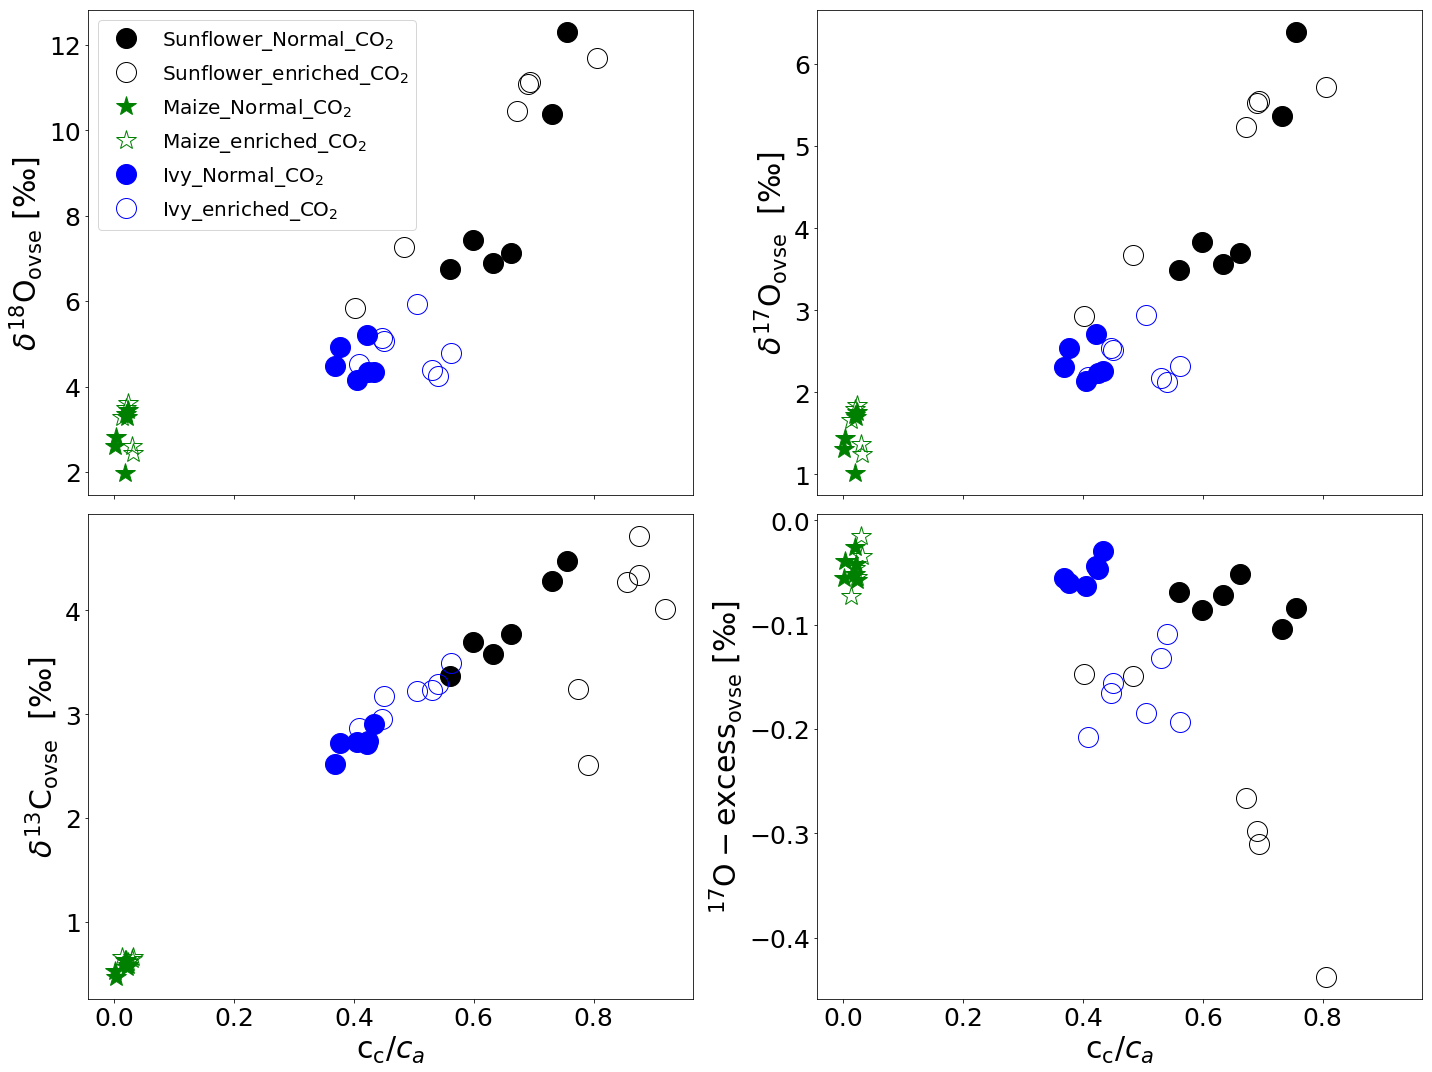

In [669]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,sharex=True, figsize=(20,15))
########highlight###
ax1.errorbar(Sunflower_Normal["cc_ca"],Sunflower_Normal["Dd18O"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax1.errorbar(Sunflower_enriched["cc_ca"],Sunflower_enriched["Dd18O"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax1.errorbar(Maize_Normal["cc_ca"],Maize_Normal["Dd18O"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax1.errorbar(Maize_enriched["cc_ca"],Maize_enriched["Dd18O"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax1.errorbar(Ivy_Normal["cc_ca"],Ivy_Normal["Dd18O"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax1.errorbar(Ivy_enriched["cc_ca"],Ivy_enriched["Dd18O"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")



#########################



#/Ca"],Sunflower_low["D18O_obs"],marker="o",markersize=20,color="y",label="Sunflower_Low light",ls="none")
ax1.legend(fontsize=20)
ax1.tick_params(labelsize=25)
ax1.set_ylabel("$\delta^{18}\mathregular{O_{ovse}}$ "+u"[\u2030]",fontsize=30)
#####maize####
##################################
ax2.errorbar(Sunflower_Normal["cc_ca"],Sunflower_Normal["Dd17O"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax2.errorbar(Sunflower_enriched["cc_ca"],Sunflower_enriched["Dd17O"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax2.errorbar(Maize_Normal["cc_ca"],Maize_Normal["Dd17O"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax2.errorbar(Maize_enriched["cc_ca"],Maize_enriched["Dd17O"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax2.errorbar(Ivy_Normal["cc_ca"],Ivy_Normal["Dd17O"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax2.errorbar(Ivy_enriched["cc_ca"],Ivy_enriched["Dd17O"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")






#######Low light Maize
#####################

#########Ivy d18O
#####################################

####################
#################################
#######Sunflower_d18O
#############################
#### Low light sunflower
######################


#######################


#ax2.legend(fontsize=20)
ax2.tick_params(labelsize=25)
ax2.set_ylabel("$\delta^{17}\mathregular{O_{ovse}}$ "+u" [\u2030]",fontsize=30)
################################################
#################################################

################################################
#################################################


ax3.errorbar(Sunflower_Normal["cc_ca"],Sunflower_Normal["Dd13C"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax3.errorbar(Sunflower_enriched["Ci/Ca"],Sunflower_enriched["Dd13C"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax3.errorbar(Maize_Normal["cc_ca"],Maize_Normal["Dd13C"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax3.errorbar(Maize_enriched["cc_ca"],Maize_enriched["Dd13C"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax3.errorbar(Ivy_Normal["cc_ca"],Ivy_Normal["Dd13C"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax3.errorbar(Ivy_enriched["cc_ca"],Ivy_enriched["Dd13C"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")




#######Low light Maize
####################

#########Ivy d18O
#####################################

####################
#################################
#######Sunflower_d18O
#############################


#ax3.legend(fontsize=20)

#ax3.legend(fontsize=20)
#ax3.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["D13C_obs"],marker="o",markersize=20,color="g",ls="none")
ax3.set_xlabel("$\mathregular{c_c}/{c_a}$",fontsize=30)
ax3.set_ylabel("$\delta^{13}\mathregular{C_{ovse}}$ "+u" [\u2030]",fontsize=30)
ax3.tick_params(labelsize=25)
ax3.tick_params(labelsize=25)

#####################
######################
################################################
#################################################

#####################
######################
##################################
ax4.errorbar(Sunflower_Normal["cc_ca"],Sunflower_Normal["DD17O"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Sunflower_enriched["cc_ca"],Sunflower_enriched["DD17O"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax4.errorbar(Maize_Normal["cc_ca"],Maize_Normal["DD17O"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Maize_enriched["cc_ca"],Maize_enriched["DD17O"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax4.errorbar(Ivy_Normal["cc_ca"],Ivy_Normal["DD17O"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Ivy_enriched["cc_ca"],Ivy_enriched["DD17O"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")





#######Low light Maize

#########################



######################


ax4.tick_params(labelsize=25)
ax4.tick_params(labelsize=25)
#ax4.legend(fontsize=20)
#ax4.set_ylim(-0.01,-500)
ax4.set_xlabel("$\mathregular{c_c}/{c_a}$",fontsize=30)
ax4.set_ylabel("$^{17}\mathregular{O-excess_{ovse}}$"+ u" [\u2030]",fontsize=30)
fig.tight_layout()
plt.savefig("/Users/getachew/surfdrive/Photosynthesis/Second_phase_Experiment/Photosynthesis paper/Difference_Only_plant_Cc_ca.eps")
plt.show()







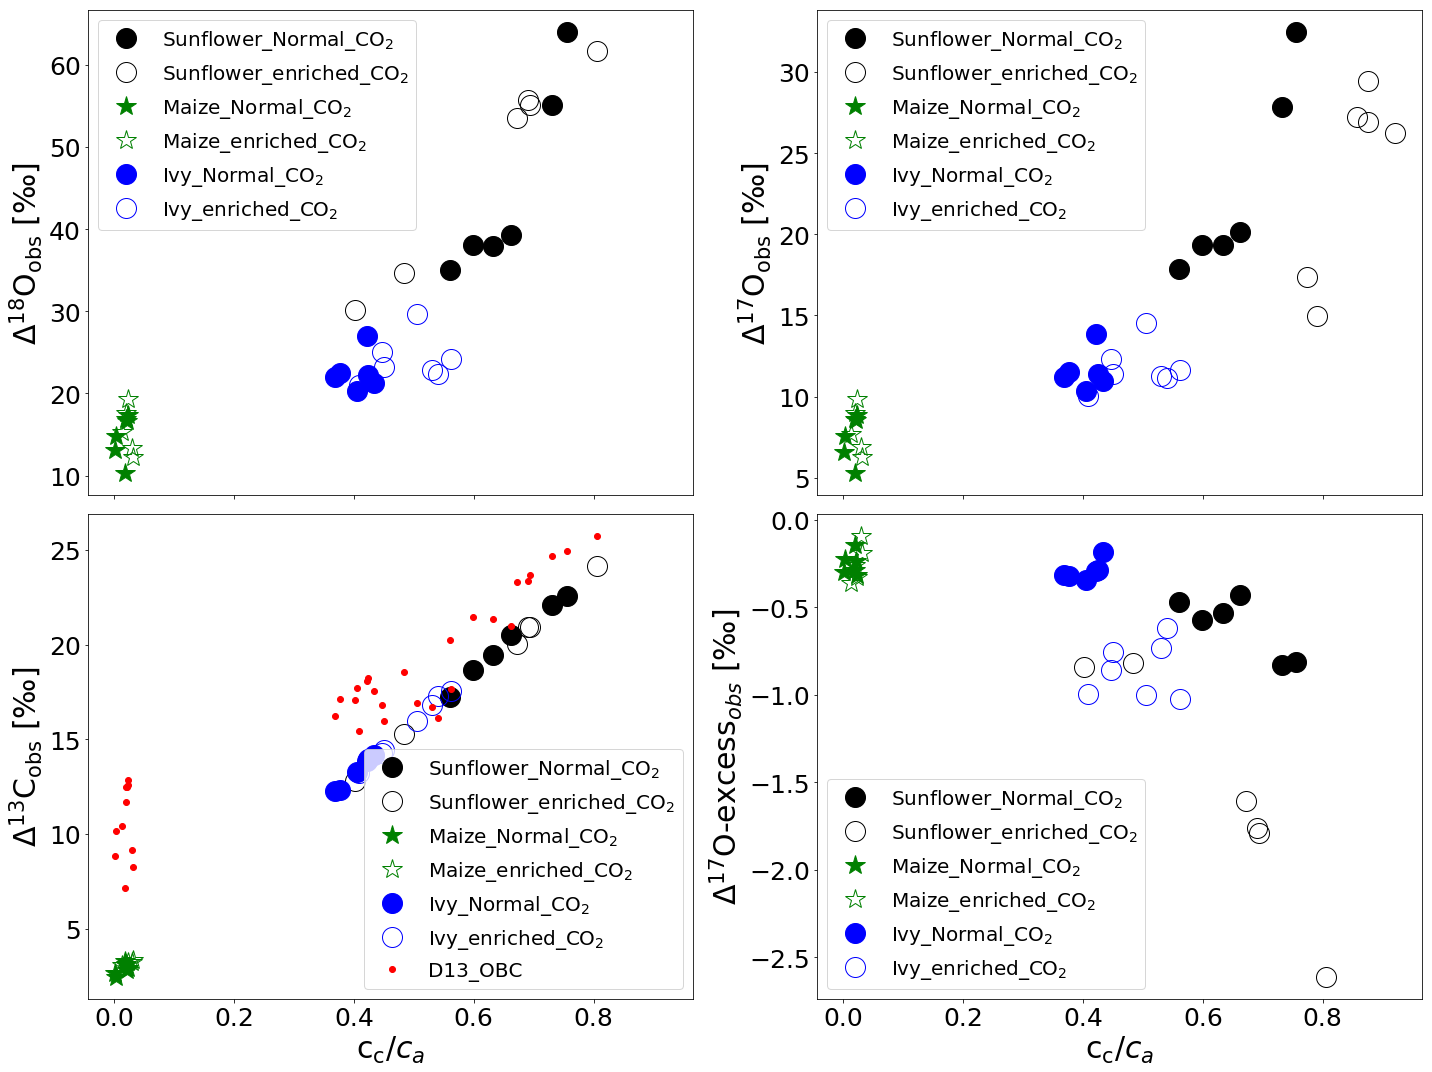

In [670]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,sharex=True, figsize=(20,15))
########highlight Maiz###

ax1.errorbar(Sunflower_Normal["cc_ca"],Sunflower_Normal["D18O_obs"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax1.errorbar(Sunflower_enriched["cc_ca"],Sunflower_enriched["D18O_obs"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax1.errorbar(Maize_Normal["cc_ca"],Maize_Normal["D18O_obs"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax1.errorbar(Maize_enriched["cc_ca"],Maize_enriched["D18O_obs"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax1.errorbar(Ivy_Normal["cc_ca"],Ivy_Normal["D18O_obs"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax1.errorbar(Ivy_enriched["cc_ca"],Ivy_enriched["D18O_obs"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")

ax1.legend(fontsize=20)
ax1.tick_params(labelsize=25)
ax1.set_ylabel("$\Delta^{18}\mathregular{O_{obs}}$ "+u"[\u2030]",fontsize=30)

#ax6=ax1.twinx()
#ax6.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["A"],ls="none")
#ax4.set_ylim(-0.01,-500)
#####maize####

ax2.errorbar(Sunflower_Normal["cc_ca"],Sunflower_Normal["D17O_obs"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax2.errorbar(Sunflower_enriched["Ci/Ca"],Sunflower_enriched["D17O_obs"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax2.errorbar(Maize_Normal["cc_ca"],Maize_Normal["D17O_obs"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax2.errorbar(Maize_enriched["cc_ca"],Maize_enriched["D17O_obs"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax2.errorbar(Ivy_Normal["cc_ca"],Ivy_Normal["D17O_obs"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax2.errorbar(Ivy_enriched["cc_ca"],Ivy_enriched["D17O_obs"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")

#######################
######################
ax2.legend(fontsize=20)
ax2.tick_params(labelsize=25)
ax2.set_ylabel("$\Delta^{17}\mathregular{O_{obs}}$ "+u"[\u2030]",fontsize=30)
################################################
#################################################


#######Low light Maize
ax3.errorbar(Sunflower_Normal["cc_ca"],Sunflower_Normal["D13C_obs"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax3.errorbar(Sunflower_enriched["cc_ca"],Sunflower_enriched["D13C_obs"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax3.errorbar(Maize_Normal["cc_ca"],Maize_Normal["D13C_obs"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax3.errorbar(Maize_enriched["cc_ca"],Maize_enriched["D13C_obs"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax3.errorbar(Ivy_Normal["cc_ca"],Ivy_Normal["D13C_obs"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax3.errorbar(Ivy_enriched["cc_ca"],Ivy_enriched["D13C_obs"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")

ax3.errorbar(Observed_discrimination["cc_ca"],Mesophyl_coductance["D13_OBC"],color="r",marker="o",ls="none")

ax3.legend(fontsize=20)
#ax3.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["D13C_obs"],marker="o",markersize=20,color="g",ls="none")
ax3.set_xlabel("$\mathregular{c_c}/{c_a}$",fontsize=30)
ax3.set_ylabel("$\Delta^{13}\mathregular{C_{obs}}$ "+u"[\u2030]",fontsize=30)
ax3.tick_params(labelsize=25)
ax3.tick_params(labelsize=25)

#####################
######################

ax4.errorbar(Sunflower_Normal["cc_ca"],Sunflower_Normal["D17O_excess_obs"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Sunflower_enriched["cc_ca"],Sunflower_enriched["D17O_excess_obs"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax4.errorbar(Maize_Normal["cc_ca"],Maize_Normal["D17O_excess_obs"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Maize_enriched["cc_ca"],Maize_enriched["D17O_excess_obs"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax4.errorbar(Ivy_Normal["cc_ca"],Ivy_Normal["D17O_excess_obs"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Ivy_enriched["cc_ca"],Ivy_enriched["D17O_excess_obs"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")


######################

ax4.tick_params(labelsize=25)
ax4.tick_params(labelsize=25)
ax4.legend(fontsize=20)
#ax5=ax4.twinx()
#ax5.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["A"],ls="none")
#ax4.set_ylim(-0.01,-500)
ax4.set_xlabel("$\mathregular{c_c}/{c_a}$",fontsize=30)
ax4.set_ylabel("$\Delta^{17}\mathregular{O}$"+"-"+"excess"+"$_{obs}$ "+u"[\u2030]",fontsize=30)

fig.tight_layout()
plt.savefig("/Users/getachew/surfdrive/Photosynthesis/Second_phase_Experiment/Photosynthesis paper/CO2_type_Plant_ccca.eps")
plt.show()






# using the following equation to fit for discrimination in 18O

$$\Delta^{18}O_{obs}=\frac{\overline{a}+\eta\Delta^{18}O_{ea}}{1-\frac{\eta\Delta^{18}O_{ea}}{1000}}$$

$$\eta=\frac{c_m}{c_a-c_m}$$

$$\Delta^{18}_{ea}=1000\frac{\delta^{18}O_{cequ}-\delta^{18}O_o}{1000+\delta^{18}O_o}$$

In [563]:
eta=(1000000*Mesophyl_coductance["c_m"])/(Photo_summary["CO2_o"]-1000000*Mesophyl_coductance["c_m"])
delta18_ea=1000*(Mesophyl_coductance["d18O_ce"]-Photo_summary["d18O_out"])/(Photo_summary["d18O_out"]+1000)
#delta18_ea=(Mesophyl_coductance["d18O_ce"]-Photo_summary["d18O_out"])

a18ww_cm=((Gas_exchange["C_i"]-Mesophyl_coductance["c_m"])*a_18w+((Photo_summary["CO2_o"]/1000000)-Gas_exchange["C_i"])*a_18s+(Photo_summary["CO2_o"]/1000000-c_s)*a_18b)/(Photo_summary["CO2_o"]/1000000-Mesophyl_coductance["c_m"]) 
Delta_obs1=(a18ww_cm+eta*delta18_ea)#/(1-(eta*delta18_ea/1000))
Delta_obs=(a18ww_cm+eta*delta18_ea)/(1-(eta*delta18_ea/1000))
Mesophyl_coductance["D18_cm"]=Delta_obs


# Similarly, for $\delta^{17}O$

 $$\Delta^{17}O_{obs}=\frac{\overline{a}+\eta\Delta^{17}O_{ea}}{1-\frac{\eta\Delta^{17}O_{ea}}{1000}}$$

 $$\eta=\frac{c_m}{c_a-c_m}$$

 $$\Delta^{17}_{ea}=1000\frac{\delta^{17}O_{cequ}-\delta^{17}O_o}{1000+\delta^{17}O_o}$$

In [564]:
ddswq=1000*((7.4/1000+1)**0.507-1)
eta_17=(1000000*Mesophyl_coductance["c_m"])/(Photo_summary["CO2_o"]-1000000*Mesophyl_coductance["c_m"])
delta17_ea=1000*(Mesophyl_coductance["d17O_ce"]-Photo_summary["d17O_out "])/(Photo_summary["d17O_out "]+1000)
#a18w_w is the waited fractionation of c18OO across boundary layer, stomata, cell wall and plasma membrane in series
a17ww_cm=((Gas_exchange["C_i"]-Mesophyl_coductance["c_m"])*a_17w+((Photo_summary["CO2_o"]/1000000)-Gas_exchange["C_i"])*a_17s+(Photo_summary["CO2_o"]/1000000-c_s)*a_17b)/(Photo_summary["CO2_o"]/1000000-Mesophyl_coductance["c_m"]) 
Delta17_obs1=(a17ww_cm+eta*delta17_ea)#/(1-(eta*delta17_ea/1000))
Delta17_obs=(a17ww_cm+eta*delta17_ea)/(1-(eta*delta17_ea/1000))
Mesophyl_coductance["D17_cm"]=Delta17_obs

# Big Delta

In [565]:
Mesophyl_coductance["DD17_cm"]=1000*np.log(Mesophyl_coductance["D17_cm"]/1000+1)-0.528*1000*np.log(Mesophyl_coductance["D18_cm"]/1000+1)

In [566]:
Mesophyl_coductance["DD17_cm"]

0    -0.181805
1    -0.200831
2    -1.953783
3    -0.293400
4    -0.212156
5    -0.136228
6    -0.382229
7    -1.557028
8    -1.436580
9    -1.441235
10   -0.926495
11   -0.771625
12   -0.166665
13   -0.167403
14   -0.146215
15   -0.288879
16   -0.325783
17   -0.157273
18   -0.171275
19   -0.163416
20   -0.472666
21   -0.430264
22   -0.356281
23   -0.141568
24   -0.163628
25   -0.105414
26   -0.142631
27   -0.159935
28   -0.205641
29   -0.768967
30   -0.821981
31   -0.802965
32   -0.629500
33   -0.740445
34   -0.869447
35   -0.810804
Name: DD17_cm, dtype: float64

# ISOflux of Assimilation

In [567]:
GPP=120 # PgCyr-1 Beer et al., 2010
FA=0.88*GPP
Observed_discrimination["D17O_excess_ISOFLUX"]=FA*Observed_discrimination["D17O_excess_obs"]

In [568]:

Observed_discrimination["d17_modelled"]=Mesophyl_coductance["D17_cm"]
Observed_discrimination["d18_modelled"]=Mesophyl_coductance["D18_cm"]
Observed_discrimination["Excess_modelled"]=Mesophyl_coductance["DD17_cm"]
Observed_discrimination["D13_OBC"]=Mesophyl_coductance["D13_OBC"]

In [569]:
#

In [570]:
## grouping C3 plants together 
Sunn_Ivy=Observed_discrimination.loc[~Observed_discrimination['Plant'].isin(['M'])]

Sunflower=Observed_discrimination.loc[~Observed_discrimination['Plant'].isin(['I'])&~Observed_discrimination['Plant'].isin(['M'])]
#######################################
Maize=Observed_discrimination.loc[~Observed_discrimination['Plant'].isin(['I'])&~Observed_discrimination['Plant'].isin(['S'])]
########################################
Ivy=Observed_discrimination.loc[~Observed_discrimination['Plant'].isin(['M'])&~Observed_discrimination['Plant'].isin(['S'])]

In [571]:
Sunflower_Normal=Sunflower.loc[~Sunflower["Enrich"].isin(["E"])&~Sunflower["Enrich"].isin(["E1"])&~Sunflower["Enrich"].isin(["E2"])&~Sunflower["Enrich"].isin(["E3"])]
Sunflower_enriched=Sunflower.loc[~Sunflower["Enrich"].isin(["N"])]   
###############
## grouping C3 plants togther 
Sunn_Ivy_Enriched=Sunn_Ivy.loc[~Sunn_Ivy["Enrich"].isin(["N"])]
Sunn_Ivy_Normal=Sunn_Ivy.loc[~Sunn_Ivy["Enrich"].isin(["E"])&~Sunn_Ivy["Enrich"].isin(["E1"])&~Sunn_Ivy["Enrich"].isin(["E2"])&~Sunn_Ivy["Enrich"].isin(["E3"])]
Maize_enriched=Maize.loc[~Maize["Enrich"].isin(["N"])] 
Maize_Normal=Maize.loc[~Maize["Enrich"].isin(["E"])] 
#########################
Ivy_enriched=Ivy.loc[~Ivy["Enrich"].isin(["N"])] 
Ivy_Normal=Ivy.loc[~Ivy["Enrich"].isin(["E2"])] 

# USing cc/ca 

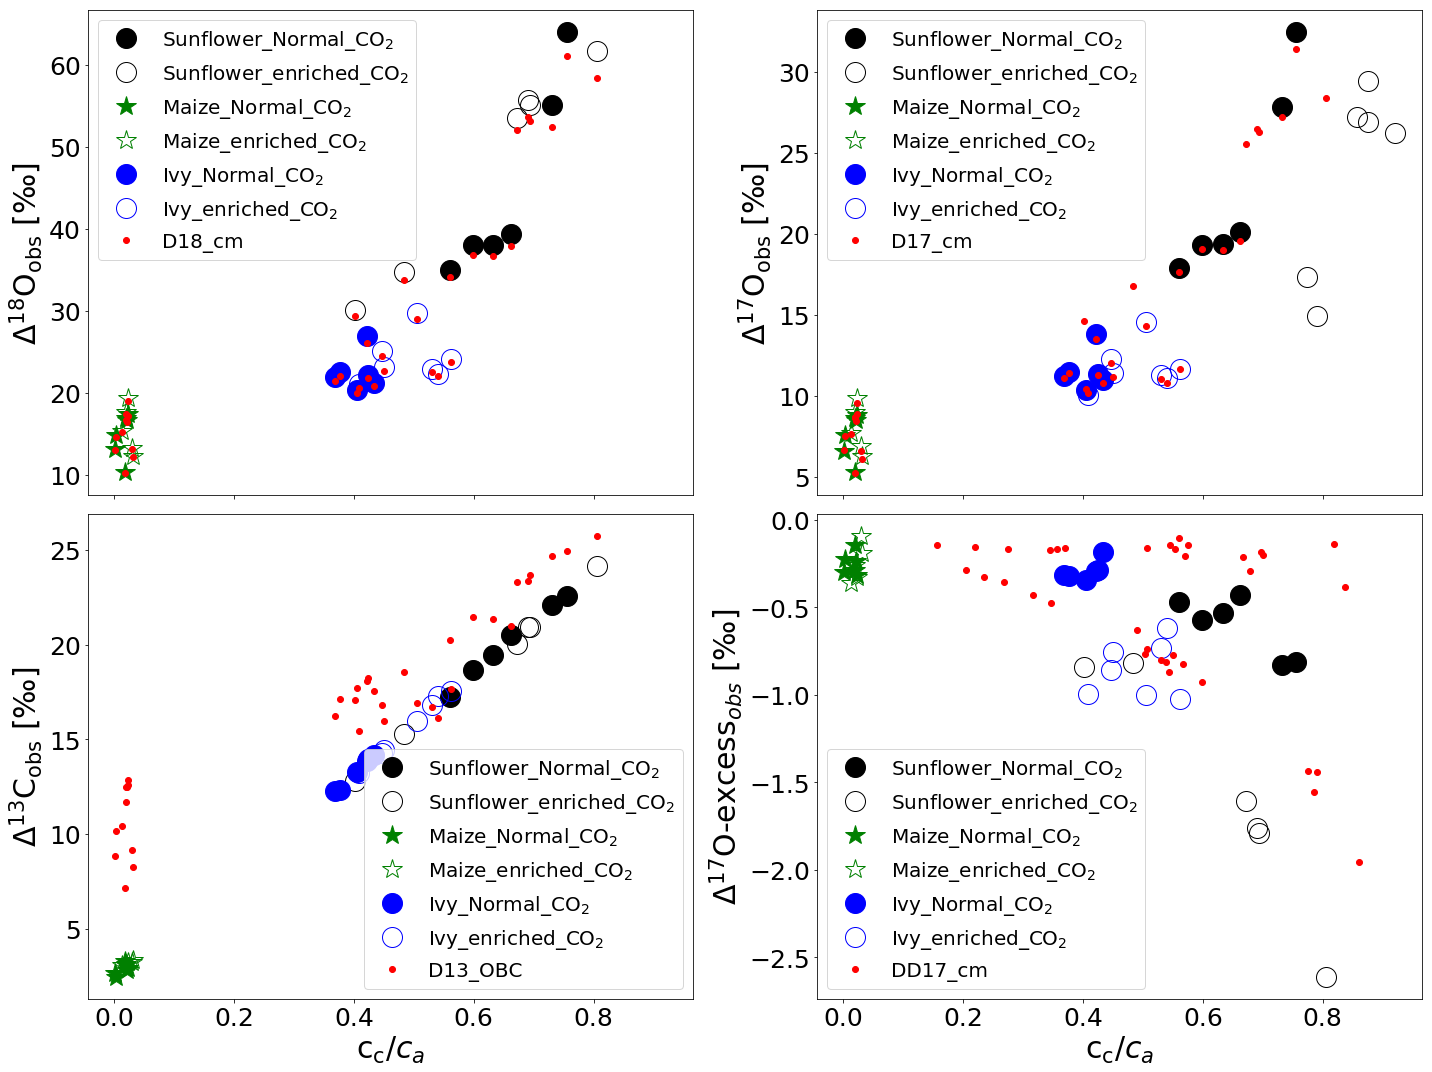

In [572]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,sharex=True, figsize=(20,15))
########highlight Maiz###

ax1.errorbar(Sunflower_Normal["cc_ca"],Sunflower_Normal["D18O_obs"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax1.errorbar(Sunflower_enriched["cc_ca"],Sunflower_enriched["D18O_obs"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax1.errorbar(Maize_Normal["cc_ca"],Maize_Normal["D18O_obs"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax1.errorbar(Maize_enriched["cc_ca"],Maize_enriched["D18O_obs"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax1.errorbar(Ivy_Normal["cc_ca"],Ivy_Normal["D18O_obs"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax1.errorbar(Ivy_enriched["cc_ca"],Ivy_enriched["D18O_obs"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")

ax1.errorbar(Observed_discrimination["cc_ca"],Mesophyl_coductance["D18_cm"],color="r",marker="o",ls="none")




ax1.legend(fontsize=20)
ax1.tick_params(labelsize=25)
ax1.set_ylabel("$\Delta^{18}\mathregular{O_{obs}}$ "+u"[\u2030]",fontsize=30)

#ax6=ax1.twinx()
#ax6.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["A"],ls="none")
#ax4.set_ylim(-0.01,-500)
#####maize####

ax2.errorbar(Sunflower_Normal["cc_ca"],Sunflower_Normal["D17O_obs"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax2.errorbar(Sunflower_enriched["Ci/Ca"],Sunflower_enriched["D17O_obs"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax2.errorbar(Maize_Normal["cc_ca"],Maize_Normal["D17O_obs"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax2.errorbar(Maize_enriched["cc_ca"],Maize_enriched["D17O_obs"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax2.errorbar(Ivy_Normal["cc_ca"],Ivy_Normal["D17O_obs"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax2.errorbar(Ivy_enriched["cc_ca"],Ivy_enriched["D17O_obs"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")

#######################
ax2.errorbar(Observed_discrimination["cc_ca"],Mesophyl_coductance["D17_cm"],color="r",marker="o",ls="none")
######################
ax2.legend(fontsize=20)
ax2.tick_params(labelsize=25)
ax2.set_ylabel("$\Delta^{17}\mathregular{O_{obs}}$ "+u"[\u2030]",fontsize=30)
################################################
#################################################


#######Low light Maize
ax3.errorbar(Sunflower_Normal["cc_ca"],Sunflower_Normal["D13C_obs"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax3.errorbar(Sunflower_enriched["cc_ca"],Sunflower_enriched["D13C_obs"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax3.errorbar(Maize_Normal["cc_ca"],Maize_Normal["D13C_obs"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax3.errorbar(Maize_enriched["cc_ca"],Maize_enriched["D13C_obs"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax3.errorbar(Ivy_Normal["cc_ca"],Ivy_Normal["D13C_obs"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax3.errorbar(Ivy_enriched["cc_ca"],Ivy_enriched["D13C_obs"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")

ax3.errorbar(Observed_discrimination["cc_ca"],Mesophyl_coductance["D13_OBC"],color="r",marker="o",ls="none")

ax3.legend(fontsize=20)
#ax3.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["D13C_obs"],marker="o",markersize=20,color="g",ls="none")
ax3.set_xlabel("$\mathregular{c_c}/{c_a}$",fontsize=30)
ax3.set_ylabel("$\Delta^{13}\mathregular{C_{obs}}$ "+u"[\u2030]",fontsize=30)
ax3.tick_params(labelsize=25)
ax3.tick_params(labelsize=25)

#####################
######################

ax4.errorbar(Sunflower_Normal["cc_ca"],Sunflower_Normal["D17O_excess_obs"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Sunflower_enriched["cc_ca"],Sunflower_enriched["D17O_excess_obs"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax4.errorbar(Maize_Normal["cc_ca"],Maize_Normal["D17O_excess_obs"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Maize_enriched["cc_ca"],Maize_enriched["D17O_excess_obs"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax4.errorbar(Ivy_Normal["cc_ca"],Ivy_Normal["D17O_excess_obs"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Ivy_enriched["cc_ca"],Ivy_enriched["D17O_excess_obs"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Observed_discrimination["cm_ca18"],Mesophyl_coductance["DD17_cm"],color="r",marker="o",ls="none")

######################

ax4.tick_params(labelsize=25)
ax4.tick_params(labelsize=25)
ax4.legend(fontsize=20)
#ax5=ax4.twinx()
#ax5.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["A"],ls="none")
#ax4.set_ylim(-0.01,-500)
ax4.set_xlabel("$\mathregular{c_c}/{c_a}$",fontsize=30)
ax4.set_ylabel("$\Delta^{17}\mathregular{O}$"+"-"+"excess"+"$_{obs}$ "+u"[\u2030]",fontsize=30)

fig.tight_layout()
plt.savefig("/Users/getachew/surfdrive/Photosynthesis/Second_phase_Experiment/Photosynthesis paper/CO2_type_Plant_ccca_#1.eps")
plt.show()







# Using cm/ca_18

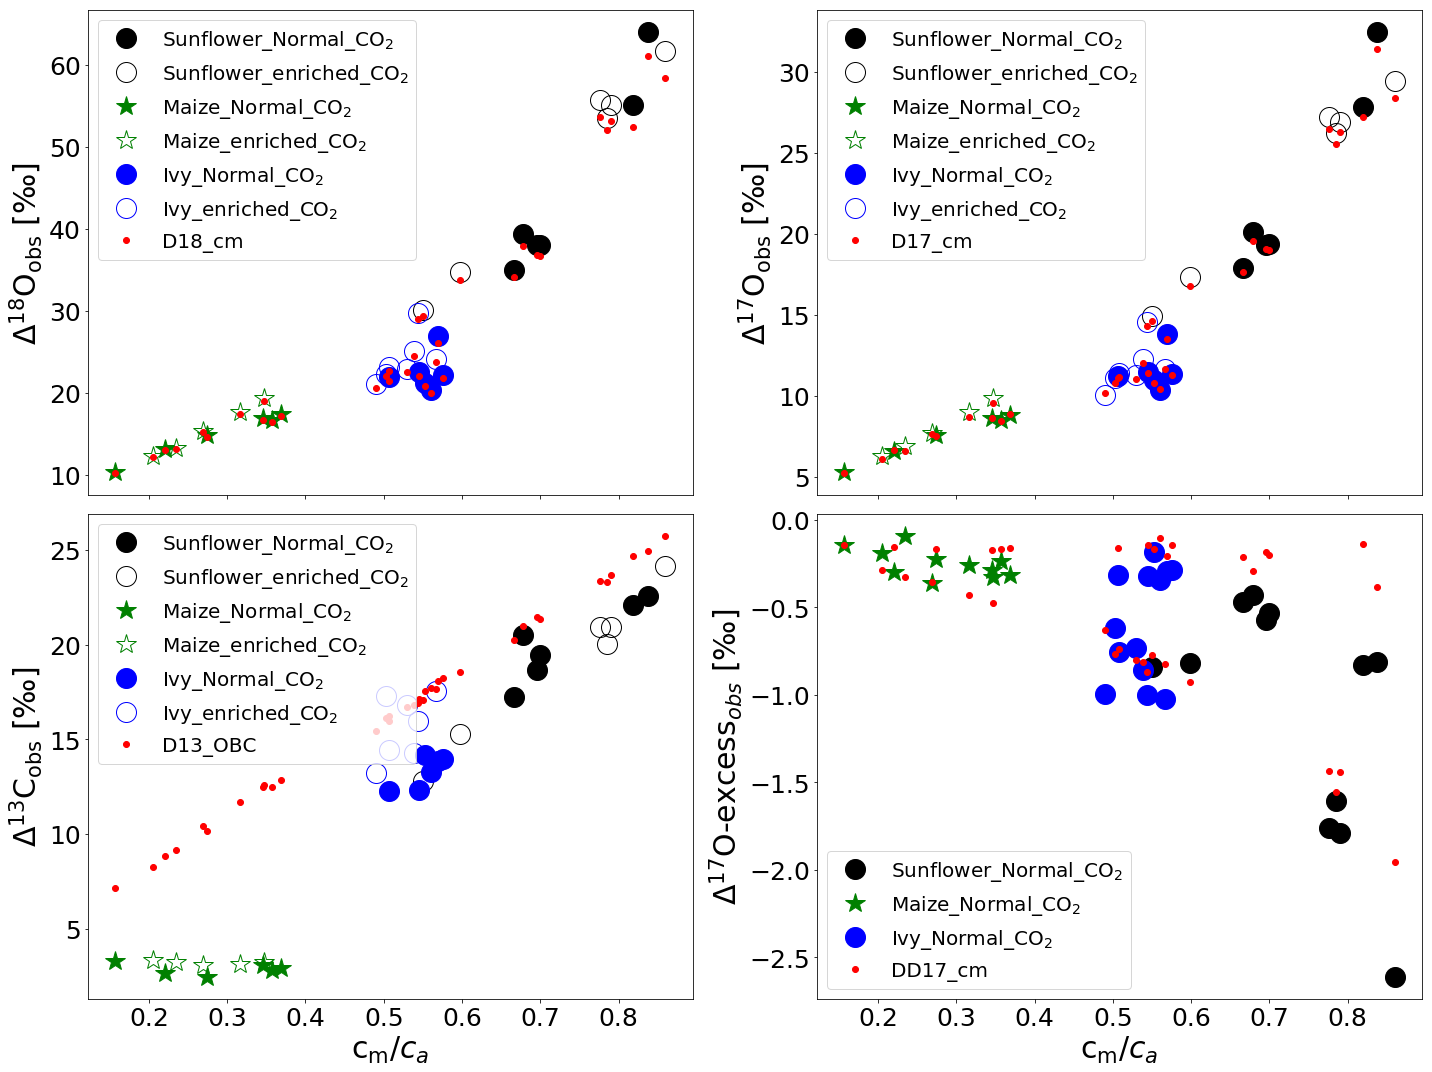

In [573]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,sharex=True, figsize=(20,15))
########highlight Maiz###

ax1.errorbar(Sunflower_Normal["cm_ca18"],Sunflower_Normal["D18O_obs"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax1.errorbar(Sunflower_enriched["cm_ca18"],Sunflower_enriched["D18O_obs"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax1.errorbar(Maize_Normal["cm_ca18"],Maize_Normal["D18O_obs"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax1.errorbar(Maize_enriched["cm_ca18"],Maize_enriched["D18O_obs"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax1.errorbar(Ivy_Normal["cm_ca18"],Ivy_Normal["D18O_obs"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax1.errorbar(Ivy_enriched["cm_ca18"],Ivy_enriched["D18O_obs"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")

ax1.errorbar(Observed_discrimination["cm_ca18"],Mesophyl_coductance["D18_cm"],color="r",marker="o",ls="none")
########################################################################
########################################################################

# def func_1(x, a, k, b):
#      return a * np.exp(-k*x) + b

# # # curve fit
# p1 = (1.,1.e-3,1.) # starting search koefs
# opt, pcov = curve_fit(func_1, Observed_discrimination["cm_ca18"][5:], Mesophyl_coductance["D18_cm"][5:],p1)
# a, k, b = opt
# # # test result
# x1 = np.linspace(0.1, 1, 250)
# y1 =func_1(x1, a, k, b)
# ax1.plot(x1, y1, color='k', label='All. func: $f(x) = %.3f e^{%.3f x} %+.3f$' % (a,k,b),linewidth=3)
# ##############################
# ## make a separte fit for C3  
# ############################
# ################################
# def C3_plants(x, a, k, b):
#      return a * np.exp(-k*x) + b

# # curve fit
# p1c = (1.,1.e-3,1.) # starting search koefs
# opt_c, pcov_c = curve_fit(C3_plants, Sunn_Ivy["cm_ca18"][5:], Sunn_Ivy["d18_modelled"][5:],p1c)
# ac, kc, bc = opt_c
# # # test result
# x1c = np.linspace(0.1, 1, 250)
# y1c =C3_plants(x1c, ac, kc, bc)
# ax1.plot(x1c, y1c, color='b', label='$C_3$. func: $f(x) = %.3f e^{%.3f x} %+.3f$' % (ac,kc,bc),linewidth=3)

###################################################################
####################################################################

##############################
## make a separte fit for C4  
############################
################################
# def C4_plants(x, a, k, b):
#      return a * np.exp(-k*x) + b

# # # curve fit
# #p1m = (1.e-5,1.e-3,1.) # starting search koefs
# opt_m, pcov_m = curve_fit(C4_plants,Maize["cm_ca18"],Maize["d18_modelled"],maxfev = 20000)
# am, km, bm = opt_m
# # # # test result
# x1m = np.linspace(0.1, 1, 250)
# y1m =C4_plants(x1m, am, km, bm)
# ax1.plot(x1m, y1m, color='r', label='$C_4$. func: $f(x) = %.3f e^{%.3f x} %+.3f$' % (am,km,bm),linewidth=3)

###################################################################
####################################################################
ax1.legend(fontsize=20)
ax1.tick_params(labelsize=25)
ax1.set_ylabel("$\Delta^{18}\mathregular{O_{obs}}$ "+u"[\u2030]",fontsize=30)

#ax6=ax1.twinx()
#ax6.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["A"],ls="none")
#ax4.set_ylim(-0.01,-500)
#####maize####

ax2.errorbar(Sunflower_Normal["cm_ca18"],Sunflower_Normal["D17O_obs"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax2.errorbar(Sunflower_enriched["cm_ca18"],Sunflower_enriched["D17O_obs"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax2.errorbar(Maize_Normal["cm_ca18"],Maize_Normal["D17O_obs"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax2.errorbar(Maize_enriched["cm_ca18"],Maize_enriched["D17O_obs"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax2.errorbar(Ivy_Normal["cm_ca18"],Ivy_Normal["D17O_obs"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax2.errorbar(Ivy_enriched["cm_ca18"],Ivy_enriched["D17O_obs"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")

#######################
ax2.errorbar(Observed_discrimination["cm_ca18"],Mesophyl_coductance["D17_cm"],color="r",marker="o",ls="none")


########################################################################
########################################################################

# def func_2(x, a, k, b):
#      return a * np.exp(-k*x) + b

# # # curve fit
# p2 = (1.,1.e-3,1.) # starting search koefs
# opt, pcov = curve_fit(func_2, Observed_discrimination["cm_ca17"][5:], Mesophyl_coductance["D17_cm"][5:],p2)
# a1, k2, b3 = opt
# # # test result
# x2 = np.linspace(0.1, 1, 250)
# y2 =func_1(x2, a1, k2, b3)
# ax2.plot(x2, y2, color='k', label='All. func: $f(x) = %.3f e^{%.3f x} %+.3f$' % (a,k,b),linewidth=3)


###################################################################
####################################################################

## make a separte fit for C3  
############################
################################
# def C3_d17(x, a, k, b):
#      return a * np.exp(-k*x) + b

# # # curve fit
# p1_d17 = (1.,1.e-3,1.) # starting search koefs
# opt_d17, pcov_d17 = curve_fit(C3_d17, Sunn_Ivy["cm_ca18"][5:], Sunn_Ivy["d17_modelled"][5:],p1_d17)
# ad17, kd17, bd17 = opt_d17
# # # test result
# x1d17 = np.linspace(0.1, 1, 250)
# y1d17 =C3_d17(x1d17, ad17, kd17, bd17)
# ax2.plot(x1d17, y1d17, color='b', label='$C_3$. func: $f(x) = %.3f e^{%.3f x} %+.3f$' % (ad17,kd17,bd17),linewidth=3)

# ###################################################################
####################################################################


######################
ax2.legend(fontsize=20)
ax2.tick_params(labelsize=25)
ax2.set_ylabel("$\Delta^{17}\mathregular{O_{obs}}$ "+u"[\u2030]",fontsize=30)
################################################
#################################################


#######Low light Maize
ax3.errorbar(Sunflower_Normal["cm_ca18"],Sunflower_Normal["D13C_obs"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax3.errorbar(Sunflower_enriched["cm_ca18"],Sunflower_enriched["D13C_obs"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax3.errorbar(Maize_Normal["cm_ca18"],Maize_Normal["D13C_obs"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax3.errorbar(Maize_enriched["cm_ca18"],Maize_enriched["D13C_obs"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax3.errorbar(Ivy_Normal["cm_ca18"],Ivy_Normal["D13C_obs"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax3.errorbar(Ivy_enriched["cm_ca18"],Ivy_enriched["D13C_obs"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")

ax3.errorbar(Observed_discrimination["cm_ca18"],Mesophyl_coductance["D13_OBC"],color="r",marker="o",ls="none")

ax3.legend(fontsize=20)
# ax3.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["D13C_obs"],marker="o",markersize=20,color="g",ls="none")
ax3.set_xlabel("$\mathregular{c_m}/{c_a}$",fontsize=30)
ax3.set_ylabel("$\Delta^{13}\mathregular{C_{obs}}$ "+u"[\u2030]",fontsize=30)
ax3.tick_params(labelsize=25)
ax3.tick_params(labelsize=25)

#####################
######################

ax4.errorbar(Sunflower["cm_ca18"],Sunflower["D17O_excess_obs"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
#ax4.errorbar(Sunflower_enriched["cm_ca18"],Sunflower_enriched["D17O_excess_obs"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax4.errorbar(Maize["cm_ca18"],Maize["D17O_excess_obs"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
#ax4.errorbar(Maize_enriched["cm_ca18"],Maize_enriched["D17O_excess_obs"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax4.errorbar(Ivy["cm_ca18"],Ivy["D17O_excess_obs"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
#ax4.errorbar(Ivy_enriched["cm_ca18"],Ivy_enriched["D17O_excess_obs"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")

ax4.errorbar(Observed_discrimination["cm_ca18"],Mesophyl_coductance["DD17_cm"],color="r",marker="o",ls="none")


# ###################################################################
# ####################################################################
Observed_discrimination["Excess_modelled"]

ax4.tick_params(labelsize=25)
ax4.tick_params(labelsize=25)
ax4.legend(fontsize=20)
#ax5=ax4.twinx()
#ax5.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["A"],ls="none")
#ax4.set_ylim(-0.01,-500)
ax4.set_xlabel("$\mathregular{c_m}/{c_a}$",fontsize=30)
ax4.set_ylabel("$\Delta^{17}\mathregular{O}$"+"-"+"excess"+"$_{obs}$ "+u"[\u2030]",fontsize=30)

fig.tight_layout()
plt.savefig("/Users/getachew/surfdrive/Photosynthesis/Second_phase_Experiment/Photosynthesis paper/CO2_type_Plant_cmca18_#1.eps")
plt.show()








In [574]:
Maize["d18_modelled"],Maize["cm_ca18"]

(12    16.431334
 13    14.599416
 14    10.258575
 15    12.189120
 16    13.156448
 17    12.972607
 18    16.705530
 19    17.153089
 20    19.033748
 21    17.388291
 22    15.163769
 Name: d18_modelled, dtype: float64, 12    0.357010
 13    0.274125
 14    0.156867
 15    0.205244
 16    0.235073
 17    0.220009
 18    0.345180
 19    0.369122
 20    0.346817
 21    0.316407
 22    0.268423
 Name: cm_ca18, dtype: float64)

In [575]:
Mesophyl_coductance["D18_cm"]

0     36.824315
1     36.670239
2     58.384212
3     37.931152
4     34.126962
5     52.493021
6     61.113807
7     52.034007
8     53.616343
9     53.210041
10    33.789713
11    29.399676
12    16.431334
13    14.599416
14    10.258575
15    12.189120
16    13.156448
17    12.972607
18    16.705530
19    17.153089
20    19.033748
21    17.388291
22    15.163769
23    21.810526
24    20.889782
25    20.014453
26    22.000809
27    21.423440
28    26.088547
29    22.001493
30    23.779899
31    22.550259
32    20.608589
33    22.717710
34    28.996183
35    24.534122
Name: D18_cm, dtype: float64

# using cm_17/ca

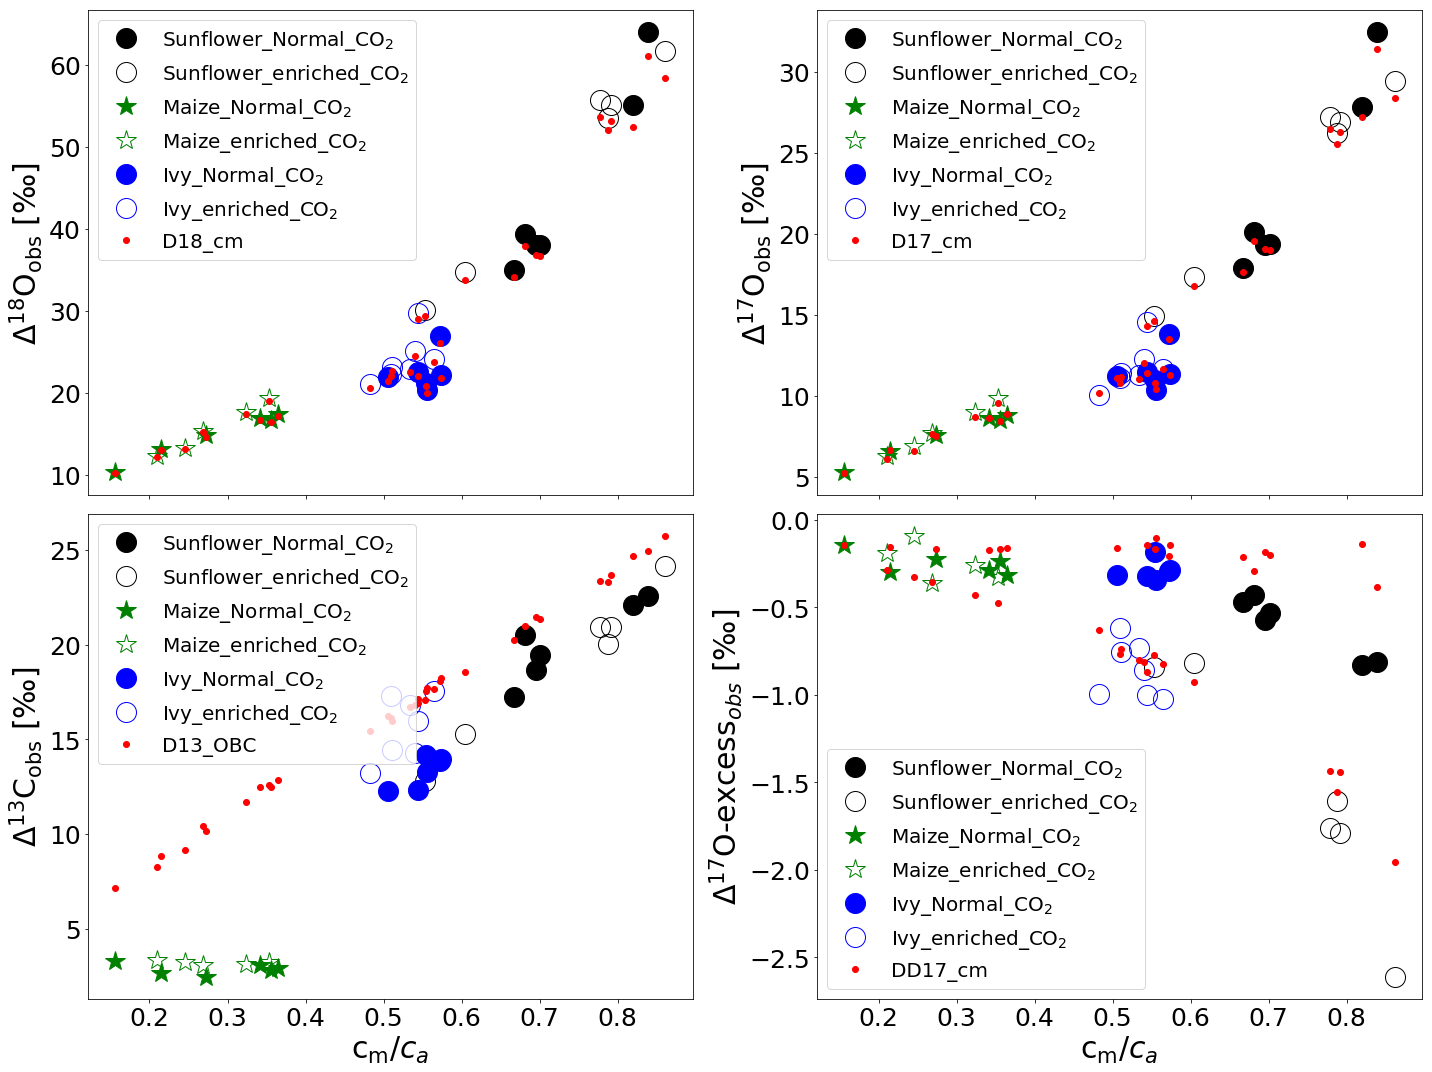

In [576]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,sharex=True, figsize=(20,15))
########highlight Maiz###

ax1.errorbar(Sunflower_Normal["cm_ca17"],Sunflower_Normal["D18O_obs"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax1.errorbar(Sunflower_enriched["cm_ca17"],Sunflower_enriched["D18O_obs"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax1.errorbar(Maize_Normal["cm_ca17"],Maize_Normal["D18O_obs"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax1.errorbar(Maize_enriched["cm_ca17"],Maize_enriched["D18O_obs"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax1.errorbar(Ivy_Normal["cm_ca17"],Ivy_Normal["D18O_obs"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax1.errorbar(Ivy_enriched["cm_ca17"],Ivy_enriched["D18O_obs"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")

ax1.errorbar(Observed_discrimination["cm_ca17"],Mesophyl_coductance["D18_cm"],color="r",marker="o",ls="none")

ax1.legend(fontsize=20)
ax1.tick_params(labelsize=25)
ax1.set_ylabel("$\Delta^{18}\mathregular{O_{obs}}$ "+u"[\u2030]",fontsize=30)

#ax6=ax1.twinx()
#ax6.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["A"],ls="none")
#ax4.set_ylim(-0.01,-500)
#####maize####

ax2.errorbar(Sunflower_Normal["cm_ca17"],Sunflower_Normal["D17O_obs"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax2.errorbar(Sunflower_enriched["cm_ca17"],Sunflower_enriched["D17O_obs"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax2.errorbar(Maize_Normal["cm_ca17"],Maize_Normal["D17O_obs"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax2.errorbar(Maize_enriched["cm_ca17"],Maize_enriched["D17O_obs"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax2.errorbar(Ivy_Normal["cm_ca17"],Ivy_Normal["D17O_obs"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax2.errorbar(Ivy_enriched["cm_ca17"],Ivy_enriched["D17O_obs"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")

#######################
ax2.errorbar(Observed_discrimination["cm_ca17"],Mesophyl_coductance["D17_cm"],color="r",marker="o",ls="none")
######################
ax2.legend(fontsize=20)
ax2.tick_params(labelsize=25)
ax2.set_ylabel("$\Delta^{17}\mathregular{O_{obs}}$ "+u"[\u2030]",fontsize=30)
################################################
#################################################


#######Low light Maize
ax3.errorbar(Sunflower_Normal["cm_ca17"],Sunflower_Normal["D13C_obs"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax3.errorbar(Sunflower_enriched["cm_ca17"],Sunflower_enriched["D13C_obs"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax3.errorbar(Maize_Normal["cm_ca17"],Maize_Normal["D13C_obs"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax3.errorbar(Maize_enriched["cm_ca17"],Maize_enriched["D13C_obs"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax3.errorbar(Ivy_Normal["cm_ca17"],Ivy_Normal["D13C_obs"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax3.errorbar(Ivy_enriched["cm_ca17"],Ivy_enriched["D13C_obs"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")

ax3.errorbar(Observed_discrimination["cm_ca17"],Mesophyl_coductance["D13_OBC"],color="r",marker="o",ls="none")

ax3.legend(fontsize=20)
#ax3.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["D13C_obs"],marker="o",markersize=20,color="g",ls="none")
ax3.set_xlabel("$\mathregular{c_m}/{c_a}$",fontsize=30)
ax3.set_ylabel("$\Delta^{13}\mathregular{C_{obs}}$ "+u"[\u2030]",fontsize=30)
ax3.tick_params(labelsize=25)
ax3.tick_params(labelsize=25)

#####################
######################

ax4.errorbar(Sunflower_Normal["cm_ca17"],Sunflower_Normal["D17O_excess_obs"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Sunflower_enriched["cm_ca17"],Sunflower_enriched["D17O_excess_obs"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax4.errorbar(Maize_Normal["cm_ca17"],Maize_Normal["D17O_excess_obs"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Maize_enriched["cm_ca17"],Maize_enriched["D17O_excess_obs"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax4.errorbar(Ivy_Normal["cm_ca17"],Ivy_Normal["D17O_excess_obs"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Ivy_enriched["cm_ca17"],Ivy_enriched["D17O_excess_obs"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Observed_discrimination["cm_ca17"],Mesophyl_coductance["DD17_cm"],color="r",marker="o",ls="none")

######################

ax4.tick_params(labelsize=25)
ax4.tick_params(labelsize=25)
ax4.legend(fontsize=20)
#ax5=ax4.twinx()
#ax5.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["A"],ls="none")
#ax4.set_ylim(-0.01,-500)
ax4.set_xlabel("$\mathregular{c_m}/{c_a}$",fontsize=30)
ax4.set_ylabel("$\Delta^{17}\mathregular{O}$"+"-"+"excess"+"$_{obs}$ "+u"[\u2030]",fontsize=30)

fig.tight_layout()
plt.savefig("/Users/getachew/surfdrive/Photosynthesis/Second_phase_Experiment/Photosynthesis paper/CO2_type_Plant_cccm18_#nomodel.eps")
plt.show()









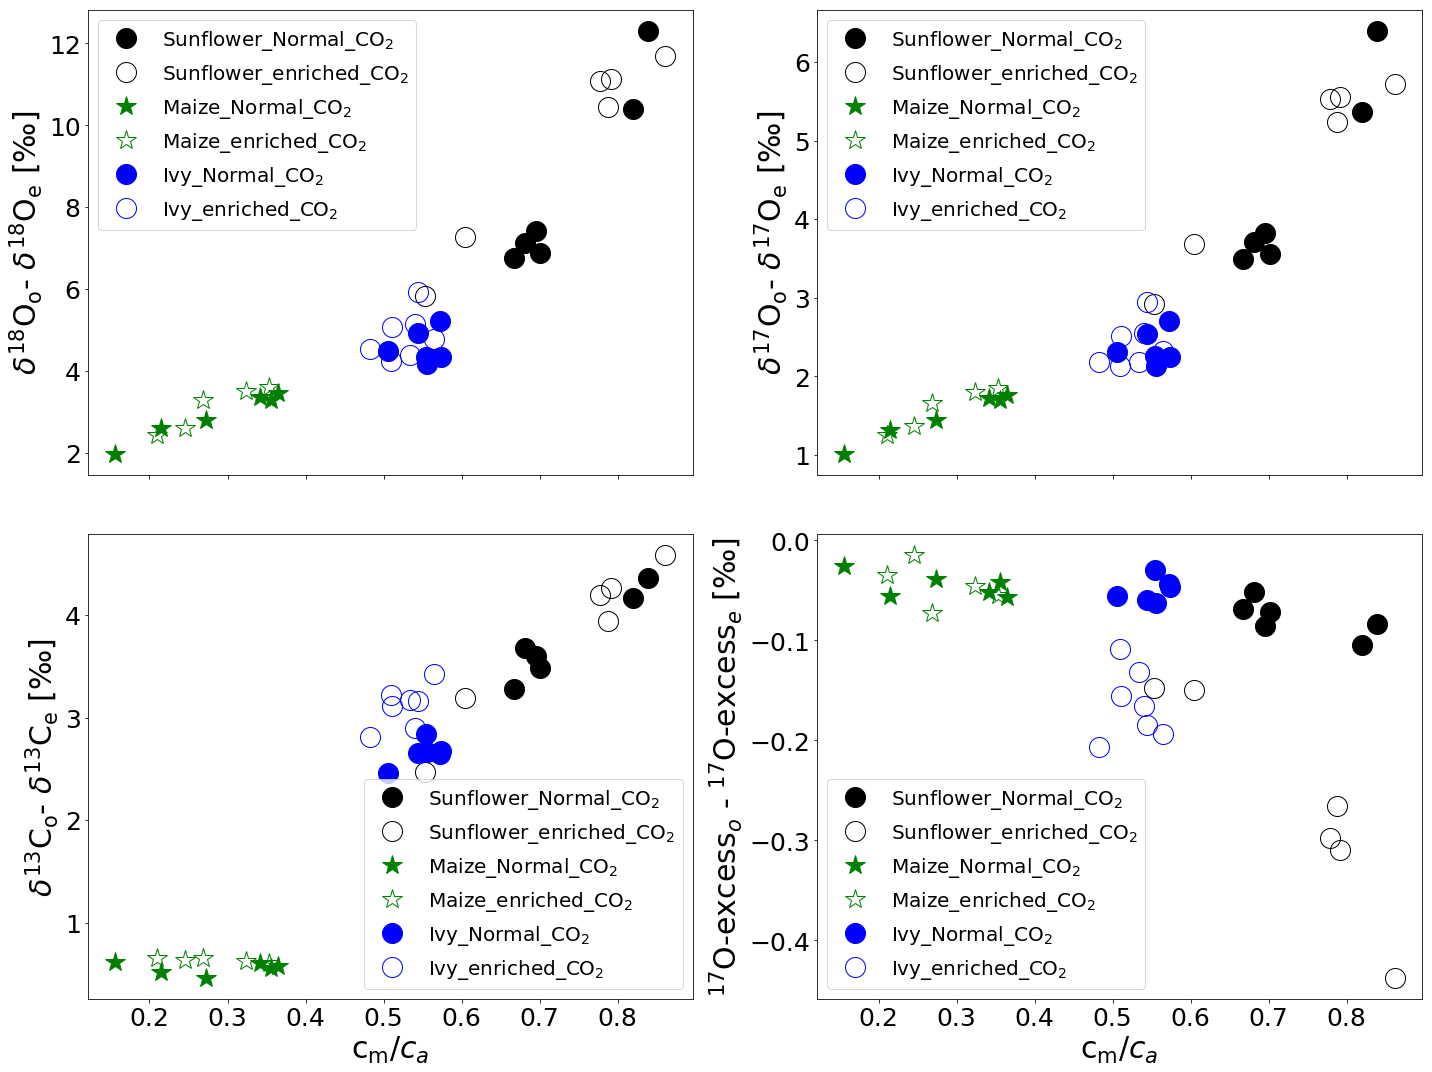

In [577]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,sharex=True, figsize=(20,15))
########highlight Maiz###

ax1.errorbar(Sunflower_Normal["cm_ca17"],Sunflower_Normal["d_d18O"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax1.errorbar(Sunflower_enriched["cm_ca17"],Sunflower_enriched["d_d18O"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax1.errorbar(Maize_Normal["cm_ca17"],Maize_Normal["d_d18O"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax1.errorbar(Maize_enriched["cm_ca17"],Maize_enriched["d_d18O"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax1.errorbar(Ivy_Normal["cm_ca17"],Ivy_Normal["d_d18O"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax1.errorbar(Ivy_enriched["cm_ca17"],Ivy_enriched["d_d18O"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")

#ax1.errorbar(Observed_discrimination["cm_ca17"],Mesophyl_coductance["D18_cm"],color="r",marker="o",ls="none")

ax1.legend(fontsize=20)
ax1.tick_params(labelsize=25)
ax1.set_ylabel("$\delta^{18}\mathregular{O_{o}}$"+ "-"+" $\delta^{18}\mathregular{O_{e}}$ "+u"[\u2030]",fontsize=30)

#ax6=ax1.twinx()
#ax6.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["A"],ls="none")
#ax4.set_ylim(-0.01,-500)
#####maize####

ax2.errorbar(Sunflower_Normal["cm_ca17"],Sunflower_Normal["d_d17O"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax2.errorbar(Sunflower_enriched["cm_ca17"],Sunflower_enriched["d_d17O"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax2.errorbar(Maize_Normal["cm_ca17"],Maize_Normal["d_d17O"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax2.errorbar(Maize_enriched["cm_ca17"],Maize_enriched["d_d17O"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax2.errorbar(Ivy_Normal["cm_ca17"],Ivy_Normal["d_d17O"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax2.errorbar(Ivy_enriched["cm_ca17"],Ivy_enriched["d_d17O"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")

#######################
#ax2.errorbar(Observed_discrimination["cm_ca17"],Mesophyl_coductance["D17_cm"],color="r",marker="o",ls="none")
######################
ax2.legend(fontsize=20)
ax2.tick_params(labelsize=25)
ax2.set_ylabel("$\delta^{17}\mathregular{O_{o}}$"+ "-"+" $\delta^{17}\mathregular{O_{e}}$ "+u"[\u2030]",fontsize=30)
################################################
#################################################


#######Low light Maize
ax3.errorbar(Sunflower_Normal["cm_ca17"],Sunflower_Normal["d_d13C"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax3.errorbar(Sunflower_enriched["cm_ca17"],Sunflower_enriched["d_d13C"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax3.errorbar(Maize_Normal["cm_ca17"],Maize_Normal["d_d13C"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax3.errorbar(Maize_enriched["cm_ca17"],Maize_enriched["d_d13C"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax3.errorbar(Ivy_Normal["cm_ca17"],Ivy_Normal["d_d13C"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax3.errorbar(Ivy_enriched["cm_ca17"],Ivy_enriched["d_d13C"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")

#ax3.errorbar(Observed_discrimination["cm_ca17"],Mesophyl_coductance["D13_OBC"],color="r",marker="o",ls="none")

ax3.legend(fontsize=20)
#ax3.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["D13C_obs"],marker="o",markersize=20,color="g",ls="none")
ax3.set_xlabel("$\mathregular{c_m}/{c_a}$",fontsize=30)
ax3.set_ylabel("$\delta^{13}\mathregular{C_{o}}$"+ "-"+" $\delta^{13}\mathregular{C_{e}}$ "+u"[\u2030]",fontsize=30)
ax3.tick_params(labelsize=25)
ax3.tick_params(labelsize=25)

#####################
######################

ax4.errorbar(Sunflower_Normal["cm_ca17"],Sunflower_Normal["D_D17O"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Sunflower_enriched["cm_ca17"],Sunflower_enriched["D_D17O"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax4.errorbar(Maize_Normal["cm_ca17"],Maize_Normal["D_D17O"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Maize_enriched["cm_ca17"],Maize_enriched["D_D17O"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax4.errorbar(Ivy_Normal["cm_ca17"],Ivy_Normal["D_D17O"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Ivy_enriched["cm_ca17"],Ivy_enriched["D_D17O"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")
#ax4.errorbar(Observed_discrimination["cm_ca17"],Mesophyl_coductance["DD17_cm"],color="r",marker="o",ls="none")

######################

ax4.tick_params(labelsize=25)
ax4.tick_params(labelsize=25)
ax4.legend(fontsize=20)
#ax5=ax4.twinx()
#ax5.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["A"],ls="none")
#ax4.set_ylim(-0.01,-500)
ax4.set_xlabel("$\mathregular{c_m}/{c_a}$",fontsize=30)
ax4.set_ylabel("$^{17}\mathregular{O}$"+"-"+"excess"+"$_{o}$"+" -"+" $^{17}\mathregular{O}$"+"-"+"excess"+"$_{e}$ "+u"[\u2030]",fontsize=30)

fig.tight_layout()
plt.savefig("/Users/getachew/surfdrive/Photosynthesis/Second_phase_Experiment/Photosynthesis paper/Difference.eps")
plt.show()










# Assimilated CO2 

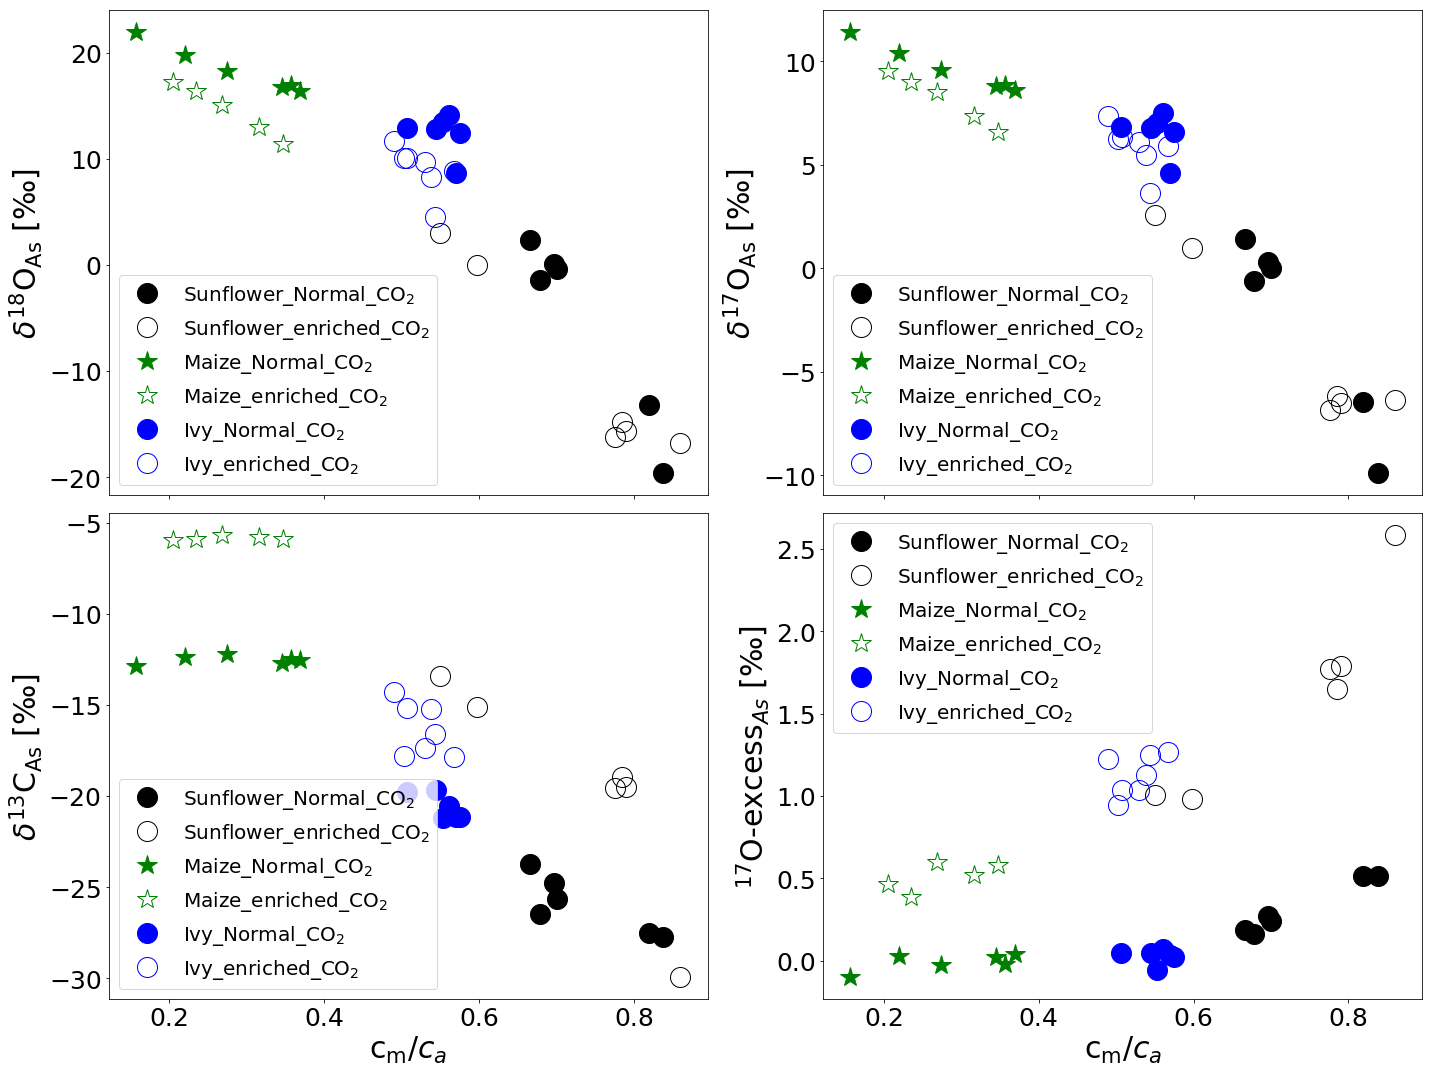

In [578]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,sharex=True, figsize=(20,15))
########highlight Maiz###

ax1.errorbar(Sunflower_Normal["cm_ca18"],Sunflower_Normal["d18O_ass"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax1.errorbar(Sunflower_enriched["cm_ca18"],Sunflower_enriched["d18O_ass"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax1.errorbar(Maize_Normal["cm_ca18"],Maize_Normal["d18O_ass"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax1.errorbar(Maize_enriched["cm_ca18"],Maize_enriched["d18O_ass"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax1.errorbar(Ivy_Normal["cm_ca18"],Ivy_Normal["d18O_ass"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax1.errorbar(Ivy_enriched["cm_ca18"],Ivy_enriched["d18O_ass"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")

#ax1.errorbar(Observed_discrimination["cm_ca17"],Mesophyl_coductance["D18_cm"],color="r",marker="o",ls="none")

ax1.legend(fontsize=20)
ax1.tick_params(labelsize=25)
ax1.set_ylabel("$\delta^{18}\mathregular{O_{As}}$ "+u"[\u2030]",fontsize=30)

#ax6=ax1.twinx()
#ax6.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["A"],ls="none")
#ax4.set_ylim(-0.01,-500)
#####maize####

ax2.errorbar(Sunflower_Normal["cm_ca18"],Sunflower_Normal["d17O_ass"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax2.errorbar(Sunflower_enriched["cm_ca18"],Sunflower_enriched["d17O_ass"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax2.errorbar(Maize_Normal["cm_ca18"],Maize_Normal["d17O_ass"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax2.errorbar(Maize_enriched["cm_ca18"],Maize_enriched["d17O_ass"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax2.errorbar(Ivy_Normal["cm_ca18"],Ivy_Normal["d17O_ass"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax2.errorbar(Ivy_enriched["cm_ca18"],Ivy_enriched["d17O_ass"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")

#######################
#ax2.errorbar(Observed_discrimination["cm_ca18"],Mesophyl_coductance["D17_cm"],color="r",marker="o",ls="none")
######################
ax2.legend(fontsize=20)
ax2.tick_params(labelsize=25)
ax2.set_ylabel("$\delta^{17}\mathregular{O_{As}}$ "+u"[\u2030]",fontsize=30)
################################################
#################################################


#######Low light Maize
ax3.errorbar(Sunflower_Normal["cm_ca18"],Sunflower_Normal["d13C_ass"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax3.errorbar(Sunflower_enriched["cm_ca18"],Sunflower_enriched["d13C_ass"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax3.errorbar(Maize_Normal["cm_ca18"],Maize_Normal["d13C_ass"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax3.errorbar(Maize_enriched["cm_ca18"],Maize_enriched["d13C_ass"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax3.errorbar(Ivy_Normal["cm_ca18"],Ivy_Normal["d13C_ass"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax3.errorbar(Ivy_enriched["cm_ca18"],Ivy_enriched["d13C_ass"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")

#ax3.errorbar(Observed_discrimination["cm_ca18"],Mesophyl_coductance["D13_OBC"],color="r",marker="o",ls="none")

ax3.legend(fontsize=20)
#ax3.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["D13C_obs"],marker="o",markersize=20,color="g",ls="none")
ax3.set_xlabel("$\mathregular{c_m}/{c_a}$",fontsize=30)
ax3.set_ylabel("$\delta^{13}\mathregular{C_{As}}$ "+u"[\u2030]",fontsize=30)
ax3.tick_params(labelsize=25)
ax3.tick_params(labelsize=25)

#####################
######################

ax4.errorbar(Sunflower_Normal["cm_ca18"],Sunflower_Normal["Excess17O_ass"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Sunflower_enriched["cm_ca18"],Sunflower_enriched["Excess17O_ass"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax4.errorbar(Maize_Normal["cm_ca18"],Maize_Normal["Excess17O_ass"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Maize_enriched["cm_ca18"],Maize_enriched["Excess17O_ass"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax4.errorbar(Ivy_Normal["cm_ca18"],Ivy_Normal["Excess17O_ass"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Ivy_enriched["cm_ca18"],Ivy_enriched["Excess17O_ass"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")
#ax4.errorbar(Observed_discrimination["cm_ca18"],Mesophyl_coductance["DD17_cm"],color="r",marker="o",ls="none")

######################

ax4.tick_params(labelsize=25)
ax4.tick_params(labelsize=25)
ax4.legend(fontsize=20)
#ax5=ax4.twinx()
#ax5.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["A"],ls="none")
#ax4.set_ylim(-0.01,-500)
ax4.set_xlabel("$\mathregular{c_m}/{c_a}$",fontsize=30)
ax4.set_ylabel("$^{17}\mathregular{O}$"+"-"+"excess"+"$_{As}$ "+u"[\u2030]",fontsize=30)

fig.tight_layout()
plt.savefig("/Users/getachew/surfdrive/Photosynthesis/Second_phase_Experiment/Photosynthesis paper/Assimilated_CO2.eps")
plt.show()










# Calculating degree of equilibrum   
$$\theta=\frac{\Delta^{18}_{ca}+\frac{a18ww_{cm}}{\frac{c_m}{c_o-c_m}+1}}{\Delta^{18}_{ea}+\frac{a18ww_{cm}}{\frac{c_m}{c_o-c_m}+1}}$$

$$\Delta^{18}_{ca}=1000\frac{\Delta^{18}_{obs}-a18ww_{cm}}{(1000-\Delta^{18}_{obs})\frac{c_m}{c_o-c_m}}$$

In [579]:
zeta_plus1=eta+1 ## eta cm/(co-cm), see above 
Dca_18=1000*(Observed_discrimination["D18O_obs"]-a18w_w)/((1000-Observed_discrimination["D18O_obs"])*eta)

In [580]:
Theta=(Dca_18+(a18ww_cm/zeta_plus1))/(delta18_ea+(a18ww_cm/zeta_plus1))## delta18_ea is for D18_ea, see above

In [581]:
Theta

0     1.151461
1     1.140107
2     1.217672
3     1.123332
4     1.129074
5     1.204012
6     1.210030
7     1.161055
8     1.181986
9     1.179729
10    1.131374
11    1.122418
12    1.211625
13    1.193174
14    1.202910
15    1.168325
16    1.182530
17    1.201449
18    1.238638
19    1.214604
20    1.218899
21    1.210186
22    1.214402
23    1.145755
24    1.123519
25    1.139765
26    1.132992
27    1.129374
28    1.148086
29    1.036701
30    1.064415
31    1.059375
32    1.092292
33    1.089866
34    1.095711
35    1.103310
dtype: float64

In [582]:
#eta_17=(1000000*Mesophyl_coductance["c_m17"])/(Photo_summary["CO2_o"]-1000000*Mesophyl_coductance["c_m17"])
#delta17_ea=1
qq=(1-(1000000*Mesophyl_coductance["c_m"])/(Photo_summary["c_o"]))
Thetaaa=(Mesophyl_coductance["d18o_i"]-Photo_summary["d18O_out"]+a18w_w*qq)/(Mesophyl_coductance["d18O_ce"]-Photo_summary["d18O_out"]+a18w_w*qq)

In [583]:
flux_out=1000000*Mesophyl_coductance["c_m"]/(Photo_summary["c_o"]-1000000*Mesophyl_coductance["c_m"])
SF_flux=flux_out[:17]
MZ_flux=flux_out[17:28]
IV_flux=flux_out[28:]

In [584]:
Thetaaa

0     1.000001
1     1.000002
2     1.000000
3     1.000001
4     1.000004
5     1.000001
6     1.000002
7     1.000004
8     1.000002
9     1.000002
10    1.000005
11    1.000008
12    1.000007
13    1.000014
14    1.000023
15    1.000021
16    1.000016
17    1.000017
18    1.000005
19    1.000007
20    1.000005
21    1.000007
22    1.000009
23    1.000002
24    1.000002
25    1.000002
26    1.000004
27    1.000004
28    1.000003
29    1.000003
30    1.000003
31    1.000003
32    1.000007
33    1.000006
34    1.000006
35    1.000006
dtype: float64

In [585]:
Thata2=Dca_18/delta18_ea

In [586]:
Thata2

0     1.177035
1     1.159037
2     1.249188
3     1.141847
4     1.143950
5     1.232771
6     1.229367
7     1.171640
8     1.200664
9     1.197337
10    1.146660
11    1.135159
12    1.261145
13    1.231392
14    1.253702
15    1.200947
16    1.220051
17    1.244543
18    1.304473
19    1.265451
20    1.268793
21    1.257352
22    1.265977
23    1.184712
24    1.154142
25    1.176294
26    1.156787
27    1.153749
28    1.175509
29    1.043447
30    1.075167
31    1.069744
32    1.105412
33    1.102366
34    1.106042
35    1.117412
dtype: float64

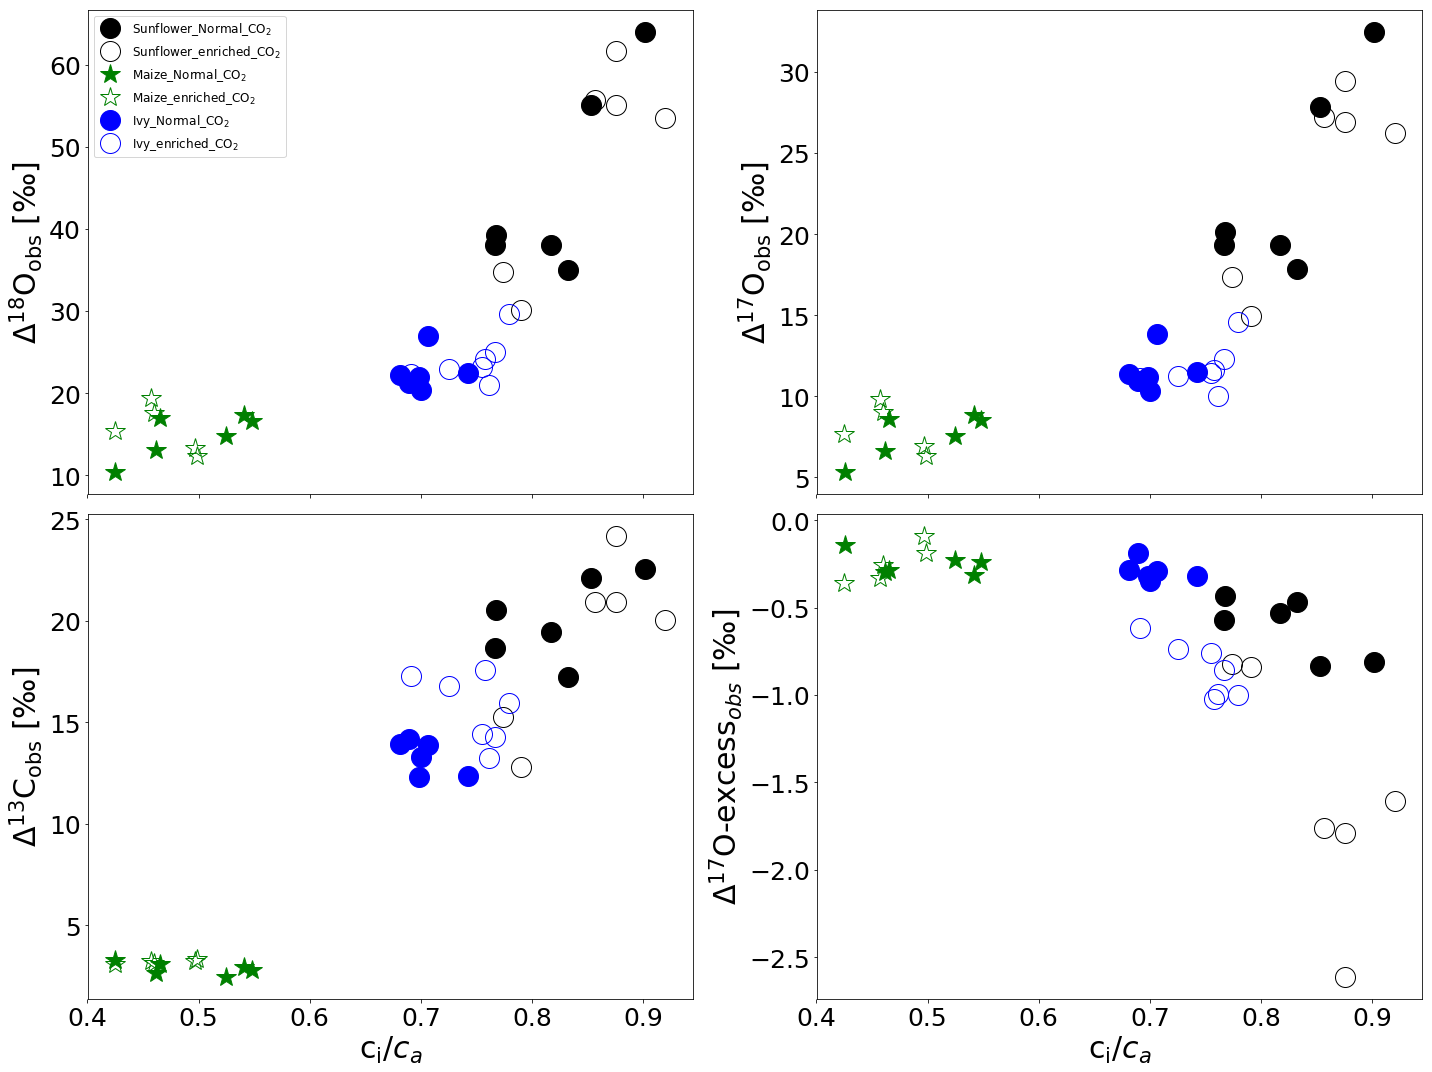

In [587]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,sharex=True, figsize=(20,15))
########highlight Maiz###


ax1.errorbar(Sunflower_Normal["Ci/Ca"],Sunflower_Normal["D18O_obs"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax1.errorbar(Sunflower_enriched["Ci/Ca"],Sunflower_enriched["D18O_obs"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax1.errorbar(Maize_Normal["Ci/Ca"],Maize_Normal["D18O_obs"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax1.errorbar(Maize_enriched["Ci/Ca"],Maize_enriched["D18O_obs"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")
ax1.errorbar(Ivy_Normal["Ci/Ca"],Ivy_Normal["D18O_obs"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax1.errorbar(Ivy_enriched["Ci/Ca"],Ivy_enriched["D18O_obs"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")







####sunflower#####
#ax1.errorbar(Sunflower_high["Ci/Ca"],Sunflower_high["D18O_obs"],marker="o",markersize=20,color="g",label="Sunflower_High light",ls="none")
#ax1.errorbar(Sunflower_low["Ci/Ca"],Sunflower_low["D18O_obs"],marker="o",markersize=20,color="y",label="Sunflower_Low light",ls="none")
ax1.legend(fontsize=12)
ax1.tick_params(labelsize=25)
ax1.set_ylabel("$\Delta^{18}\mathregular{O_{obs}}$ "+u"[\u2030]",fontsize=30)

#ax6=ax1.twinx()
#ax6.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["A"],ls="none")
ax2.errorbar(Sunflower_Normal["Ci/Ca"],Sunflower_Normal["D17O_obs"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax2.errorbar(Sunflower_enriched["Ci/Ca"],Sunflower_enriched["D17O_obs"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax2.errorbar(Maize_Normal["Ci/Ca"],Maize_Normal["D17O_obs"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax2.errorbar(Maize_enriched["Ci/Ca"],Maize_enriched["D17O_obs"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax2.errorbar(Ivy_Normal["Ci/Ca"],Ivy_Normal["D17O_obs"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax2.errorbar(Ivy_enriched["Ci/Ca"],Ivy_enriched["D17O_obs"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")

#######################
######################
#ax2.legend(fontsize=20)
ax2.tick_params(labelsize=25)
ax2.set_ylabel("$\Delta^{17}\mathregular{O_{obs}}$ "+u"[\u2030]",fontsize=30)
################################################
#################################################

ax3.errorbar(Sunflower_Normal["Ci/Ca"],Sunflower_Normal["D13C_obs"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax3.errorbar(Sunflower_enriched["Ci/Ca"],Sunflower_enriched["D13C_obs"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax3.errorbar(Maize_Normal["Ci/Ca"],Maize_Normal["D13C_obs"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax3.errorbar(Maize_enriched["Ci/Ca"],Maize_enriched["D13C_obs"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax3.errorbar(Ivy_Normal["Ci/Ca"],Ivy_Normal["D13C_obs"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax3.errorbar(Ivy_enriched["Ci/Ca"],Ivy_enriched["D13C_obs"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")


#ax3.legend(fontsize=20)
#ax3.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["D13C_obs"],marker="o",markersize=20,color="g",ls="none")
ax3.set_xlabel("$\mathregular{c_i}/{c_a}$",fontsize=30)
ax3.set_ylabel("$\Delta^{13}\mathregular{C_{obs}}$ "+u"[\u2030]",fontsize=30)
ax3.tick_params(labelsize=25)
ax3.tick_params(labelsize=25)

#####################
######################

ax4.errorbar(Sunflower_Normal["Ci/Ca"],Sunflower_Normal["D17O_excess_obs"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Sunflower_enriched["Ci/Ca"],Sunflower_enriched["D17O_excess_obs"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax4.errorbar(Maize_Normal["Ci/Ca"],Maize_Normal["D17O_excess_obs"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Maize_enriched["Ci/Ca"],Maize_enriched["D17O_excess_obs"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax4.errorbar(Ivy_Normal["Ci/Ca"],Ivy_Normal["D17O_excess_obs"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Ivy_enriched["Ci/Ca"],Ivy_enriched["D17O_excess_obs"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")
#ax4.errorba


######################

ax4.tick_params(labelsize=25)
ax4.tick_params(labelsize=25)
#ax4.legend(fontsize=20)
#ax5=ax4.twinx()
#ax5.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["A"],ls="none")
#ax4.set_ylim(-0.01,-500)
ax4.set_xlabel("$\mathregular{c_i}/{c_a}$",fontsize=30)
ax4.set_ylabel("$\Delta^{17}\mathregular{O}$"+"-"+"excess"+"$_{obs}$ "+u"[\u2030]",fontsize=30)

fig.tight_layout()
plt.savefig("/Users/getachew/surfdrive/Photosynthesis/Second_phase_Experiment/Photosynthesis paper/Discrimination_VS_Ci_Last.eps")
plt.show()





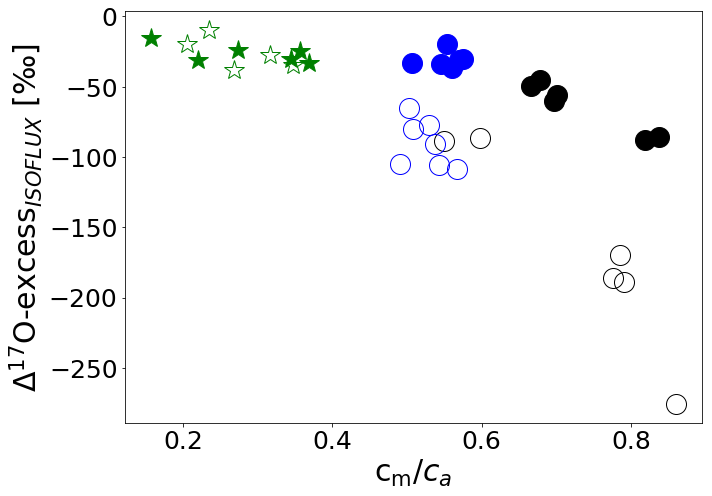

In [588]:
fig,ax4=plt.subplots(figsize=(10,7))

ax4.errorbar(Sunflower_Normal["cm_ca18"],Sunflower_Normal["D17O_excess_ISOFLUX"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Sunflower_enriched["cm_ca18"],Sunflower_enriched["D17O_excess_ISOFLUX"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax4.errorbar(Maize_Normal["cm_ca18"],Maize_Normal["D17O_excess_ISOFLUX"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Maize_enriched["cm_ca18"],Maize_enriched["D17O_excess_ISOFLUX"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax4.errorbar(Ivy_Normal["cm_ca18"],Ivy_Normal["D17O_excess_ISOFLUX"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Ivy_enriched["cm_ca18"],Ivy_enriched["D17O_excess_ISOFLUX"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")
#ax4.errorba


######################

ax4.tick_params(labelsize=25)
ax4.tick_params(labelsize=25)
#ax4.legend(fontsize=20)
#ax5=ax4.twinx()
#ax5.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["A"],ls="none")
#ax4.set_ylim(-0.01,-500)
ax4.set_xlabel("$\mathregular{c_m}/{c_a}$",fontsize=30)
ax4.set_ylabel("$\Delta^{17}\mathregular{O}$"+"-"+"excess"+"$_{ISOFLUX}$ "+u"[\u2030]",fontsize=30)

fig.tight_layout()
plt.savefig("/Users/getachew/surfdrive/Photosynthesis/Second_phase_Experiment/Photosynthesis paper/D17O_Excess_Isoflux.eps")
plt.show()

# A simplified equation for calculating $C_c$ of $C_4$ plants. 

## $$\Delta^{13}_{C_{4(plants)}}=a_s+[b_4+\phi(b_3-s)-a_s]\frac{c_i}{c_a}$$

In [589]:
## Paramters 
b_4=-5.7 # per mill 
phi_leakage=0.21 # per mill 
s=1.8 # per mill discrimination during leakage is taken to be that during dissolusion and diffusion of CO2 in liquid 
b_3=29 # per mill discrimination due to rubsico 

In [590]:
Simple_D13_C4=a_s+(b_4+phi_leakage*(b_3-s)-a_s)*((Gas_exchange["C_i"]*1000000)/(Photo_summary["CO2_o"]))

In [591]:
Simple_D13_C4

0     1.035255
1     0.814488
2     0.559125
3     1.033607
4     0.748861
5     0.657561
6     0.444201
7     0.362661
8     0.641411
9     0.557285
10    1.002672
11    0.931115
12    1.994893
13    2.097058
14    2.534194
15    2.212867
16    2.219149
17    2.374324
18    2.358439
19    2.024697
20    2.392214
21    2.383099
22    2.535074
23    1.409776
24    1.374210
25    1.327710
26    1.141738
27    1.337236
28    1.299309
29    1.368936
30    1.076789
31    1.219244
32    1.058633
33    1.086416
34    0.981197
35    1.036268
dtype: float64

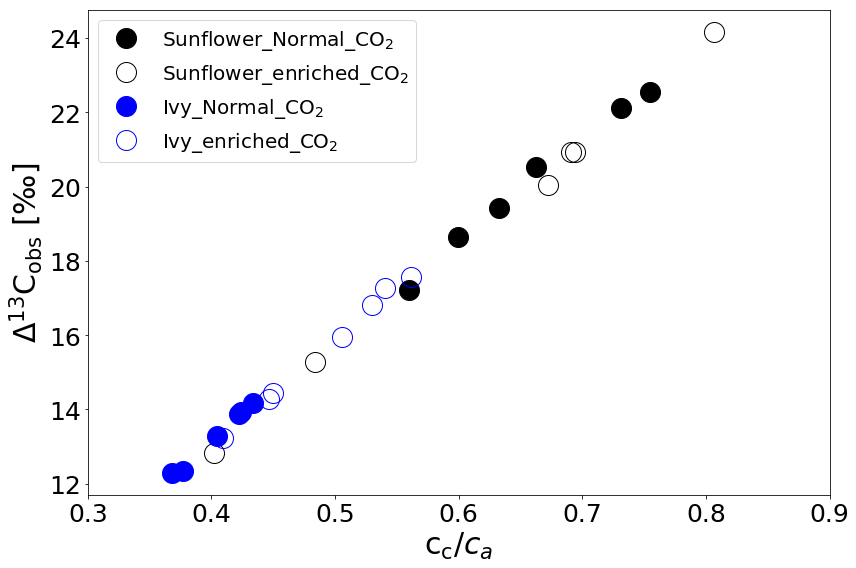

In [592]:
fig,ax3=plt.subplots(figsize=(12,8))
# ########highlight Maiz###

# ax1.errorbar(Sunflower_Normal["cc_ca"],Sunflower_Normal["D18O_obs"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
# ax1.errorbar(Sunflower_enriched["cc_ca"],Sunflower_enriched["D18O_obs"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

# ax1.errorbar(Maize_Normal["cc_ca"],Maize_Normal["D18O_obs"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
# ax1.errorbar(Maize_enriched["cc_ca"],Maize_enriched["D18O_obs"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

# ###################################
# #######Low light Maize
# ax1.errorbar(Ivy_Normal["cc_ca"],Ivy_Normal["D18O_obs"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
# ax1.errorbar(Ivy_enriched["cc_ca"],Ivy_enriched["D18O_obs"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")

# ax1.errorbar(Observed_discrimination["cc_ca"],Mesophyl_coductance["D18_cm"],color="r",marker="o",ls="none")




# ax1.legend(fontsize=20)
# ax1.tick_params(labelsize=25)
# ax1.set_ylabel("$\Delta^{18}\mathregular{O_{obs}}$ "+u"[\u2030]",fontsize=30)

# #ax6=ax1.twinx()
# #ax6.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["A"],ls="none")
# #ax4.set_ylim(-0.01,-500)
# #####maize####

# ax2.errorbar(Sunflower_Normal["cc_ca"],Sunflower_Normal["D17O_obs"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
# ax2.errorbar(Sunflower_enriched["Ci/Ca"],Sunflower_enriched["D17O_obs"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

# ax2.errorbar(Maize_Normal["cc_ca"],Maize_Normal["D17O_obs"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
# ax2.errorbar(Maize_enriched["cc_ca"],Maize_enriched["D17O_obs"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

# ###################################
# #######Low light Maize
# ax2.errorbar(Ivy_Normal["cc_ca"],Ivy_Normal["D17O_obs"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
# ax2.errorbar(Ivy_enriched["cc_ca"],Ivy_enriched["D17O_obs"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")

# #######################
# ax2.errorbar(Observed_discrimination["cc_ca"],Mesophyl_coductance["D17_cm"],color="r",marker="o",ls="none")
# ######################
# ax2.legend(fontsize=20)
# ax2.tick_params(labelsize=25)
# ax2.set_ylabel("$\Delta^{17}\mathregular{O_{obs}}$ "+u"[\u2030]",fontsize=30)
# ################################################
# #################################################


#######Low light Maize
ax3.errorbar(Sunflower_Normal["cc_ca"],Sunflower_Normal["D13C_obs"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax3.errorbar(Sunflower_enriched["cc_ca"],Sunflower_enriched["D13C_obs"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

# ax3.errorbar(Maize_Normal["cc_ca"],Maize_Normal["D13C_obs"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
# ax3.errorbar(Maize_enriched["cc_ca"],Maize_enriched["D13C_obs"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax3.errorbar(Ivy_Normal["cc_ca"],Ivy_Normal["D13C_obs"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax3.errorbar(Ivy_enriched["cc_ca"],Ivy_enriched["D13C_obs"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")

#ax3.errorbar(Observed_discrimination["cc_ca"],Mesophyl_coductance["D13_OBC"],color="r",marker="o",ls="none")

ax3.set_xlim(0.3,0.9)
ax3.legend(fontsize=20)
#ax3.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["D13C_obs"],marker="o",markersize=20,color="g",ls="none")
ax3.set_xlabel("$\mathregular{c_c}/{c_a}$",fontsize=30)
ax3.set_ylabel("$\Delta^{13}\mathregular{C_{obs}}$ "+u"[\u2030]",fontsize=30)
ax3.tick_params(labelsize=25)
ax3.tick_params(labelsize=25)

#####################
######################

# ax4.errorbar(Sunflower_Normal["cc_ca"],Sunflower_Normal["D17O_excess_obs"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
# ax4.errorbar(Sunflower_enriched["cc_ca"],Sunflower_enriched["D17O_excess_obs"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

# ax4.errorbar(Maize_Normal["cc_ca"],Maize_Normal["D17O_excess_obs"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
# ax4.errorbar(Maize_enriched["cc_ca"],Maize_enriched["D17O_excess_obs"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

# ###################################
# #######Low light Maize
# ax4.errorbar(Ivy_Normal["cc_ca"],Ivy_Normal["D17O_excess_obs"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
# ax4.errorbar(Ivy_enriched["cc_ca"],Ivy_enriched["D17O_excess_obs"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")
# ax4.errorbar(Observed_discrimination["cm_ca18"],Mesophyl_coductance["DD17_cm"],color="r",marker="o",ls="none")

# ######################

# ax4.tick_params(labelsize=25)
# ax4.tick_params(labelsize=25)
# ax4.legend(fontsize=20)
# #ax5=ax4.twinx()
# #ax5.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["A"],ls="none")
# #ax4.set_ylim(-0.01,-500)
# ax4.set_xlabel("$\mathregular{c_c}/{c_a}$",fontsize=30)
# ax4.set_ylabel("$\Delta^{17}\mathregular{O}$"+"-"+"excess"+"$_{obs}$ "+u"[\u2030]",fontsize=30)

fig.tight_layout()
plt.savefig("/Users/getachew/surfdrive/Photosynthesis/Second_phase_Experiment/Photosynthesis paper/C3_only_D13C.eps")
plt.show()








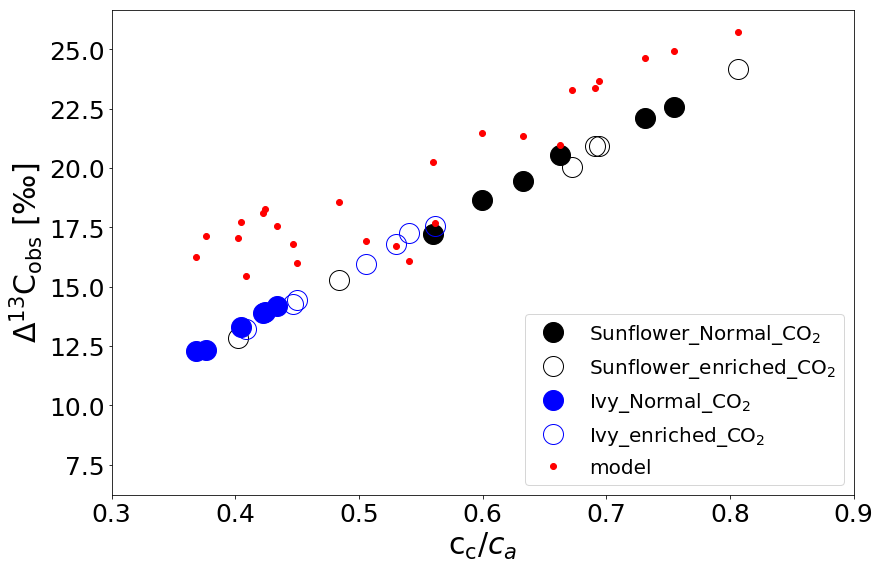

In [593]:
fig,ax3=plt.subplots(figsize=(12,8))
# ########highlight Maiz###

# ax1.errorbar(Sunflower_Normal["cc_ca"],Sunflower_Normal["D18O_obs"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
# ax1.errorbar(Sunflower_enriched["cc_ca"],Sunflower_enriched["D18O_obs"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

# ax1.errorbar(Maize_Normal["cc_ca"],Maize_Normal["D18O_obs"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
# ax1.errorbar(Maize_enriched["cc_ca"],Maize_enriched["D18O_obs"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

# ###################################
# #######Low light Maize
# ax1.errorbar(Ivy_Normal["cc_ca"],Ivy_Normal["D18O_obs"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
# ax1.errorbar(Ivy_enriched["cc_ca"],Ivy_enriched["D18O_obs"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")

# ax1.errorbar(Observed_discrimination["cc_ca"],Mesophyl_coductance["D18_cm"],color="r",marker="o",ls="none")




# ax1.legend(fontsize=20)
# ax1.tick_params(labelsize=25)
# ax1.set_ylabel("$\Delta^{18}\mathregular{O_{obs}}$ "+u"[\u2030]",fontsize=30)

# #ax6=ax1.twinx()
# #ax6.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["A"],ls="none")
# #ax4.set_ylim(-0.01,-500)
# #####maize####

# ax2.errorbar(Sunflower_Normal["cc_ca"],Sunflower_Normal["D17O_obs"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
# ax2.errorbar(Sunflower_enriched["Ci/Ca"],Sunflower_enriched["D17O_obs"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

# ax2.errorbar(Maize_Normal["cc_ca"],Maize_Normal["D17O_obs"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
# ax2.errorbar(Maize_enriched["cc_ca"],Maize_enriched["D17O_obs"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

# ###################################
# #######Low light Maize
# ax2.errorbar(Ivy_Normal["cc_ca"],Ivy_Normal["D17O_obs"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
# ax2.errorbar(Ivy_enriched["cc_ca"],Ivy_enriched["D17O_obs"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")

# #######################
# ax2.errorbar(Observed_discrimination["cc_ca"],Mesophyl_coductance["D17_cm"],color="r",marker="o",ls="none")
# ######################
# ax2.legend(fontsize=20)
# ax2.tick_params(labelsize=25)
# ax2.set_ylabel("$\Delta^{17}\mathregular{O_{obs}}$ "+u"[\u2030]",fontsize=30)
# ################################################
# #################################################


#######Low light Maize
ax3.errorbar(Sunflower_Normal["cc_ca"],Sunflower_Normal["D13C_obs"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax3.errorbar(Sunflower_enriched["cc_ca"],Sunflower_enriched["D13C_obs"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

# ax3.errorbar(Maize_Normal["cc_ca"],Maize_Normal["D13C_obs"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
# ax3.errorbar(Maize_enriched["cc_ca"],Maize_enriched["D13C_obs"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax3.errorbar(Ivy_Normal["cc_ca"],Ivy_Normal["D13C_obs"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax3.errorbar(Ivy_enriched["cc_ca"],Ivy_enriched["D13C_obs"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")

ax3.errorbar(Observed_discrimination["cc_ca"],Mesophyl_coductance["D13_OBC"],color="r",marker="o",ls="none",label="model")

ax3.set_xlim(0.3,0.9)
ax3.legend(fontsize=20)
#ax3.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["D13C_obs"],marker="o",markersize=20,color="g",ls="none")
ax3.set_xlabel("$\mathregular{c_c}/{c_a}$",fontsize=30)
ax3.set_ylabel("$\Delta^{13}\mathregular{C_{obs}}$ "+u"[\u2030]",fontsize=30)
ax3.tick_params(labelsize=25)
ax3.tick_params(labelsize=25)

#####################
######################

# ax4.errorbar(Sunflower_Normal["cc_ca"],Sunflower_Normal["D17O_excess_obs"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
# ax4.errorbar(Sunflower_enriched["cc_ca"],Sunflower_enriched["D17O_excess_obs"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

# ax4.errorbar(Maize_Normal["cc_ca"],Maize_Normal["D17O_excess_obs"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
# ax4.errorbar(Maize_enriched["cc_ca"],Maize_enriched["D17O_excess_obs"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

# ###################################
# #######Low light Maize
# ax4.errorbar(Ivy_Normal["cc_ca"],Ivy_Normal["D17O_excess_obs"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
# ax4.errorbar(Ivy_enriched["cc_ca"],Ivy_enriched["D17O_excess_obs"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")
# ax4.errorbar(Observed_discrimination["cm_ca18"],Mesophyl_coductance["DD17_cm"],color="r",marker="o",ls="none")

# ######################

# ax4.tick_params(labelsize=25)
# ax4.tick_params(labelsize=25)
# ax4.legend(fontsize=20)
# #ax5=ax4.twinx()
# #ax5.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["A"],ls="none")
# #ax4.set_ylim(-0.01,-500)
# ax4.set_xlabel("$\mathregular{c_c}/{c_a}$",fontsize=30)
# ax4.set_ylabel("$\Delta^{17}\mathregular{O}$"+"-"+"excess"+"$_{obs}$ "+u"[\u2030]",fontsize=30)

fig.tight_layout()
plt.savefig("/Users/getachew/surfdrive/Photosynthesis/Second_phase_Experiment/Photosynthesis paper/C3_only_D13C_with_model.eps")
plt.show()









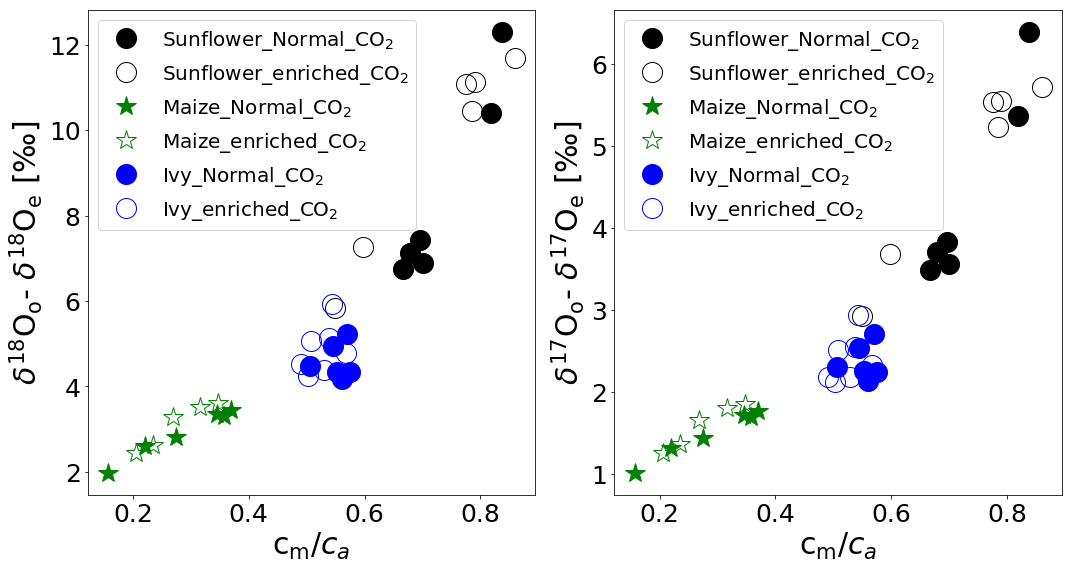

In [594]:
fig,(ax1,ax2)=plt.subplots(1,2,sharex=True, figsize=(15,8))
########highlight Maiz###

ax1.errorbar(Sunflower_Normal["cm_ca18"],Sunflower_Normal["d_d18O"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax1.errorbar(Sunflower_enriched["cm_ca18"],Sunflower_enriched["d_d18O"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax1.errorbar(Maize_Normal["cm_ca18"],Maize_Normal["d_d18O"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax1.errorbar(Maize_enriched["cm_ca18"],Maize_enriched["d_d18O"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax1.errorbar(Ivy_Normal["cm_ca18"],Ivy_Normal["d_d18O"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax1.errorbar(Ivy_enriched["cm_ca18"],Ivy_enriched["d_d18O"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")

#ax1.errorbar(Observed_discrimination["cm_ca17"],Mesophyl_coductance["D18_cm"],color="r",marker="o",ls="none")
ax1.set_xlabel("$\mathregular{c_m}/{c_a}$",fontsize=30)
ax1.legend(fontsize=20)
ax1.tick_params(labelsize=25)
ax1.set_ylabel("$\delta^{18}\mathregular{O_{o}}$"+ "-"+" $\delta^{18}\mathregular{O_{e}}$ "+u"[\u2030]",fontsize=30)

#ax6=ax1.twinx()
#ax6.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["A"],ls="none")
#ax4.set_ylim(-0.01,-500)
#####maize####

ax2.errorbar(Sunflower_Normal["cm_ca18"],Sunflower_Normal["d_d17O"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax2.errorbar(Sunflower_enriched["cm_ca18"],Sunflower_enriched["d_d17O"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax2.errorbar(Maize_Normal["cm_ca18"],Maize_Normal["d_d17O"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax2.errorbar(Maize_enriched["cm_ca18"],Maize_enriched["d_d17O"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax2.errorbar(Ivy_Normal["cm_ca18"],Ivy_Normal["d_d17O"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax2.errorbar(Ivy_enriched["cm_ca18"],Ivy_enriched["d_d17O"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")

#######################
#ax2.errorbar(Observed_discrimination["cm_ca17"],Mesophyl_coductance["D17_cm"],color="r",marker="o",ls="none")
######################
ax2.set_xlabel("$\mathregular{c_m}/{c_a}$",fontsize=30)
ax2.legend(fontsize=20)
ax2.tick_params(labelsize=25)
ax2.set_ylabel("$\delta^{17}\mathregular{O_{o}}$"+ "-"+" $\delta^{17}\mathregular{O_{e}}$ "+u"[\u2030]",fontsize=30)
################################################
#################################################


# #######Low light Maize
# ax3.errorbar(Sunflower_Normal["cm_ca17"],Sunflower_Normal["d_d13C"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
# ax3.errorbar(Sunflower_enriched["cm_ca17"],Sunflower_enriched["d_d13C"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

# ax3.errorbar(Maize_Normal["cm_ca17"],Maize_Normal["d_d13C"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
# ax3.errorbar(Maize_enriched["cm_ca17"],Maize_enriched["d_d13C"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

# ###################################
# #######Low light Maize
# ax3.errorbar(Ivy_Normal["cm_ca17"],Ivy_Normal["d_d13C"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
# ax3.errorbar(Ivy_enriched["cm_ca17"],Ivy_enriched["d_d13C"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")

# #ax3.errorbar(Observed_discrimination["cm_ca17"],Mesophyl_coductance["D13_OBC"],color="r",marker="o",ls="none")

# ax3.legend(fontsize=20)
# #ax3.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["D13C_obs"],marker="o",markersize=20,color="g",ls="none")
# ax3.set_xlabel("$\mathregular{c_m}/{c_a}$",fontsize=30)
# ax3.set_ylabel("$\delta^{13}\mathregular{C_{o}}$"+ "-"+" $\delta^{13}\mathregular{C_{e}}$ "+u"[\u2030]",fontsize=30)
# ax3.tick_params(labelsize=25)
# ax3.tick_params(labelsize=25)

# #####################
# ######################

# ax4.errorbar(Sunflower_Normal["cm_ca17"],Sunflower_Normal["D_D17O"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
# ax4.errorbar(Sunflower_enriched["cm_ca17"],Sunflower_enriched["D_D17O"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

# ax4.errorbar(Maize_Normal["cm_ca17"],Maize_Normal["D_D17O"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
# ax4.errorbar(Maize_enriched["cm_ca17"],Maize_enriched["D_D17O"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

# ###################################
# #######Low light Maize
# ax4.errorbar(Ivy_Normal["cm_ca17"],Ivy_Normal["D_D17O"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
# ax4.errorbar(Ivy_enriched["cm_ca17"],Ivy_enriched["D_D17O"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")
# #ax4.errorbar(Observed_discrimination["cm_ca17"],Mesophyl_coductance["DD17_cm"],color="r",marker="o",ls="none")

# ######################

# ax4.tick_params(labelsize=25)
# ax4.tick_params(labelsize=25)
# ax4.legend(fontsize=20)
# #ax5=ax4.twinx()
# #ax5.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["A"],ls="none")
# #ax4.set_ylim(-0.01,-500)
# ax4.set_xlabel("$\mathregular{c_m}/{c_a}$",fontsize=30)
# ax4.set_ylabel("$^{17}\mathregular{O}$"+"-"+"excess"+"$_{o}$"+" -"+" $^{17}\mathregular{O}$"+"-"+"excess"+"$_{e}$ "+u"[\u2030]",fontsize=30)

fig.tight_layout()
plt.savefig("/Users/getachew/surfdrive/Photosynthesis/Second_phase_Experiment/Photosynthesis paper/Difference_Only_18O.eps")
plt.show()











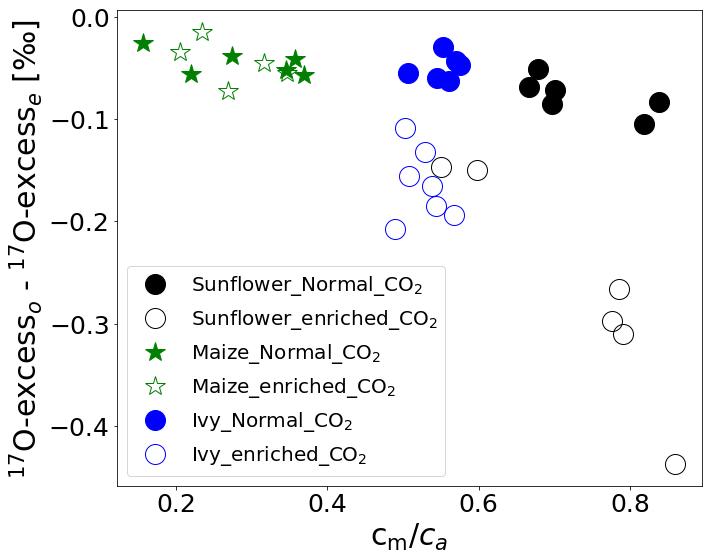

In [595]:
fig,ax4=plt.subplots(figsize=(10,8))
########highlight Maiz###

# ax1.errorbar(Sunflower_Normal["cm_ca18"],Sunflower_Normal["d_d18O"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
# ax1.errorbar(Sunflower_enriched["cm_ca18"],Sunflower_enriched["d_d18O"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

# ax1.errorbar(Maize_Normal["cm_ca18"],Maize_Normal["d_d18O"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
# ax1.errorbar(Maize_enriched["cm_ca18"],Maize_enriched["d_d18O"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

# ###################################
# #######Low light Maize
# ax1.errorbar(Ivy_Normal["cm_ca18"],Ivy_Normal["d_d18O"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
# ax1.errorbar(Ivy_enriched["cm_ca18"],Ivy_enriched["d_d18O"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")

# #ax1.errorbar(Observed_discrimination["cm_ca17"],Mesophyl_coductance["D18_cm"],color="r",marker="o",ls="none")

# ax1.legend(fontsize=20)
# ax1.tick_params(labelsize=25)
# ax1.set_ylabel("$\delta^{18}\mathregular{O_{o}}$"+ "-"+" $\delta^{18}\mathregular{O_{e}}$ "+u"[\u2030]",fontsize=30)

# #ax6=ax1.twinx()
# #ax6.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["A"],ls="none")
#ax4.set_ylim(-0.01,-500)
#####maize####

# ax2.errorbar(Sunflower_Normal["cm_ca18"],Sunflower_Normal["d_d17O"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
# ax2.errorbar(Sunflower_enriched["cm_ca18"],Sunflower_enriched["d_d17O"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

# ax2.errorbar(Maize_Normal["cm_ca18"],Maize_Normal["d_d17O"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
# ax2.errorbar(Maize_enriched["cm_ca18"],Maize_enriched["d_d17O"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

# ###################################
# #######Low light Maize
# ax2.errorbar(Ivy_Normal["cm_ca18"],Ivy_Normal["d_d17O"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
# ax2.errorbar(Ivy_enriched["cm_ca18"],Ivy_enriched["d_d17O"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")

# #######################
# #ax2.errorbar(Observed_discrimination["cm_ca17"],Mesophyl_coductance["D17_cm"],color="r",marker="o",ls="none")
# ######################
# ax2.legend(fontsize=20)
# ax2.tick_params(labelsize=25)
# ax2.set_ylabel("$\delta^{17}\mathregular{O_{o}}$"+ "-"+" $\delta^{17}\mathregular{O_{e}}$ "+u"[\u2030]",fontsize=30)
# ################################################
# #################################################


# #######Low light Maize
# ax3.errorbar(Sunflower_Normal["cm_ca17"],Sunflower_Normal["d_d13C"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
# ax3.errorbar(Sunflower_enriched["cm_ca17"],Sunflower_enriched["d_d13C"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

# ax3.errorbar(Maize_Normal["cm_ca17"],Maize_Normal["d_d13C"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
# ax3.errorbar(Maize_enriched["cm_ca17"],Maize_enriched["d_d13C"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

# ###################################
# #######Low light Maize
# ax3.errorbar(Ivy_Normal["cm_ca17"],Ivy_Normal["d_d13C"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
# ax3.errorbar(Ivy_enriched["cm_ca17"],Ivy_enriched["d_d13C"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")

# #ax3.errorbar(Observed_discrimination["cm_ca17"],Mesophyl_coductance["D13_OBC"],color="r",marker="o",ls="none")

# ax3.legend(fontsize=20)
# #ax3.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["D13C_obs"],marker="o",markersize=20,color="g",ls="none")
# ax3.set_xlabel("$\mathregular{c_m}/{c_a}$",fontsize=30)
# ax3.set_ylabel("$\delta^{13}\mathregular{C_{o}}$"+ "-"+" $\delta^{13}\mathregular{C_{e}}$ "+u"[\u2030]",fontsize=30)
# ax3.tick_params(labelsize=25)
# ax3.tick_params(labelsize=25)

# #####################
# ######################

ax4.errorbar(Sunflower_Normal["cm_ca18"],Sunflower_Normal["D_D17O"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Sunflower_enriched["cm_ca18"],Sunflower_enriched["D_D17O"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax4.errorbar(Maize_Normal["cm_ca18"],Maize_Normal["D_D17O"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Maize_enriched["cm_ca18"],Maize_enriched["D_D17O"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax4.errorbar(Ivy_Normal["cm_ca18"],Ivy_Normal["D_D17O"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Ivy_enriched["cm_ca18"],Ivy_enriched["D_D17O"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")
#ax4.errorbar(Observed_discrimination["cm_ca18"],Mesophyl_coductance["DD17_cm"],color="r",marker="o",ls="none")

######################

ax4.tick_params(labelsize=25)
ax4.tick_params(labelsize=25)
ax4.legend(fontsize=20)
#ax5=ax4.twinx()
#ax5.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["A"],ls="none")
#ax4.set_ylim(-0.01,-500)
ax4.set_xlabel("$\mathregular{c_m}/{c_a}$",fontsize=30)
ax4.set_ylabel("$^{17}\mathregular{O}$"+"-"+"excess"+"$_{o}$"+" -"+" $^{17}\mathregular{O}$"+"-"+"excess"+"$_{e}$ "+u"[\u2030]",fontsize=30)

fig.tight_layout()
plt.savefig("/Users/getachew/surfdrive/Photosynthesis/Second_phase_Experiment/Photosynthesis paper/Difference_Only_Excess17O.eps")
plt.show()












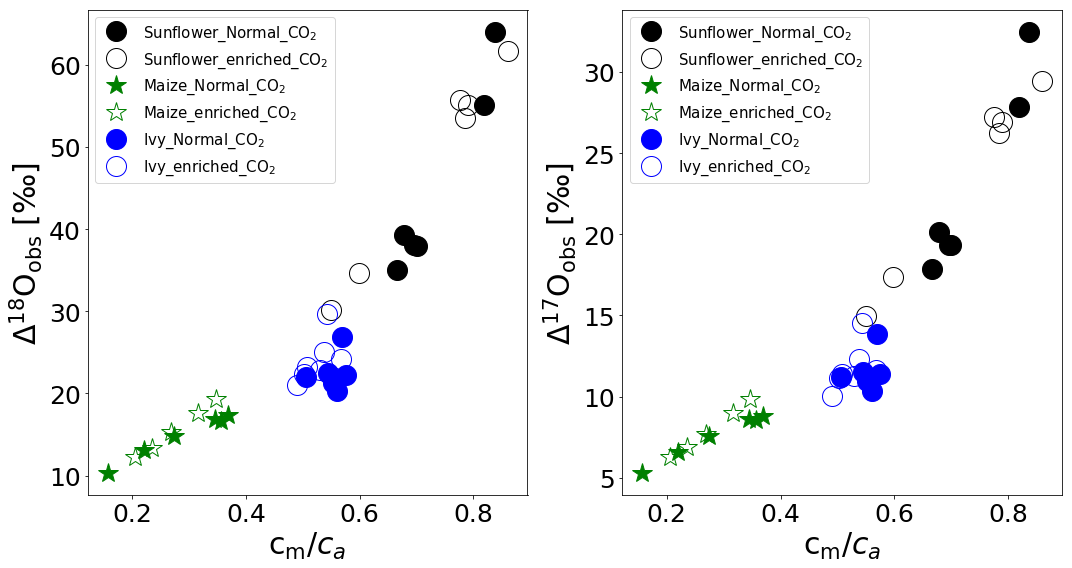

In [596]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,8))
########highlight Maiz###

ax1.errorbar(Sunflower_Normal["cm_ca18"],Sunflower_Normal["D18O_obs"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax1.errorbar(Sunflower_enriched["cm_ca18"],Sunflower_enriched["D18O_obs"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax1.errorbar(Maize_Normal["cm_ca18"],Maize_Normal["D18O_obs"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax1.errorbar(Maize_enriched["cm_ca18"],Maize_enriched["D18O_obs"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax1.errorbar(Ivy_Normal["cm_ca18"],Ivy_Normal["D18O_obs"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax1.errorbar(Ivy_enriched["cm_ca18"],Ivy_enriched["D18O_obs"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")

#ax1.errorbar(Observed_discrimination["cm_ca17"],Mesophyl_coductance["D18_cm"],color="r",marker="o",ls="none")
ax1.set_xlabel("$\mathregular{c_m}/{c_a}$",fontsize=30)
ax1.legend(fontsize=15)
ax1.tick_params(labelsize=25)
ax1.set_ylabel("$\Delta^{18}\mathregular{O_{obs}}$ "+u"[\u2030]",fontsize=30)

#ax6=ax1.twinx()
#ax6.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["A"],ls="none")
#ax4.set_ylim(-0.01,-500)
#####maize####

ax2.errorbar(Sunflower_Normal["cm_ca18"],Sunflower_Normal["D17O_obs"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax2.errorbar(Sunflower_enriched["cm_ca18"],Sunflower_enriched["D17O_obs"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax2.errorbar(Maize_Normal["cm_ca18"],Maize_Normal["D17O_obs"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax2.errorbar(Maize_enriched["cm_ca18"],Maize_enriched["D17O_obs"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax2.errorbar(Ivy_Normal["cm_ca18"],Ivy_Normal["D17O_obs"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax2.errorbar(Ivy_enriched["cm_ca18"],Ivy_enriched["D17O_obs"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")

#######################
#ax2.errorbar(Observed_discrimination["cm_ca17"],Mesophyl_coductance["D17_cm"],color="r",marker="o",ls="none")
######################
ax2.set_xlabel("$\mathregular{c_m}/{c_a}$",fontsize=30)
ax2.legend(fontsize=15)
ax2.tick_params(labelsize=25)
ax2.set_ylabel("$\Delta^{17}\mathregular{O_{obs}}$ "+u"[\u2030]",fontsize=30)
################################################
#################################################


fig.tight_layout()
plt.savefig("/Users/getachew/surfdrive/Photosynthesis/Second_phase_Experiment/Photosynthesis paper/Discrimination_17_and_18.eps")
plt.show()










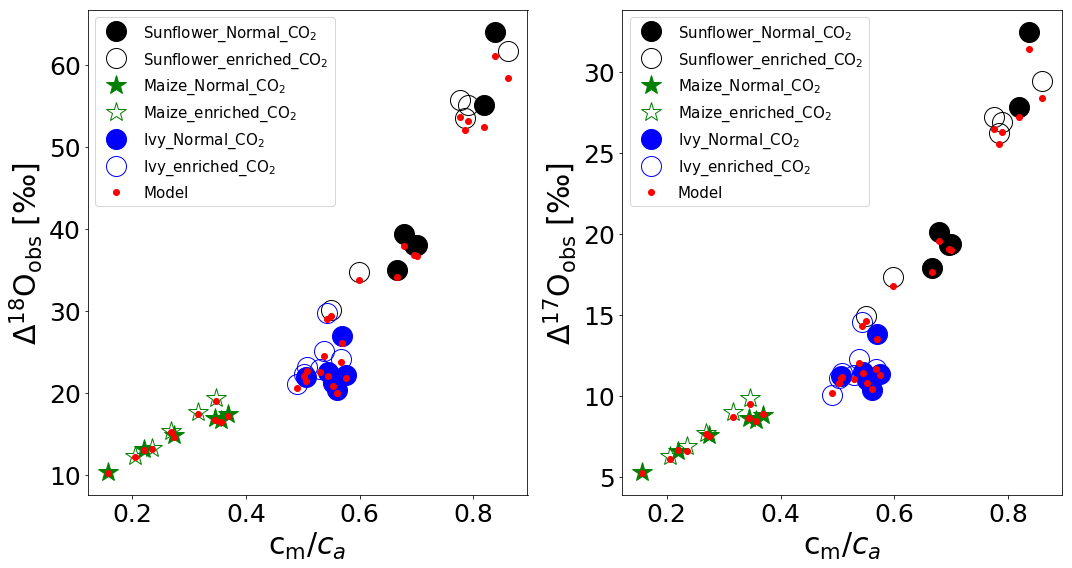

In [474]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,8))
########highlight Maiz###

ax1.errorbar(Sunflower_Normal["cm_ca18"],Sunflower_Normal["D18O_obs"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax1.errorbar(Sunflower_enriched["cm_ca18"],Sunflower_enriched["D18O_obs"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax1.errorbar(Maize_Normal["cm_ca18"],Maize_Normal["D18O_obs"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax1.errorbar(Maize_enriched["cm_ca18"],Maize_enriched["D18O_obs"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax1.errorbar(Ivy_Normal["cm_ca18"],Ivy_Normal["D18O_obs"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax1.errorbar(Ivy_enriched["cm_ca18"],Ivy_enriched["D18O_obs"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")

ax1.errorbar(Observed_discrimination["cm_ca18"],Mesophyl_coductance["D18_cm"],color="r",marker="o",ls="none",label="Model")
ax1.set_xlabel("$\mathregular{c_m}/{c_a}$",fontsize=30)
ax1.legend(fontsize=15)
ax1.tick_params(labelsize=25)
ax1.set_ylabel("$\Delta^{18}\mathregular{O_{obs}}$ "+u"[\u2030]",fontsize=30)

#ax6=ax1.twinx()
#ax6.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["A"],ls="none")
#ax4.set_ylim(-0.01,-500)
#####maize####

ax2.errorbar(Sunflower_Normal["cm_ca18"],Sunflower_Normal["D17O_obs"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax2.errorbar(Sunflower_enriched["cm_ca18"],Sunflower_enriched["D17O_obs"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax2.errorbar(Maize_Normal["cm_ca18"],Maize_Normal["D17O_obs"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax2.errorbar(Maize_enriched["cm_ca18"],Maize_enriched["D17O_obs"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax2.errorbar(Ivy_Normal["cm_ca18"],Ivy_Normal["D17O_obs"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax2.errorbar(Ivy_enriched["cm_ca18"],Ivy_enriched["D17O_obs"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")

#######################
ax2.errorbar(Observed_discrimination["cm_ca18"],Mesophyl_coductance["D17_cm"],color="r",marker="o",ls="none",label="Model")
######################
ax2.set_xlabel("$\mathregular{c_m}/{c_a}$",fontsize=30)
ax2.legend(fontsize=15)
ax2.tick_params(labelsize=25)
ax2.set_ylabel("$\Delta^{17}\mathregular{O_{obs}}$ "+u"[\u2030]",fontsize=30)
################################################
#################################################


# #######Low light Maize
# ax3.errorbar(Sunflower_Normal["cm_ca17"],Sunflower_Normal["D13C_obs"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
# ax3.errorbar(Sunflower_enriched["cm_ca17"],Sunflower_enriched["D13C_obs"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

# ax3.errorbar(Maize_Normal["cm_ca17"],Maize_Normal["D13C_obs"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
# ax3.errorbar(Maize_enriched["cm_ca17"],Maize_enriched["D13C_obs"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

# ###################################
# #######Low light Maize
# ax3.errorbar(Ivy_Normal["cm_ca17"],Ivy_Normal["D13C_obs"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
# ax3.errorbar(Ivy_enriched["cm_ca17"],Ivy_enriched["D13C_obs"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")

# ax3.errorbar(Observed_discrimination["cm_ca17"],Mesophyl_coductance["D13_OBC"],color="r",marker="o",ls="none")

# ax3.legend(fontsize=20)
# #ax3.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["D13C_obs"],marker="o",markersize=20,color="g",ls="none")
# ax3.set_xlabel("$\mathregular{c_m}/{c_a}$",fontsize=30)
# ax3.set_ylabel("$\Delta^{13}\mathregular{C_{obs}}$ "+u"[\u2030]",fontsize=30)
# ax3.tick_params(labelsize=25)
# ax3.tick_params(labelsize=25)

# #####################
# ######################

# ax4.errorbar(Sunflower_Normal["cm_ca17"],Sunflower_Normal["D17O_excess_obs"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
# ax4.errorbar(Sunflower_enriched["cm_ca17"],Sunflower_enriched["D17O_excess_obs"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

# ax4.errorbar(Maize_Normal["cm_ca17"],Maize_Normal["D17O_excess_obs"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
# ax4.errorbar(Maize_enriched["cm_ca17"],Maize_enriched["D17O_excess_obs"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

# ###################################
# #######Low light Maize
# ax4.errorbar(Ivy_Normal["cm_ca17"],Ivy_Normal["D17O_excess_obs"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
# ax4.errorbar(Ivy_enriched["cm_ca17"],Ivy_enriched["D17O_excess_obs"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")
# ax4.errorbar(Observed_discrimination["cm_ca17"],Mesophyl_coductance["DD17_cm"],color="r",marker="o",ls="none")

# ######################

# ax4.tick_params(labelsize=25)
# ax4.tick_params(labelsize=25)
# ax4.legend(fontsize=20)
# #ax5=ax4.twinx()
# #ax5.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["A"],ls="none")
# #ax4.set_ylim(-0.01,-500)
# ax4.set_xlabel("$\mathregular{c_m}/{c_a}$",fontsize=30)
# ax4.set_ylabel("$\Delta^{17}\mathregular{O}$"+"-"+"excess"+"$_{obs}$ "+u"[\u2030]",fontsize=30)

fig.tight_layout()
plt.savefig("/Users/getachew/surfdrive/Photosynthesis/Second_phase_Experiment/Photosynthesis paper/Discrimination_17_and_18_modelled.eps")
plt.show()











# Modelled vs observed discrimination

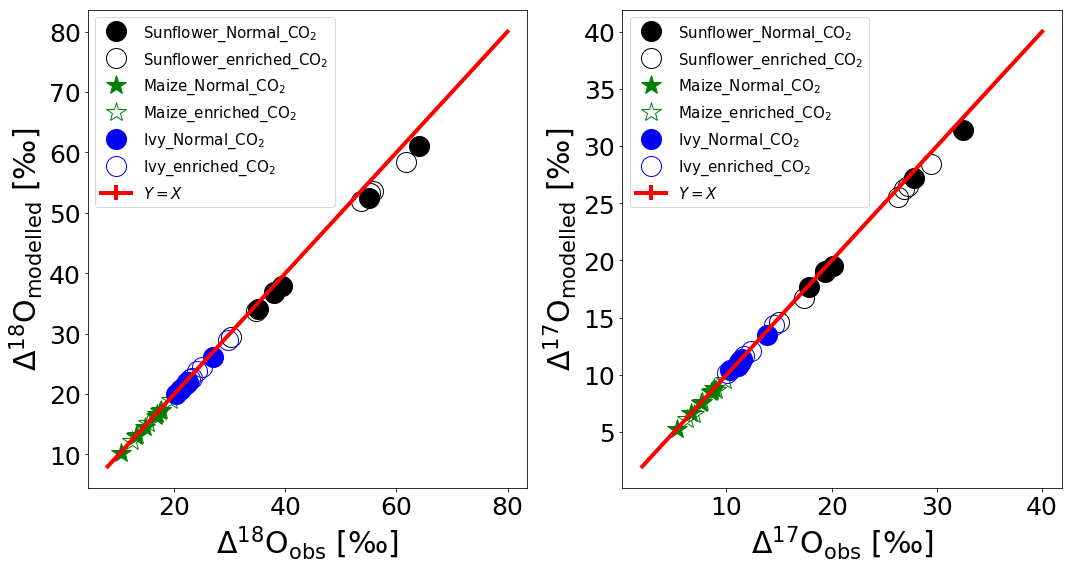

In [475]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,8))
########highlight Maiz###

ax1.errorbar(Sunflower_Normal["D18O_obs"],Sunflower_Normal["d18_modelled"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")


ax1.errorbar(Sunflower_enriched["D18O_obs"],Sunflower_enriched["d18_modelled"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax1.errorbar(Maize_Normal["D18O_obs"],Maize_Normal["d18_modelled"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax1.errorbar(Maize_enriched["D18O_obs"],Maize_enriched["d18_modelled"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax1.errorbar(Ivy_Normal["D18O_obs"],Ivy_Normal["d18_modelled"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax1.errorbar(Ivy_enriched["D18O_obs"],Ivy_enriched["d18_modelled"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")

#ax1.errorbar(Observed_discrimination["cm_ca18"],Mesophyl_coductance["D18_cm"],color="r",marker="o",ls="none",label="Model")
ax1.set_xlabel("$\Delta^{18}\mathregular{O_{obs}}$ "+u"[\u2030]",fontsize=30)

ax1.set_ylabel("$\Delta^{18}\mathregular{O_{modelled}}$ "+u"[\u2030]",fontsize=30)

########################
#######################
#####Fitting y=X line
aa=np.linspace(8, 80, num=80)
ax1.errorbar(aa,aa,yerr=0,color="r",linewidth=4,label="$Y=X$")
################################################
#################################################
ax1.legend(fontsize=15)
ax1.tick_params(labelsize=25)
#ax6=ax1.twinx()
#ax6.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["A"],ls="none")
#ax4.set_ylim(-0.01,-500)
#####maize####


#################################
################################
##############################
ax2.errorbar(Sunflower_Normal["D17O_obs"],Sunflower_Normal["d17_modelled"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax2.errorbar(Sunflower_enriched["D17O_obs"],Sunflower_enriched["d17_modelled"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax2.errorbar(Maize_Normal["D17O_obs"],Maize_Normal["d17_modelled"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax2.errorbar(Maize_enriched["D17O_obs"],Maize_enriched["d17_modelled"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax2.errorbar(Ivy_Normal["D17O_obs"],Ivy_Normal["d17_modelled"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax2.errorbar(Ivy_enriched["D17O_obs"],Ivy_enriched["d17_modelled"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")

#######################
#ax2.errorbar(Mesophyl_coductance["D17_cm"],Mesophyl_coductance["D17_cm"],color="r",marker="o",ls="none",label="Model")
######################
ax2.set_xlabel("$\Delta^{17}\mathregular{O_{obs}}$ "+u"[\u2030]",fontsize=30)
ax2.legend(fontsize=15)
ax2.tick_params(labelsize=25)
ax2.set_ylabel("$\Delta^{17}\mathregular{O_{modelled}}$ "+u"[\u2030]",fontsize=30)
######
########################
#######################
#####Fitting y=X line
a=np.linspace(2.0, 40, num=80)
ax2.errorbar(a,a,yerr=0,color="r",linewidth=4,label="$Y=X$")
################################################
#################################################

ax2.legend(fontsize=15)
ax2.tick_params(labelsize=25)

fig.tight_layout()
plt.savefig("/Users/getachew/surfdrive/Photosynthesis/Second_phase_Experiment/Photosynthesis paper/Modelled_vs_Obsreved.eps")
plt.show()












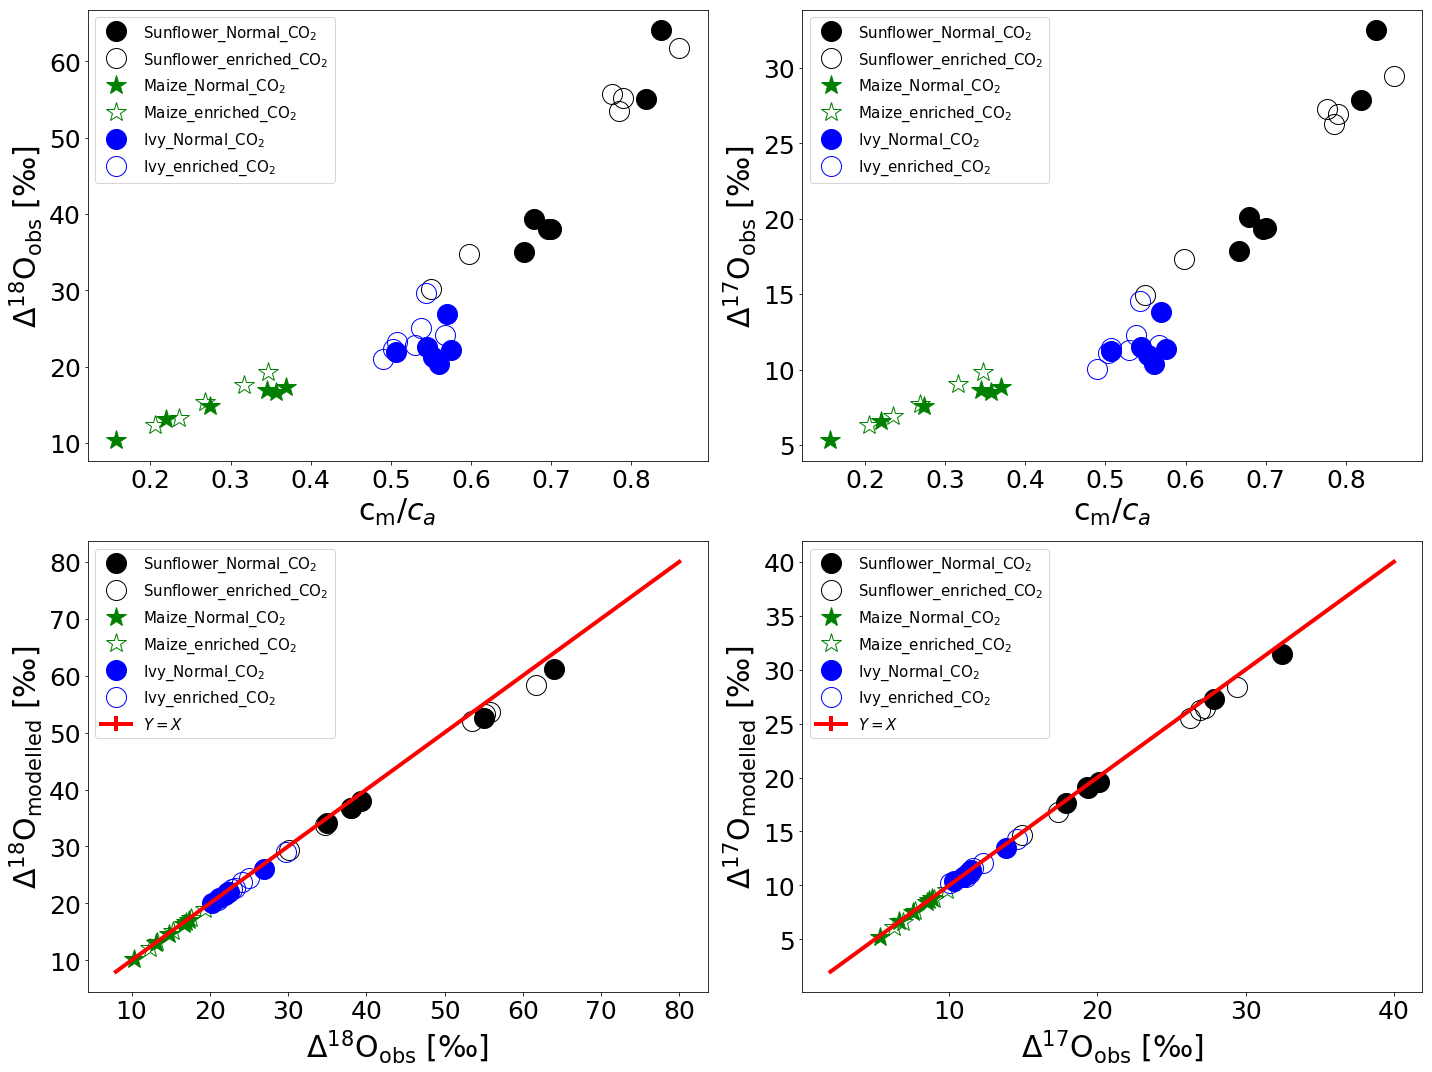

In [476]:
fig,((ax0,ax),(ax1,ax2))=plt.subplots(2,2,figsize=(20,15))
########highlight Maiz###

ax0.errorbar(Sunflower_Normal["cm_ca18"],Sunflower_Normal["D18O_obs"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax0.errorbar(Sunflower_enriched["cm_ca18"],Sunflower_enriched["D18O_obs"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax0.errorbar(Maize_Normal["cm_ca18"],Maize_Normal["D18O_obs"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax0.errorbar(Maize_enriched["cm_ca18"],Maize_enriched["D18O_obs"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax0.errorbar(Ivy_Normal["cm_ca18"],Ivy_Normal["D18O_obs"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax0.errorbar(Ivy_enriched["cm_ca18"],Ivy_enriched["D18O_obs"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")

#ax1.errorbar(Observed_discrimination["cm_ca17"],Mesophyl_coductance["D18_cm"],color="r",marker="o",ls="none")
ax0.set_xlabel("$\mathregular{c_m}/{c_a}$",fontsize=30)
ax0.legend(fontsize=15)
ax0.tick_params(labelsize=25)
ax0.set_ylabel("$\Delta^{18}\mathregular{O_{obs}}$ "+u"[\u2030]",fontsize=30)

#ax6=ax1.twinx()
#ax6.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["A"],ls="none")
#ax4.set_ylim(-0.01,-500)
#####maize####

ax.errorbar(Sunflower_Normal["cm_ca18"],Sunflower_Normal["D17O_obs"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax.errorbar(Sunflower_enriched["cm_ca18"],Sunflower_enriched["D17O_obs"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax.errorbar(Maize_Normal["cm_ca18"],Maize_Normal["D17O_obs"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax.errorbar(Maize_enriched["cm_ca18"],Maize_enriched["D17O_obs"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax.errorbar(Ivy_Normal["cm_ca18"],Ivy_Normal["D17O_obs"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax.errorbar(Ivy_enriched["cm_ca18"],Ivy_enriched["D17O_obs"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")

#######################
#ax2.errorbar(Observed_discrimination["cm_ca17"],Mesophyl_coductance["D17_cm"],color="r",marker="o",ls="none")
######################
ax.set_xlabel("$\mathregular{c_m}/{c_a}$",fontsize=30)
ax.legend(fontsize=15)
ax.tick_params(labelsize=25)
ax.set_ylabel("$\Delta^{17}\mathregular{O_{obs}}$ "+u"[\u2030]",fontsize=30)
################################################
#################################################






ax1.errorbar(Sunflower_Normal["D18O_obs"],Sunflower_Normal["d18_modelled"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")


ax1.errorbar(Sunflower_enriched["D18O_obs"],Sunflower_enriched["d18_modelled"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax1.errorbar(Maize_Normal["D18O_obs"],Maize_Normal["d18_modelled"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax1.errorbar(Maize_enriched["D18O_obs"],Maize_enriched["d18_modelled"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax1.errorbar(Ivy_Normal["D18O_obs"],Ivy_Normal["d18_modelled"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax1.errorbar(Ivy_enriched["D18O_obs"],Ivy_enriched["d18_modelled"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")

#ax1.errorbar(Observed_discrimination["cm_ca18"],Mesophyl_coductance["D18_cm"],color="r",marker="o",ls="none",label="Model")
ax1.set_xlabel("$\Delta^{18}\mathregular{O_{obs}}$ "+u"[\u2030]",fontsize=30)

ax1.set_ylabel("$\Delta^{18}\mathregular{O_{modelled}}$ "+u"[\u2030]",fontsize=30)

########################
#######################
#####Fitting y=X line
aa=np.linspace(8, 80, num=80)
ax1.errorbar(aa,aa,yerr=0,color="r",linewidth=4,label="$Y=X$")
################################################
#################################################
ax1.legend(fontsize=15)
ax1.tick_params(labelsize=25)
#ax6=ax1.twinx()
#ax6.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["A"],ls="none")
#ax4.set_ylim(-0.01,-500)
#####maize####


#################################
################################
##############################
ax2.errorbar(Sunflower_Normal["D17O_obs"],Sunflower_Normal["d17_modelled"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax2.errorbar(Sunflower_enriched["D17O_obs"],Sunflower_enriched["d17_modelled"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax2.errorbar(Maize_Normal["D17O_obs"],Maize_Normal["d17_modelled"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax2.errorbar(Maize_enriched["D17O_obs"],Maize_enriched["d17_modelled"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax2.errorbar(Ivy_Normal["D17O_obs"],Ivy_Normal["d17_modelled"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax2.errorbar(Ivy_enriched["D17O_obs"],Ivy_enriched["d17_modelled"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")

#######################
#ax2.errorbar(Mesophyl_coductance["D17_cm"],Mesophyl_coductance["D17_cm"],color="r",marker="o",ls="none",label="Model")
######################
ax2.set_xlabel("$\Delta^{17}\mathregular{O_{obs}}$ "+u"[\u2030]",fontsize=30)
ax2.legend(fontsize=15)
ax2.tick_params(labelsize=25)
ax2.set_ylabel("$\Delta^{17}\mathregular{O_{modelled}}$ "+u"[\u2030]",fontsize=30)
######
########################
#######################
#####Fitting y=X line
a=np.linspace(2.0, 40, num=80)
ax2.errorbar(a,a,yerr=0,color="r",linewidth=4,label="$Y=X$")
################################################
#################################################

ax2.legend(fontsize=15)
ax2.tick_params(labelsize=25)

fig.tight_layout()
plt.savefig("/Users/getachew/surfdrive/Photosynthesis/Second_phase_Experiment/Photosynthesis paper/Modelled_vs_Obsreved_all_combined.eps")
plt.show()













# Include light intensity as a color bar

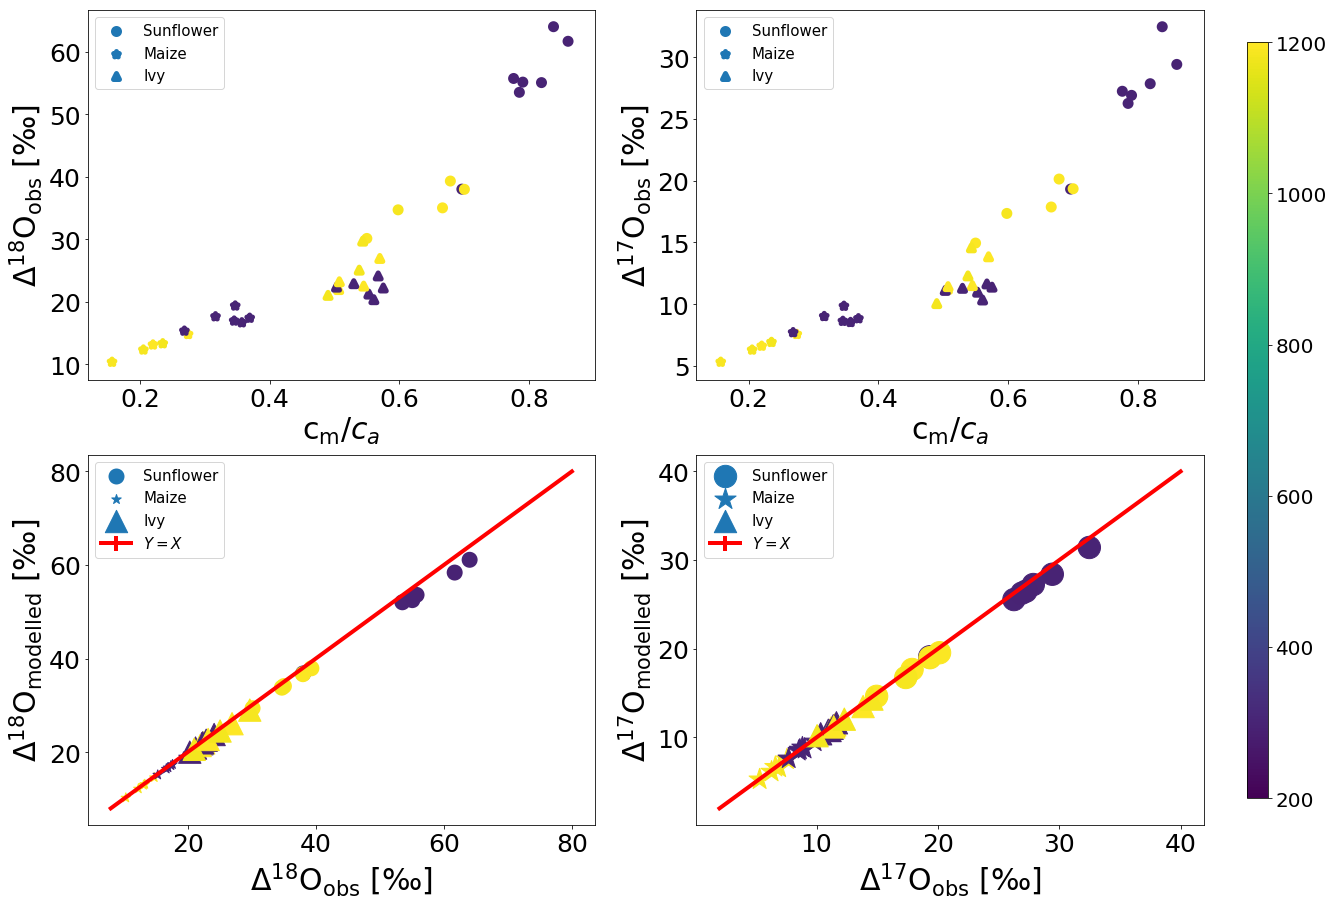

In [477]:
fig,((ax0,ax),(ax1,ax2))=plt.subplots(2,2,figsize=(20,15))
#fig=plt.figure(figsize=(14,8.5),dpi=150,facecolor="w",edgecolor="k")


########highlight Maiz###
SF18_in=np.array(Sunflower["PFD"])
###############
############
SF18=ax0.scatter(Sunflower["cm_ca18"],Sunflower["D18O_obs"],marker="o",label="Sunflower",linewidths=5,c=SF18_in,vmin=200,vmax=1200)

# y_SF18=plt.colorbar(SF18, ax=ax0)
# y_SF18.ax.tick_params(labelsize=20)
#ax0.errorbar(Sunflower["cm_ca18"],Sunflower["D18O_obs"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")

#ax0.errorbar(Sunflower_enriched["cm_ca18"],Sunflower_enriched["D18O_obs"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")


M18_in=np.array(Maize["PFD"])

M18=ax0.scatter(Maize["cm_ca18"],Maize["D18O_obs"],marker="*",label="Maize",linewidths=5,c=M18_in,vmin=200,vmax=1200)

#y_M18=plt.colorbar(M18, ax=ax0)
#y_M18.ax.tick_params(labelsize=20)


#ax.errorbar(Maize_enriched["cm_ca18"],Maize_enriched["D17O_excess_obs"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
I18_in=np.array(Ivy["PFD"])
I18=ax0.scatter(Ivy["cm_ca18"],Ivy["D18O_obs"],marker="^",label="Ivy",linewidths=5,c=I18_in,vmin=200,vmax=1200)
# y_I18=plt.colorbar(I18, ax=ax0)
# y_I18.ax.tick_params(labelsize=20)


# ax0.errorbar(Maize_Normal["cm_ca18"],Maize_Normal["D18O_obs"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
# ax0.errorbar(Maize_enriched["cm_ca18"],Maize_enriched["D18O_obs"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

# ###################################
# #######Low light Maize
# ax0.errorbar(Ivy_Normal["cm_ca18"],Ivy_Normal["D18O_obs"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
# ax0.errorbar(Ivy_enriched["cm_ca18"],Ivy_enriched["D18O_obs"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")

#ax1.errorbar(Observed_discrimination["cm_ca17"],Mesophyl_coductance["D18_cm"],color="r",marker="o",ls="none")
ax0.set_xlabel("$\mathregular{c_m}/{c_a}$",fontsize=30)
ax0.legend(fontsize=15)
ax0.tick_params(labelsize=25)
ax0.set_ylabel("$\Delta^{18}\mathregular{O_{obs}}$ "+u"[\u2030]",fontsize=30)

#ax6=ax1.twinx()
#ax6.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["A"],ls="none")
#ax4.set_ylim(-0.01,-500)
#####maize####

SF17_in=np.array(Sunflower["PFD"])
###############
############
SF17=ax.scatter(Sunflower["cm_ca18"],Sunflower["D17O_obs"],marker="o",label="Sunflower",linewidths=5,c=SF17_in,vmin=200,vmax=1200)

# y_SF17=plt.colorbar(SF17, ax=ax)
# y_SF17.ax.tick_params(labelsize=20)
#ax0.errorbar(Sunflower["cm_ca18"],Sunflower["D18O_obs"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")

#ax0.errorbar(Sunflower_enriched["cm_ca18"],Sunflower_enriched["D18O_obs"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")


M17_in=np.array(Maize["PFD"])

M17=ax.scatter(Maize["cm_ca18"],Maize["D17O_obs"],marker="*",label="Maize",linewidths=5,c=M17_in,vmin=200,vmax=1200)

# y_M17=plt.colorbar(M17, ax=ax)
# y_M17.ax.tick_params(labelsize=20)


#ax.errorbar(Maize_enriched["cm_ca18"],Maize_enriched["D17O_excess_obs"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
I17_in=np.array(Ivy["PFD"])
I17=ax.scatter(Ivy["cm_ca18"],Ivy["D17O_obs"],marker="^",label="Ivy",linewidths=5,c=I17_in,vmin=200,vmax=1200)
# y_I17=plt.colorbar(I17, ax=ax)
# y_I17.ax.tick_params(labelsize=20)


# ax0.erro
#######################
#ax2.errorbar(Observed_discrimination["cm_ca17"],Mesophyl_coductance["D17_cm"],color="r",marker="o",ls="none")
######################
ax.set_xlabel("$\mathregular{c_m}/{c_a}$",fontsize=30)
ax.legend(fontsize=15)
ax.tick_params(labelsize=25)
ax.set_ylabel("$\Delta^{17}\mathregular{O_{obs}}$ "+u"[\u2030]",fontsize=30)
################################################
#################################################



SF18_in=np.array(Sunflower["PFD"])
###############
############
SF18=ax1.scatter(Sunflower["D18O_obs"],Sunflower["d18_modelled"],marker="o",label="Sunflower",linewidths=10,c=SF18_in,vmin=200,vmax=1200)

# y_SF18=plt.colorbar(SF18, ax=ax1)
# y_SF18.ax.tick_params(labelsize=20)


# ax1.errorbar(Sunflower_Normal["D18O_obs"],Sunflower_Normal["d18_modelled"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")


# ax1.errorbar(Sunflower_enriched["D18O_obs"],Sunflower_enriched["d18_modelled"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

M18_in=np.array(Maize["PFD"])

M18=ax1.scatter(Maize["D18O_obs"],Maize["d18_modelled"],marker="*",label="Maize",s=100,c=M18_in,vmin=200,vmax=1200)

# y_M18=plt.colorbar(M18, ax=ax1)
# y_M18.ax.tick_params(labelsize=20)

# ax1.errorbar(Maize_Normal["D18O_obs"],Maize_Normal["d18_modelled"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
# ax1.errorbar(Maize_enriched["D18O_obs"],Maize_enriched["d18_modelled"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
I18_in=np.array(Ivy["PFD"])
I18=ax1.scatter(Ivy["D18O_obs"],Ivy["d18_modelled"],marker="^",label="Ivy",s=500,c=I18_in,vmin=200,vmax=1200)
# y_I18=plt.colorbar(I18, ax=ax1)
# y_I18.ax.tick_params(labelsize=20)
# # ax1.errorbar(Ivy_Normal["D18O_obs"],Ivy_Normal["d18_modelled"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
# ax1.errorbar(Ivy_enriched["D18O_obs"],Ivy_enriched["d18_modelled"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")

#ax1.errorbar(Observed_discrimination["cm_ca18"],Mesophyl_coductance["D18_cm"],color="r",marker="o",ls="none",label="Model")
ax1.set_xlabel("$\Delta^{18}\mathregular{O_{obs}}$ "+u"[\u2030]",fontsize=30)

ax1.set_ylabel("$\Delta^{18}\mathregular{O_{modelled}}$ "+u"[\u2030]",fontsize=30)

########################
#######################
#####Fitting y=X line
aa=np.linspace(8, 80, num=80)
ax1.errorbar(aa,aa,yerr=0,color="r",linewidth=4,label="$Y=X$")
################################################
#################################################
ax1.legend(fontsize=15)
ax1.tick_params(labelsize=25)
#ax6=ax1.twinx()
#ax6.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["A"],ls="none")
#ax4.set_ylim(-0.01,-500)
#####maize####


#################################
################################
##############################
SF18_in=np.array(Sunflower["PFD"])
###############
############
SF18=ax2.scatter(Sunflower["D17O_obs"],Sunflower["d17_modelled"],marker="o",label="Sunflower",s=500,c=SF18_in,vmin=200,vmax=1200)

# y_SF18=plt.colorbar(SF18, ax=ax2)
# y_SF18.ax.tick_params(labelsize=20)


# ax1.errorbar(Sunflower_Normal["D18O_obs"],Sunflower_Normal["d18_modelled"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")


# ax1.errorbar(Sunflower_enriched["D18O_obs"],Sunflower_enriched["d18_modelled"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

M18_in=np.array(Maize["PFD"])

M18=ax2.scatter(Maize["D17O_obs"],Maize["d17_modelled"],marker="*",label="Maize",s=500,c=M18_in,vmin=200,vmax=1200)

# y_M18=plt.colorbar(M18, ax=ax2)
# y_M18.ax.tick_params(labelsize=20)

# ax1.errorbar(Maize_Normal["D18O_obs"],Maize_Normal["d18_modelled"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
# ax1.errorbar(Maize_enriched["D18O_obs"],Maize_enriched["d18_modelled"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
I18_in=np.array(Ivy["PFD"])
I18=ax2.scatter(Ivy["D17O_obs"],Ivy["d17_modelled"],marker="^",label="Ivy",s=500,c=I18_in,vmin=200,vmax=1200)
# y_I18=plt.colorbar(I18, ax=ax2)
# y_I18.ax.tick_params(labelsize=20)
# # ax1.errorbar(Ivy_N
# #ax2.errorbar(Mesophyl_coductance["D17_cm"],Mesophyl_coductance["D17_cm"],color="r",marker="o",ls="none",label="Model")
######################
ax2.set_xlabel("$\Delta^{17}\mathregular{O_{obs}}$ "+u"[\u2030]",fontsize=30)
ax2.legend(fontsize=15)
ax2.tick_params(labelsize=25)
ax2.set_ylabel("$\Delta^{17}\mathregular{O_{modelled}}$ "+u"[\u2030]",fontsize=30)
######
########################
#######################
#####Fitting y=X line
a=np.linspace(2.0, 40, num=80)
ax2.errorbar(a,a,yerr=0,color="r",linewidth=4,label="$Y=X$")
################################################
#################################################

ax2.legend(fontsize=15)
ax2.tick_params(labelsize=25)
ax_colorbar=fig.add_axes([.93,.15,.015,.7])## x-origin, y-origin, width, height
y_SF18=plt.colorbar(SF18, cax=ax_colorbar)
y_SF18.ax.tick_params(labelsize=20)
#fig.tight_layout()
plt.savefig("/Users/getachew/surfdrive/Photosynthesis/Second_phase_Experiment/Photosynthesis paper/Modelled_vs_Obsreved_all_combined_light_intensity.eps")
plt.show()














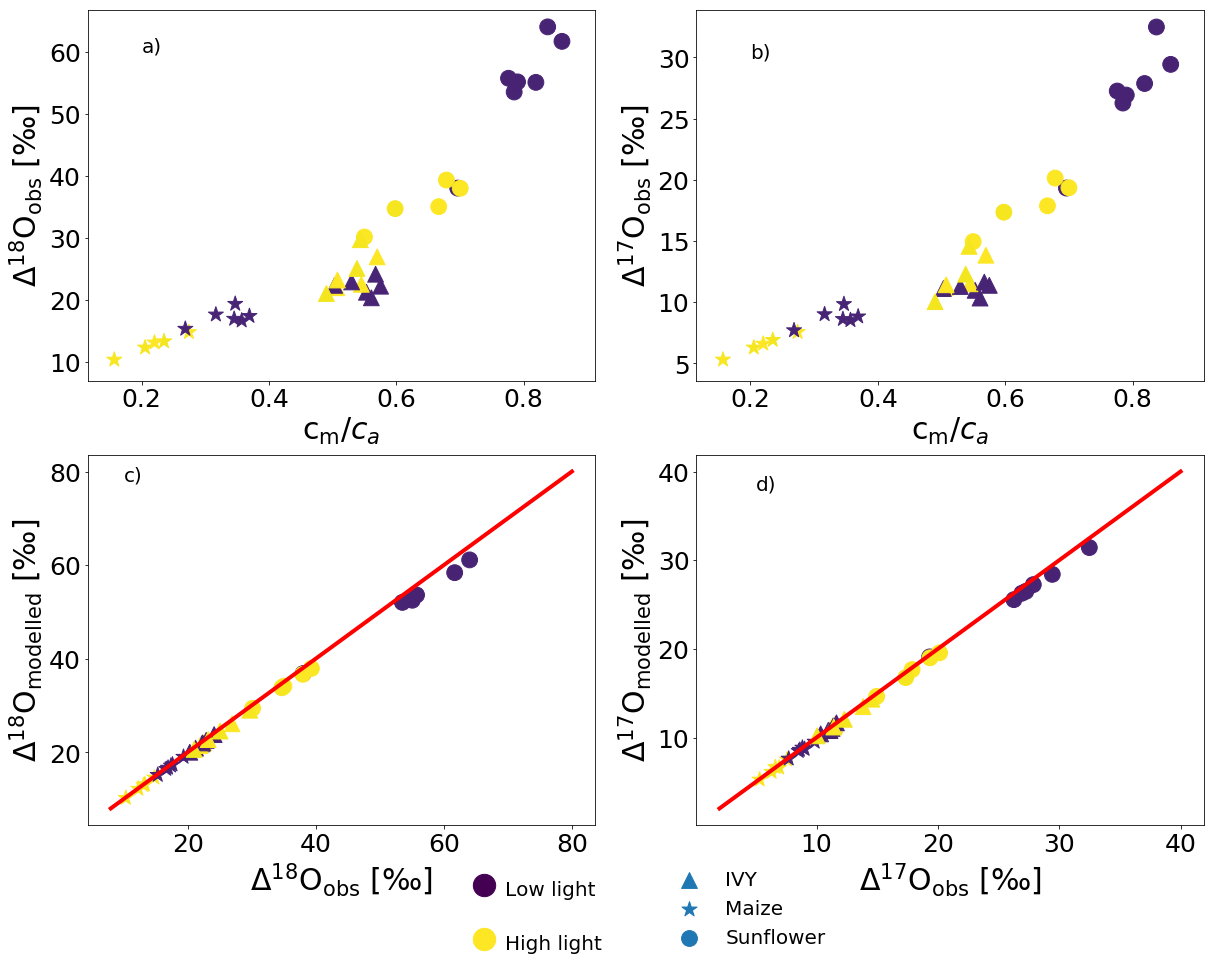

In [478]:
fig,((ax0,ax),(ax1,ax2))=plt.subplots(2,2,figsize=(20,15))
#fig=plt.figure(figsize=(14,8.5),dpi=150,facecolor="w",edgecolor="k")


########highlight Maiz###
SF18_in=np.array(Sunflower["PFD"])
###############
############
SF18=ax0.scatter(Sunflower["cm_ca18"],Sunflower["D18O_obs"],marker="o",label="Sunflower",s=250,c=SF18_in,vmin=200,vmax=1200)
ax0.text(0.2,60,"a)",fontsize=20)
# y_SF18=plt.colorbar(SF18, ax=ax0)
# y_SF18.ax.tick_params(labelsize=20)
#ax0.errorbar(Sunflower["cm_ca18"],Sunflower["D18O_obs"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")

#ax0.errorbar(Sunflower_enriched["cm_ca18"],Sunflower_enriched["D18O_obs"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")


M18_in=np.array(Maize["PFD"])

M18=ax0.scatter(Maize["cm_ca18"],Maize["D18O_obs"],marker="*",label="Maize",s=250,c=M18_in,vmin=200,vmax=1200)

#y_M18=plt.colorbar(M18, ax=ax0)
#y_M18.ax.tick_params(labelsize=20)


#ax.errorbar(Maize_enriched["cm_ca18"],Maize_enriched["D17O_excess_obs"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
I18_in=np.array(Ivy["PFD"])
I18=ax0.scatter(Ivy["cm_ca18"],Ivy["D18O_obs"],marker="^",label="Ivy",s=250,c=I18_in,vmin=200,vmax=1200)
# y_I18=plt.colorbar(I18, ax=ax0)
# y_I18.ax.tick_params(labelsize=20)


# ax0.errorbar(Maize_Normal["cm_ca18"],Maize_Normal["D18O_obs"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
# ax0.errorbar(Maize_enriched["cm_ca18"],Maize_enriched["D18O_obs"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

# ###################################
# #######Low light Maize
# ax0.errorbar(Ivy_Normal["cm_ca18"],Ivy_Normal["D18O_obs"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
# ax0.errorbar(Ivy_enriched["cm_ca18"],Ivy_enriched["D18O_obs"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")

#ax1.errorbar(Observed_discrimination["cm_ca17"],Mesophyl_coductance["D18_cm"],color="r",marker="o",ls="none")
ax0.set_xlabel("$\mathregular{c_m}/{c_a}$",fontsize=30)
#ax0.legend(fontsize=15)
ax0.tick_params(labelsize=25)
ax0.set_ylabel("$\Delta^{18}\mathregular{O_{obs}}$ "+u"[\u2030]",fontsize=30)

#ax6=ax1.twinx()
#ax6.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["A"],ls="none")
#ax4.set_ylim(-0.01,-500)
#####maize####

SF17_in=np.array(Sunflower["PFD"])
###############
############
SF17=ax.scatter(Sunflower["cm_ca18"],Sunflower["D17O_obs"],marker="o",label="Sunflower",s=250,c=SF17_in,vmin=200,vmax=1200)
ax.text(0.2,30,"b)",fontsize=20)
# y_SF17=plt.colorbar(SF17, ax=ax)
# y_SF17.ax.tick_params(labelsize=20)
#ax0.errorbar(Sunflower["cm_ca18"],Sunflower["D18O_obs"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")

#ax0.errorbar(Sunflower_enriched["cm_ca18"],Sunflower_enriched["D18O_obs"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")


M17_in=np.array(Maize["PFD"])

M17=ax.scatter(Maize["cm_ca18"],Maize["D17O_obs"],marker="*",label="Maize",s=250,c=M17_in,vmin=200,vmax=1200)

# y_M17=plt.colorbar(M17, ax=ax)
# y_M17.ax.tick_params(labelsize=20)


#ax.errorbar(Maize_enriched["cm_ca18"],Maize_enriched["D17O_excess_obs"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
I17_in=np.array(Ivy["PFD"])
I17=ax.scatter(Ivy["cm_ca18"],Ivy["D17O_obs"],marker="^",label="Ivy",s=250,c=I17_in,vmin=200,vmax=1200)
# y_I17=plt.colorbar(I17, ax=ax)
# y_I17.ax.tick_params(labelsize=20)


# ax0.erro
#######################
#ax2.errorbar(Observed_discrimination["cm_ca17"],Mesophyl_coductance["D17_cm"],color="r",marker="o",ls="none")
######################
ax.set_xlabel("$\mathregular{c_m}/{c_a}$",fontsize=30)
#ax.legend(fontsize=15)
ax.tick_params(labelsize=25)
ax.set_ylabel("$\Delta^{17}\mathregular{O_{obs}}$ "+u"[\u2030]",fontsize=30)
################################################
#################################################



SF18_in=np.array(Sunflower["PFD"])
###############
############
SF18=ax1.scatter(Sunflower["D18O_obs"],Sunflower["d18_modelled"],marker="o",label="Sunflower",s=250,c=SF18_in,vmin=200,vmax=1200)
ax1.text(10,78,"c)",fontsize=20)
# y_SF18=plt.colorbar(SF18, ax=ax1)
# y_SF18.ax.tick_params(labelsize=20)


# ax1.errorbar(Sunflower_Normal["D18O_obs"],Sunflower_Normal["d18_modelled"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")


# ax1.errorbar(Sunflower_enriched["D18O_obs"],Sunflower_enriched["d18_modelled"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

M18_in=np.array(Maize["PFD"])

M18=ax1.scatter(Maize["D18O_obs"],Maize["d18_modelled"],marker="*",label="Maize",s=250,c=M18_in,vmin=200,vmax=1200)

# y_M18=plt.colorbar(M18, ax=ax1)
# y_M18.ax.tick_params(labelsize=20)

# ax1.errorbar(Maize_Normal["D18O_obs"],Maize_Normal["d18_modelled"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
# ax1.errorbar(Maize_enriched["D18O_obs"],Maize_enriched["d18_modelled"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
I18_in=np.array(Ivy["PFD"])
I18=ax1.scatter(Ivy["D18O_obs"],Ivy["d18_modelled"],marker="^",label="Ivy",s=250,c=I18_in,vmin=200,vmax=1200)
# y_I18=plt.colorbar(I18, ax=ax1)
# y_I18.ax.tick_params(labelsize=20)
# # ax1.errorbar(Ivy_Normal["D18O_obs"],Ivy_Normal["d18_modelled"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
# ax1.errorbar(Ivy_enriched["D18O_obs"],Ivy_enriched["d18_modelled"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")

#ax1.errorbar(Observed_discrimination["cm_ca18"],Mesophyl_coductance["D18_cm"],color="r",marker="o",ls="none",label="Model")
ax1.set_xlabel("$\Delta^{18}\mathregular{O_{obs}}$ "+u"[\u2030]",fontsize=30)

ax1.set_ylabel("$\Delta^{18}\mathregular{O_{modelled}}$ "+u"[\u2030]",fontsize=30)

########################
#######################
#####Fitting y=X line
aa=np.linspace(8, 80, num=80)
ax1.errorbar(aa,aa,yerr=0,color="r",linewidth=4,label="$Y=X$")
################################################
#################################################
#ax1.legend(fontsize=15)
ax1.tick_params(labelsize=25)
#ax6=ax1.twinx()
#ax6.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["A"],ls="none")
#ax4.set_ylim(-0.01,-500)
#####maize####


#################################
################################
##############################
SF18_in=np.array(Sunflower["PFD"])
###############
############
SF18=ax2.scatter(Sunflower["D17O_obs"],Sunflower["d17_modelled"],marker="o",label="Sunflower",s=250,c=SF18_in,vmin=200,vmax=1200)
ax2.text(5,38,"d)",fontsize=20)
# y_SF18=plt.colorbar(SF18, ax=ax2)
# y_SF18.ax.tick_params(labelsize=20)


# ax1.errorbar(Sunflower_Normal["D18O_obs"],Sunflower_Normal["d18_modelled"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")


# ax1.errorbar(Sunflower_enriched["D18O_obs"],Sunflower_enriched["d18_modelled"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

M18_in=np.array(Maize["PFD"])

M18=ax2.scatter(Maize["D17O_obs"],Maize["d17_modelled"],marker="*",label="Maize",s=250,c=M18_in,vmin=200,vmax=1200)

# y_M18=plt.colorbar(M18, ax=ax2)
# y_M18.ax.tick_params(labelsize=20)

# ax1.errorbar(Maize_Normal["D18O_obs"],Maize_Normal["d18_modelled"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
# ax1.errorbar(Maize_enriched["D18O_obs"],Maize_enriched["d18_modelled"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
I18_in=np.array(Ivy["PFD"])
I18=ax2.scatter(Ivy["D17O_obs"],Ivy["d17_modelled"],marker="^",label="Ivy",s=250,c=I18_in,vmin=200,vmax=1200)
# y_I18=plt.colorbar(I18, ax=ax2)
# y_I18.ax.tick_params(labelsize=20)
# # ax1.errorbar(Ivy_N
# #ax2.errorbar(Mesophyl_coductance["D17_cm"],Mesophyl_coductance["D17_cm"],color="r",marker="o",ls="none",label="Model")
######################
ax2.set_xlabel("$\Delta^{17}\mathregular{O_{obs}}$ "+u"[\u2030]",fontsize=30)
#ax2.legend(fontsize=15)
ax2.tick_params(labelsize=25)
ax2.set_ylabel("$\Delta^{17}\mathregular{O_{modelled}}$ "+u"[\u2030]",fontsize=30)
######
########################
#######################
#####Fitting y=X line
a=np.linspace(2.0, 40, num=80)
ax2.errorbar(a,a,yerr=0,color="r",linewidth=4,label="$Y=X$")
################################################
#################################################

#ax2.legend(fontsize=15)
ax2.tick_params(labelsize=25)
#ax_colorbar=fig.add_axes([.93,.15,.015,.7])## x-origin, y-origin, width, height
#y_SF18=plt.colorbar(SF18, cax=ax_colorbar)
#y_SF18.ax.tick_params(labelsize=20)

ax_legend = fig.add_axes([.15, 0, .5, .1],frameon=False, xticks=[], yticks=[])
ax_legend.legend((I18,M18,SF18), ('IVY', 'Maize',"Sunflower"), fontsize=20, frameon=False)
ax_legend.scatter([0],[.7], c=[200], vmin=200, vmax=1200,s=500)
ax_legend.scatter([0],[.2], c=[1200], vmin=200, vmax=1200,s=500)
ax_legend.text(0.001, .1, 'High light',fontsize=20)
ax_legend.text(0.001, .6, 'Low light',fontsize=20)
ax_legend.set_ylim([0,1])

#fig.tight_layout()
plt.savefig("/Users/getachew/surfdrive/Photosynthesis/Second_phase_Experiment/Photosynthesis paper/Philip_vs_Obsreved_all_combined_light_intensity_Phillip.eps")
plt.show()















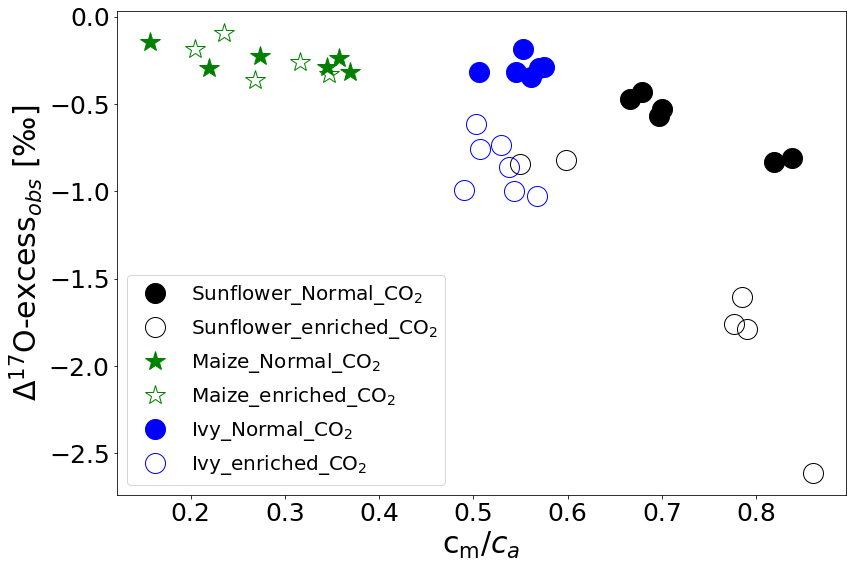

In [479]:
fig,ax4=plt.subplots(figsize=(12,8))
#
# #####################
# ######################

ax4.errorbar(Sunflower_Normal["cm_ca18"],Sunflower_Normal["D17O_excess_obs"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Sunflower_enriched["cm_ca18"],Sunflower_enriched["D17O_excess_obs"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax4.errorbar(Maize_Normal["cm_ca18"],Maize_Normal["D17O_excess_obs"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Maize_enriched["cm_ca18"],Maize_enriched["D17O_excess_obs"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax4.errorbar(Ivy_Normal["cm_ca18"],Ivy_Normal["D17O_excess_obs"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Ivy_enriched["cm_ca18"],Ivy_enriched["D17O_excess_obs"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")
#ax4.errorbar(Observed_discrimination["cm_ca18"],Mesophyl_coductance["DD17_cm"],color="r",marker="o",ls="none")

######################

ax4.tick_params(labelsize=25)
ax4.tick_params(labelsize=25)
ax4.legend(fontsize=20)
#ax5=ax4.twinx()
#ax5.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["A"],ls="none")
#ax4.set_ylim(-0.01,-500)
ax4.set_xlabel("$\mathregular{c_m}/{c_a}$",fontsize=30)
ax4.set_ylabel("$\Delta^{17}\mathregular{O}$"+"-"+"excess"+"$_{obs}$ "+u"[\u2030]",fontsize=30)

fig.tight_layout()
plt.savefig("/Users/getachew/surfdrive/Photosynthesis/Second_phase_Experiment/Photosynthesis paper/Discrimination_Excess_17O.eps")
plt.show()





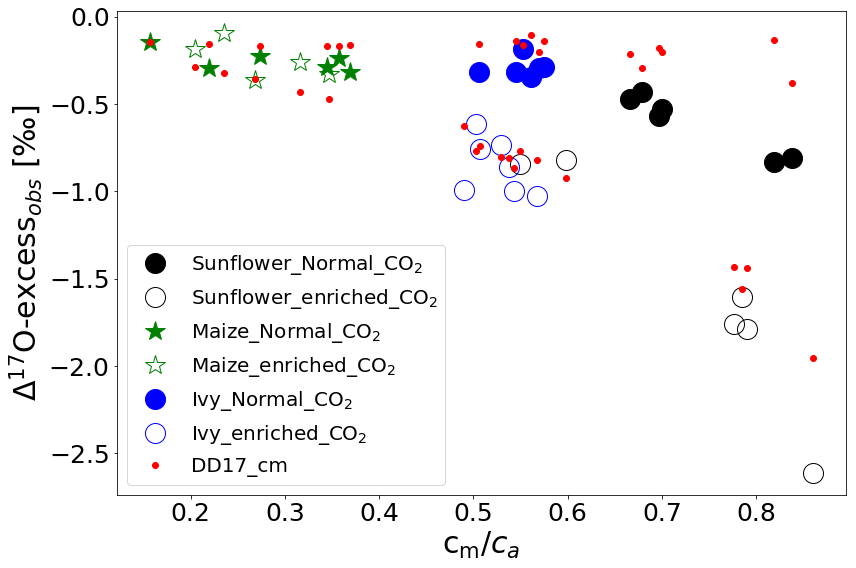

In [480]:
fig,ax4=plt.subplots(figsize=(12,8))
########highlight Maiz###

ax4.errorbar(Sunflower_Normal["cm_ca18"],Sunflower_Normal["D17O_excess_obs"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Sunflower_enriched["cm_ca18"],Sunflower_enriched["D17O_excess_obs"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax4.errorbar(Maize_Normal["cm_ca18"],Maize_Normal["D17O_excess_obs"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Maize_enriched["cm_ca18"],Maize_enriched["D17O_excess_obs"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax4.errorbar(Ivy_Normal["cm_ca18"],Ivy_Normal["D17O_excess_obs"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Ivy_enriched["cm_ca18"],Ivy_enriched["D17O_excess_obs"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Observed_discrimination["cm_ca18"],Mesophyl_coductance["DD17_cm"],color="r",marker="o",ls="none")

######################

ax4.tick_params(labelsize=25)
ax4.tick_params(labelsize=25)
ax4.legend(fontsize=20)
#ax5=ax4.twinx()
#ax5.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["A"],ls="none")
#ax4.set_ylim(-0.01,-500)
ax4.set_xlabel("$\mathregular{c_m}/{c_a}$",fontsize=30)
ax4.set_ylabel("$\Delta^{17}\mathregular{O}$"+"-"+"excess"+"$_{obs}$ "+u"[\u2030]",fontsize=30)

fig.tight_layout()
plt.savefig("/Users/getachew/surfdrive/Photosynthesis/Second_phase_Experiment/Photosynthesis paper/Discrimination_Excess_17O_Modelled.eps")
plt.show()


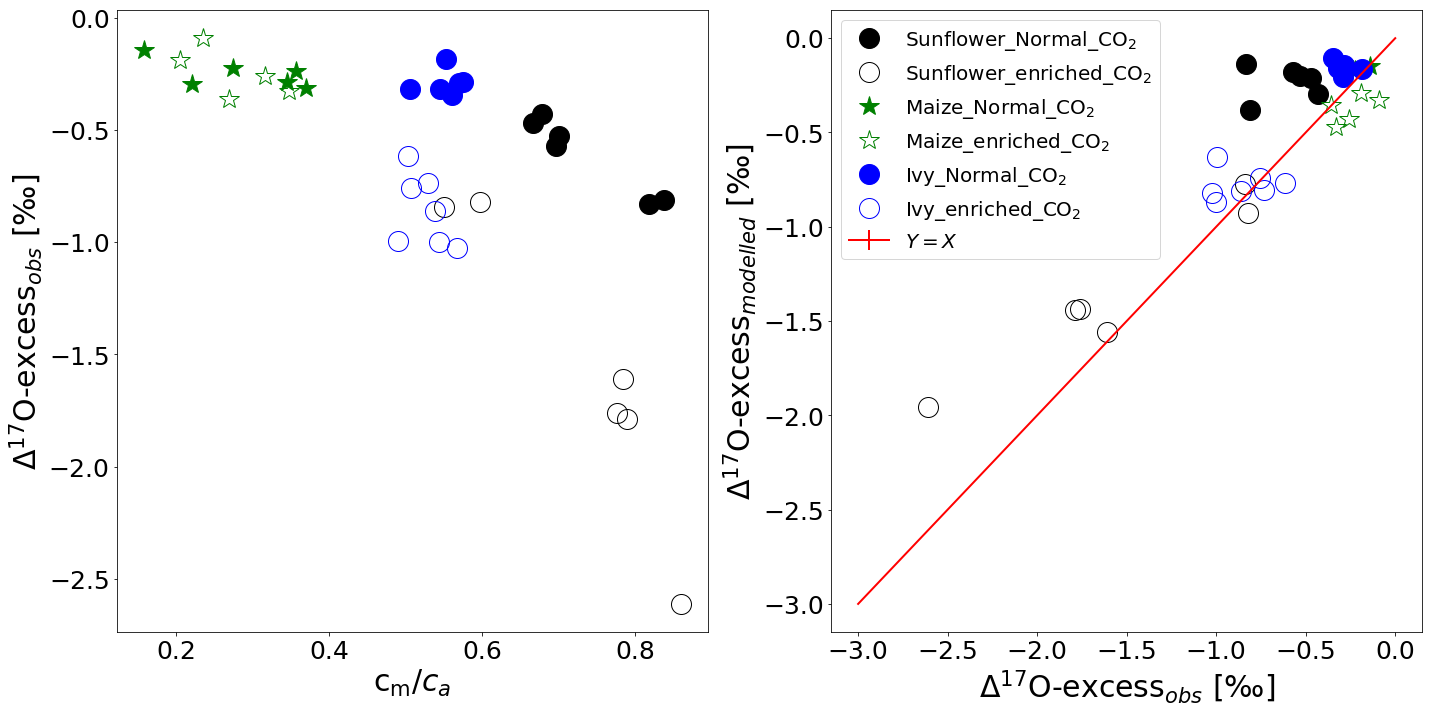

In [481]:
fig,(ax,ax4)=plt.subplots(1,2,figsize=(20,10))
########highlight Maiz###
###########################
##############################

ax.errorbar(Sunflower_Normal["cm_ca18"],Sunflower_Normal["D17O_excess_obs"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax.errorbar(Sunflower_enriched["cm_ca18"],Sunflower_enriched["D17O_excess_obs"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax.errorbar(Maize_Normal["cm_ca18"],Maize_Normal["D17O_excess_obs"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax.errorbar(Maize_enriched["cm_ca18"],Maize_enriched["D17O_excess_obs"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax.errorbar(Ivy_Normal["cm_ca18"],Ivy_Normal["D17O_excess_obs"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax.errorbar(Ivy_enriched["cm_ca18"],Ivy_enriched["D17O_excess_obs"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")
#ax4.errorbar(Observed_discrimination["cm_ca18"],Mesophyl_coductance["DD17_cm"],color="r",marker="o",ls="none")

######################

ax.tick_params(labelsize=25)
ax.tick_params(labelsize=25)
#ax.legend(fontsize=20)
#ax5=ax4.twinx()
#ax5.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["A"],ls="none")
#ax4.set_ylim(-0.01,-500)
ax.set_xlabel("$\mathregular{c_m}/{c_a}$",fontsize=30)
ax.set_ylabel("$\Delta^{17}\mathregular{O}$"+"-"+"excess"+"$_{obs}$ "+u"[\u2030]",fontsize=30)

########################################
#######################################
########################################
ax4.errorbar(Sunflower_Normal["D17O_excess_obs"],Sunflower_Normal["Excess_modelled"],marker="o",markersize=20,color="k",label="Sunflower_Normal_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Sunflower_enriched["D17O_excess_obs"],Sunflower_enriched["Excess_modelled"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

ax4.errorbar(Maize_Normal["D17O_excess_obs"],Maize_Normal["Excess_modelled"],marker="*",markersize=20,color="g",label="Maize_Normal_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Maize_enriched["D17O_excess_obs"],Maize_enriched["Excess_modelled"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
ax4.errorbar(Ivy_Normal["D17O_excess_obs"],Ivy_Normal["Excess_modelled"],marker="o",markersize=20,color="b",label="Ivy_Normal_$\mathregular{CO_2}$",ls="none")
ax4.errorbar(Ivy_enriched["D17O_excess_obs"],Ivy_enriched["Excess_modelled"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")
#ax4.errorbar(Observed_discrimination["cm_ca18"],Mesophyl_coductance["DD17_cm"],color="r",marker="o",ls="none")
a=np.linspace(-3,0,80)
ax4.errorbar(a,a,yerr=0,color="r",linewidth=2,label="$Y=X$")
######################

ax4.tick_params(labelsize=25)
ax4.tick_params(labelsize=25)
ax4.legend(fontsize=20)
#ax5=ax4.twinx()
#ax5.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["A"],ls="none")
#ax4.set_ylim(-0.01,-500)
ax4.set_xlabel("$\Delta^{17}\mathregular{O}$"+"-"+"excess"+"$_{obs}$ "+u"[\u2030]",fontsize=30)
ax4.set_ylabel("$\Delta^{17}\mathregular{O}$"+"-"+"excess"+"$_{modelled}$ "+u"[\u2030]",fontsize=30)

fig.tight_layout()
plt.savefig("/Users/getachew/surfdrive/Photosynthesis/Second_phase_Experiment/Photosynthesis paper/Discrimination_Excess_VS_17O_Modelled_allTogether.eps")
plt.show()



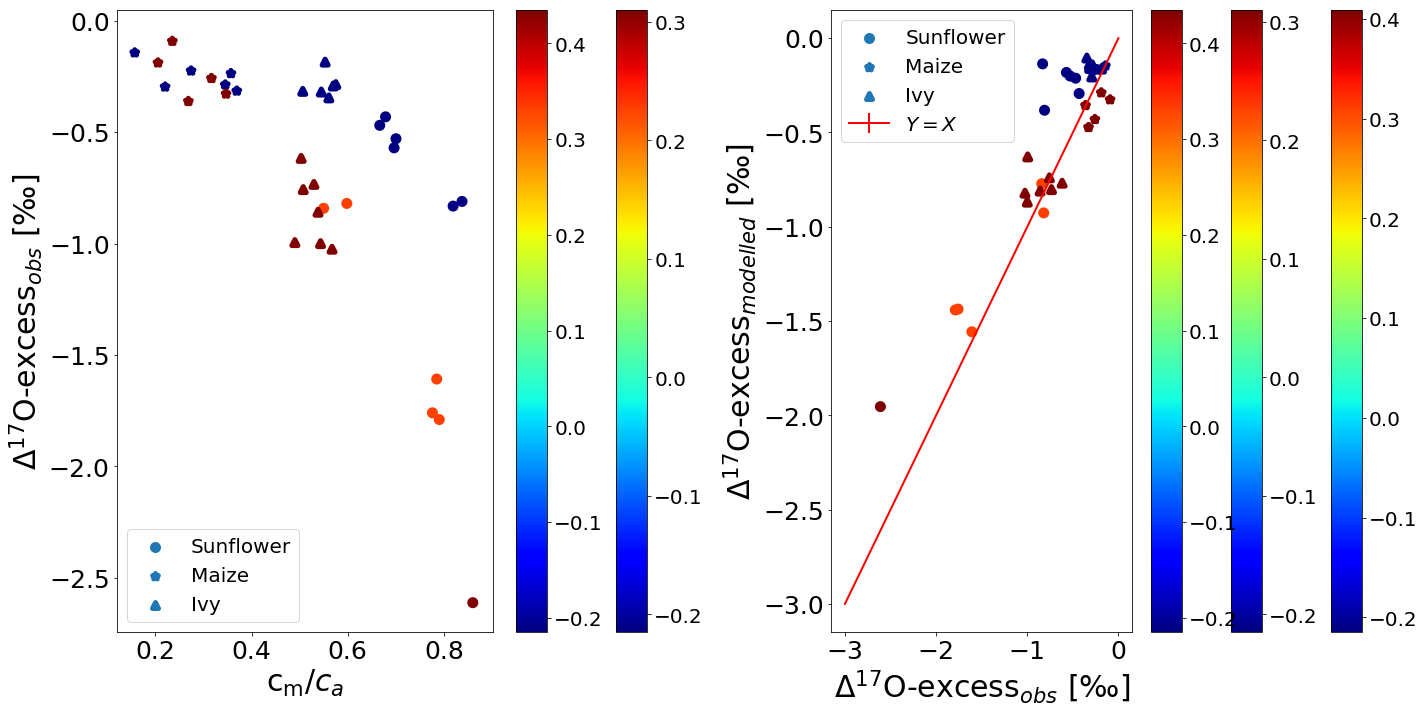

In [482]:
#c=np.abs(y2),linewidths=3


fig,(ax,ax4)=plt.subplots(1,2,figsize=(20,10))
########highlight Maiz###
###########################
##############################
# graph = plt.scatter(my_array, my_array2, c=z, cmap=plt.cm.coolwarm)
# cb = plt.colorbar(graph)
# cb.set_label('mean value')
SF_in=np.array(Sunflower["D17O_in"])
###############
############
SF=ax.scatter(Sunflower["cm_ca18"],Sunflower["D17O_excess_obs"],marker="o",label="Sunflower",linewidths=5,c=SF_in,cmap=cm.jet)

# y_SF=plt.colorbar(SF, ax=ax)
# y_SF.ax.tick_params(labelsize=20)
#ax.errorbar(Sunflower_enriched["cm_ca18"],Sunflower_enriched["D17O_excess_obs"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

M_in=np.array(Maize["D17O_in"])

M=ax.scatter(Maize["cm_ca18"],Maize["D17O_excess_obs"],marker="*",label="Maize",linewidths=5,c=M_in,cmap=cm.jet)

y_M=plt.colorbar(M, ax=ax)
y_M.ax.tick_params(labelsize=20)


#ax.errorbar(Maize_enriched["cm_ca18"],Maize_enriched["D17O_excess_obs"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
I_in=np.array(Ivy["D17O_in"])
I=ax.scatter(Ivy["cm_ca18"],Ivy["D17O_excess_obs"],marker="^",label="Ivy",linewidths=5,c=I_in,cmap=cm.jet)
y_I=plt.colorbar(I, ax=ax)
y_I.ax.tick_params(labelsize=20)

#ax.errorbar(Ivy_enriched["cm_ca18"],Ivy_enriched["D17O_excess_obs"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")
#ax4.errorbar(Observed_discrimination["cm_ca18"],Mesophyl_coductance["DD17_cm"],color="r",marker="o",ls="none")

######################

ax.tick_params(labelsize=25)
ax.tick_params(labelsize=25)
ax.legend(fontsize=20)
#ax5=ax4.twinx()
#ax5.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["A"],ls="none")
#ax4.set_ylim(-0.01,-500)
ax.set_xlabel("$\mathregular{c_m}/{c_a}$",fontsize=30)
ax.set_ylabel("$\Delta^{17}\mathregular{O}$"+"-"+"excess"+"$_{obs}$ "+u"[\u2030]",fontsize=30)

########################################
#######################################
########################################
SF=ax4.scatter(Sunflower["D17O_excess_obs"],Sunflower["Excess_modelled"],marker="o",label="Sunflower",linewidths=5,c=SF_in,cmap=cm.jet)
#ax4.errorbar(Sunflower_enriched["D17O_excess_obs"],Sunflower_enriched["Excess_modelled"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

y_SF=plt.colorbar(SF, ax=ax4)
y_SF.ax.tick_params(labelsize=20)


M=ax4.scatter(Maize["D17O_excess_obs"],Maize["Excess_modelled"],marker="*",label="Maize",linewidth=5,c=M_in,cmap=cm.jet)
#ax4.errorbar(Maize_enriched["D17O_excess_obs"],Maize_enriched["Excess_modelled"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")
y_M=plt.colorbar(M, ax=ax4)
y_M.ax.tick_params(labelsize=20)
###################################
#######Low light Maize
I=ax4.scatter(Ivy["D17O_excess_obs"],Ivy["Excess_modelled"],marker="^",label="Ivy",linewidths=5,c=I_in,cmap=cm.jet)
y_I=plt.colorbar(I, ax=ax4)
y_I.ax.tick_params(labelsize=20)

#ax4.errorbar(Ivy_enriched["D17O_excess_obs"],Ivy_enriched["Excess_modelled"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")
#ax4.errorbar(Observed_discrimination["cm_ca18"],Mesophyl_coductance["DD17_cm"],color="r",marker="o",ls="none")
a=np.linspace(-3,0,80)
ax4.errorbar(a,a,yerr=0,color="r",linewidth=2,label="$Y=X$")
######################

ax4.tick_params(labelsize=25)
ax4.tick_params(labelsize=25)
ax4.legend(fontsize=20)
#ax5=ax4.twinx()
#ax5.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["A"],ls="none")
#ax4.set_ylim(-0.01,-500)
ax4.set_xlabel("$\Delta^{17}\mathregular{O}$"+"-"+"excess"+"$_{obs}$ "+u"[\u2030]",fontsize=30)
ax4.set_ylabel("$\Delta^{17}\mathregular{O}$"+"-"+"excess"+"$_{modelled}$ "+u"[\u2030]",fontsize=30)

fig.tight_layout()
plt.savefig("/Users/getachew/surfdrive/Photosynthesis/Second_phase_Experiment/Photosynthesis paper/Discrimination_Excess_VS_17O_Modelled_allTogether_special.eps")
plt.show()




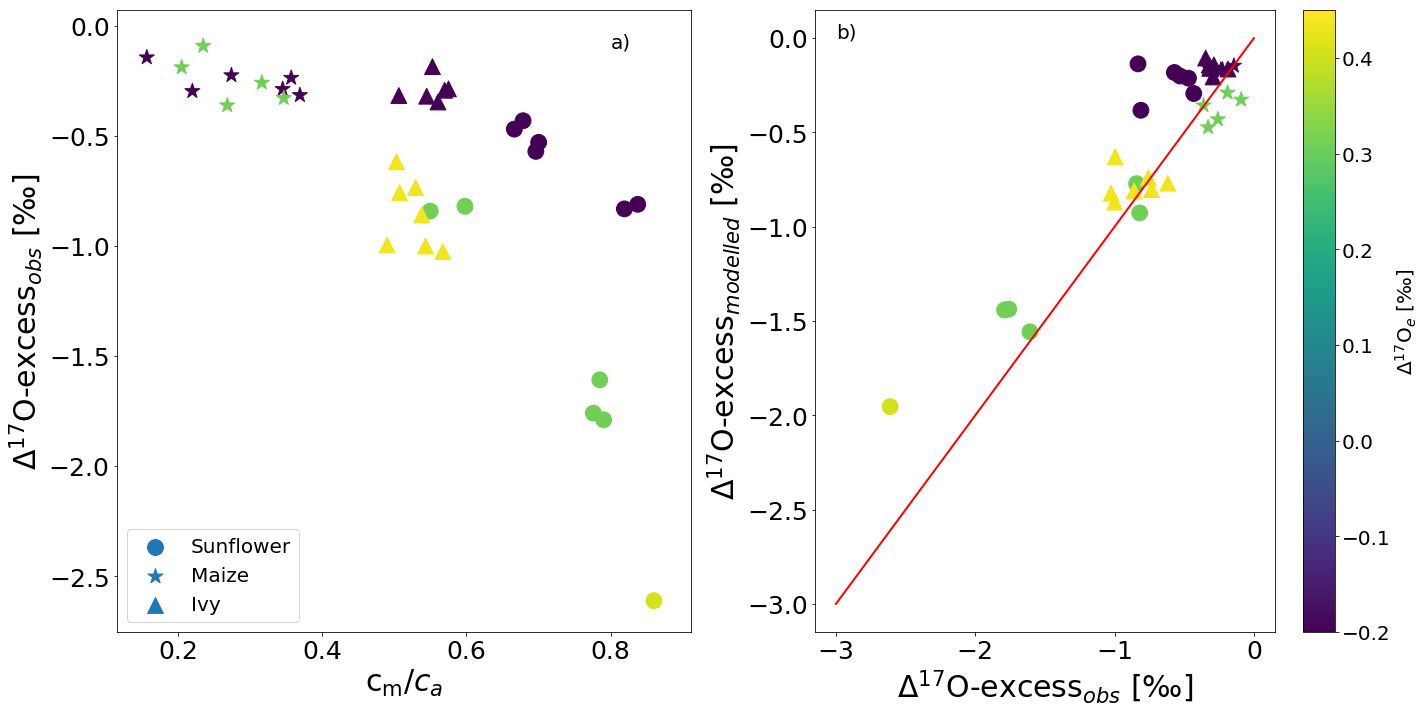

In [483]:
#c=np.abs(y2),linewidths=3


fig,(ax,ax4)=plt.subplots(1,2,figsize=(20,10))
########highlight Maiz###
###########################
##############################
# graph = plt.scatter(my_array, my_array2, c=z, cmap=plt.cm.coolwarm)
# cb = plt.colorbar(graph)
# cb.set_label('mean value')
SF_in=np.array(Sunflower["D17O_in"])
###############
############
SF=ax.scatter(Sunflower["cm_ca18"],Sunflower["D17O_excess_obs"],marker="o",label="Sunflower",s=250,c=SF_in,vmin=-0.2,vmax=0.45)
ax.text(0.8,-0.1,"a)",fontsize=20)
# y_SF=plt.colorbar(SF, ax=ax)
# y_SF.ax.tick_params(labelsize=20)
#ax.errorbar(Sunflower_enriched["cm_ca18"],Sunflower_enriched["D17O_excess_obs"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

M_in=np.array(Maize["D17O_in"])

M=ax.scatter(Maize["cm_ca18"],Maize["D17O_excess_obs"],marker="*",label="Maize",s=250,c=M_in,vmin=-0.2,vmax=0.45)

# y_M=plt.colorbar(M, ax=ax)
# y_M.ax.tick_params(labelsize=20)


#ax.errorbar(Maize_enriched["cm_ca18"],Maize_enriched["D17O_excess_obs"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")

###################################
#######Low light Maize
I_in=np.array(Ivy["D17O_in"])
I=ax.scatter(Ivy["cm_ca18"],Ivy["D17O_excess_obs"],marker="^",label="Ivy",s=250,c=I_in,vmin=-0.2,vmax=0.45)
# y_I=plt.colorbar(I, ax=ax)
# y_I.ax.tick_params(labelsize=20)

#ax.errorbar(Ivy_enriched["cm_ca18"],Ivy_enriched["D17O_excess_obs"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")
#ax4.errorbar(Observed_discrimination["cm_ca18"],Mesophyl_coductance["DD17_cm"],color="r",marker="o",ls="none")

######################

ax.tick_params(labelsize=25)
ax.tick_params(labelsize=25)
ax.legend(loc='lower left',fontsize=20)
#ax5=ax4.twinx()
#ax5.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["A"],ls="none")
#ax4.set_ylim(-0.01,-500)
ax.set_xlabel("$\mathregular{c_m}/{c_a}$",fontsize=30)
ax.set_ylabel("$\Delta^{17}\mathregular{O}$"+"-"+"excess"+"$_{obs}$ "+u"[\u2030]",fontsize=30)

########################################
#######################################
########################################
SF=ax4.scatter(Sunflower["D17O_excess_obs"],Sunflower["Excess_modelled"],marker="o",label="Sunflower",s=250,c=SF_in,vmin=-0.2,vmax=0.45)
#ax4.errorbar(Sunflower_enriched["D17O_excess_obs"],Sunflower_enriched["Excess_modelled"],marker="o",markersize=20,color="k",mfc='None',label="Sunflower_enriched_$\mathregular{CO_2}$",ls="none")

# y_SF=plt.colorbar(SF, ax=ax4)
# y_SF.ax.tick_params(labelsize=20)


M=ax4.scatter(Maize["D17O_excess_obs"],Maize["Excess_modelled"],marker="*",label="Maize",s=250,c=M_in,vmin=-0.2,vmax=0.45)
#ax4.errorbar(Maize_enriched["D17O_excess_obs"],Maize_enriched["Excess_modelled"],marker="*",markersize=20,color="g",mfc='None',label="Maize_enriched_$\mathregular{CO_2}$",ls="none")
# y_M=plt.colorbar(M, ax=ax4)
ax4.text(-3,0,"b)",fontsize=20)
# y_M.ax.tick_params(labelsize=20)
###################################
#######Low light Maize
I=ax4.scatter(Ivy["D17O_excess_obs"],Ivy["Excess_modelled"],marker="^",label="Ivy",s=250,c=I_in,vmin=-0.2,vmax=0.45)
y_I=plt.colorbar(I, ax=ax4)
y_I.set_label(label="$\Delta^{17}\mathregular{O}$"+"$_{e}$ "+u"[\u2030]",size=20)
y_I.ax.tick_params(labelsize=20)

#ax4.errorbar(Ivy_enriched["D17O_excess_obs"],Ivy_enriched["Excess_modelled"],marker="o",markersize=20,color="b",mfc='None',label="Ivy_enriched_$\mathregular{CO_2}$",ls="none")
#ax4.errorbar(Observed_discrimination["cm_ca18"],Mesophyl_coductance["DD17_cm"],color="r",marker="o",ls="none")
a=np.linspace(-3,0,80)
ax4.errorbar(a,a,yerr=0,color="r",linewidth=2,label="$Y=X$")
######################

ax4.tick_params(labelsize=25)
ax4.tick_params(labelsize=25)
#ax4.legend(fontsize=20)
#ax5=ax4.twinx()
#ax5.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["A"],ls="none")
#ax4.set_ylim(-0.01,-500)
ax4.set_xlabel("$\Delta^{17}\mathregular{O}$"+"-"+"excess"+"$_{obs}$ "+u"[\u2030]",fontsize=30)
ax4.set_ylabel("$\Delta^{17}\mathregular{O}$"+"-"+"excess"+"$_{modelled}$ "+u"[\u2030]",size=30)

fig.tight_layout()
plt.savefig("/Users/getachew/surfdrive/Photosynthesis/Second_phase_Experiment/Photosynthesis paper/Discrimination_Excess_VS_17O_Modelled_allTogether_Phillip.eps")
plt.show()





# To have one color bar

# Comparison between bulk leaf water measured by fluorination technique (Amaelle) and leaf water at the evaporating site based on the measurements by LGR

In [484]:
Bulk_vs_Eva=pd.read_excel("/Users/getachew/surfdrive/Photosynthesis/Second_phase_Experiment/Photosynthesis paper/landias/Bulk_leaf_water_Amellea_2019.xlsx"
                        ,sheet_name=2)

In [485]:
Bulk_vs_Eva_1=Bulk_vs_Eva.dropna()

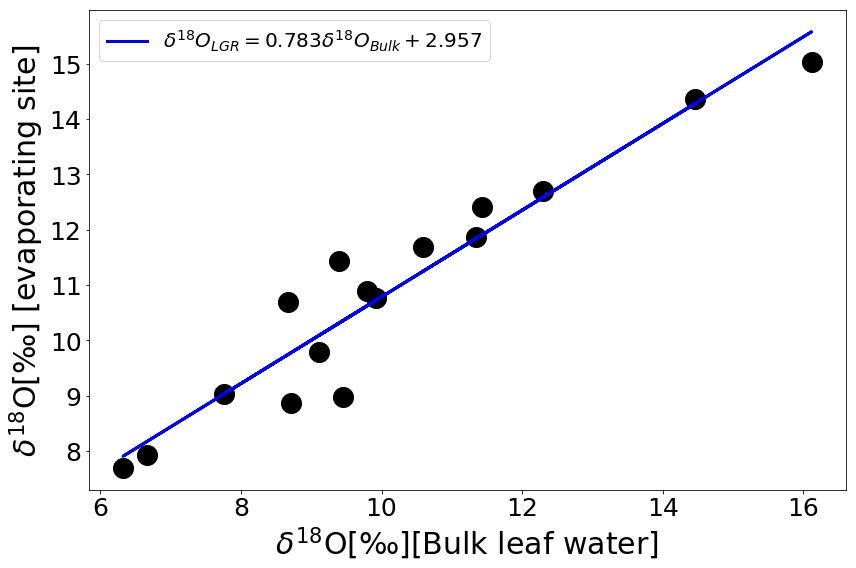

In [486]:
fig,ax=plt.subplots(figsize=(12,8))
########highlight Maiz###

ax.plot(Bulk_vs_Eva_1["landais_d18O"],Bulk_vs_Eva_1["LGR-d18O"],marker="o",markersize=20,color="k",label="",ls="none")

def relation_slope(x, m,c):
     return m * x+c

# # curve fit
#p1_E = (1.,1.e-3,1.) # starting search koefs
opt_E, pcov_E = curve_fit(relation_slope, Bulk_vs_Eva_1["landais_d18O"], Bulk_vs_Eva_1["LGR-d18O"])
m,c = opt_E
# # test result
x_E =Bulk_vs_Eva_1["landais_d18O"]
y_E =relation_slope(x_E, m,c)
ax.plot(x_E, y_E, color='b', label='$\delta^{18}O_{LGR} = %.3f \delta^{18}O_{Bulk}%+.3f$' % (m,c),linewidth=3)

######################

ax.tick_params(labelsize=25)
ax.tick_params(labelsize=25)
ax.legend(fontsize=20)
#ax5=ax4.twinx()
#ax5.errorbar(Observed_discrimination["Ci/Ca"],Observed_discrimination["A"],ls="none")
#ax4.set_ylim(-0.01,-500)
ax.set_xlabel("$\delta^{18}\mathregular{O}$"+ u"[\u2030]"+ "[Bulk leaf water]",fontsize=30)
ax.set_ylabel("$\delta^{18}\mathregular{O}$"+u"[\u2030]"+" [evaporating site]",fontsize=30)

fig.tight_layout()
plt.savefig("/Users/getachew/surfdrive/Photosynthesis/Second_phase_Experiment/Photosynthesis paper/Bulk_vs_Evaporating_site.eps")
plt.show()



# Correlation in the d17O and d18O of the CO2 leaving and entering the leaf

In [487]:
Correlation_d18O_vs_d17O=pd.read_excel("/Users/getachew/surfdrive/Photosynthesis/Second_phase_Experiment/Photosynthesis paper/Summary_photosynthesis_Final_#IVY.xlsx"
                        ,sheet_name=1)

### Calculating concetration of CO2 in the mesophyll cell and degree of equilibration using the equation for $\delta^{17}$O and $\delta^{18}$O discrimination 

### $\Delta^{18}O=\frac{a_{bs}+\epsilon\Big[\theta\Delta^{18}O_{ea}-(1-\theta)\frac{a_{bs}}{\epsilon+1}\Big]}{1-\epsilon\Big[\theta\Delta^{18}O_{ea}-(1-\theta)\frac{a_{bs}}{\epsilon+1}\Big]}$

In [488]:
#Photo_summary=Photo_summary.dropna()

a_a=((Photo_summary["c_o"]-c_s)*a_18b+(c_s-Gas_exchange["C_i"])*a_18s+Gas_exchange["C_i"]*a_18w)/(Photo_summary["c_o"]) 
b_b=((Photo_summary["c_o"]-c_s)*a_17b+(c_s-Gas_exchange["C_i"])*a_17s+Gas_exchange["C_i"]*a_17w)/(Photo_summary["c_o"]) 
D18O_eaa=1000*(Mesophyl_coductance["d18O_ce"]-Photo_summary["d18O_out"])/(Photo_summary["d18O_out"]+1000)
D17O_eaa=1000*(Mesophyl_coductance["d17O_ce"]-Photo_summary["d17O_out "])/(Photo_summary["d17O_out "]+1000)
g_18=-Observed_discrimination["D18O_obs"]*D18O_eaa/1000-Observed_discrimination["D18O_obs"]*a_a-D18O_eaa-a_a
h_17=-Observed_discrimination["D17O_obs"]*D17O_eaa/1000-Observed_discrimination["D17O_obs"]*b_b-D17O_eaa-b_b
z_18=(Observed_discrimination["D18O_obs"]*a_18w-a_18w)/Photo_summary["c_o"]
j_17=(Observed_discrimination["D17O_obs"]*a_17w-a_17w)/Photo_summary["c_o"]
u_18=Photo_summary["c_o"]*a_a-Observed_discrimination["D18O_obs"]*Photo_summary["c_o"]
q_17=Photo_summary["c_o"]*b_b-Observed_discrimination["D17O_obs"]*Photo_summary["c_o"]
p=(Observed_discrimination["D17O_obs"]*a_18w*j_17-Photo_summary["c_o"]*a_18w*j_17
   +Photo_summary["c_o"]*a_17w*z_18+Observed_discrimination["D17O_obs"]*a_17w*z_18)
y=(Observed_discrimination["D18O_obs"]*a_18w*h_17-Photo_summary["c_o"]*a_18w*h_17-Photo_summary["c_o"]*a_a*j_17
  -Observed_discrimination["D18O_obs"]*a_a*j_17-Observed_discrimination["D17O_obs"]*a_17w*g_18
  +Photo_summary["c_o"]*z_18*a_17w+Photo_summary["c_o"]*b_b*z_18+g_18*Photo_summary["c_o"]*a_17w)
N=(u_18*j_17-Photo_summary["c_o"]*a_18w*j_17-Photo_summary["c_o"]*a_18w*h_17-Photo_summary["c_o"]*a_a*h_17
  -Observed_discrimination["D18O_obs"]*a_a*h_17-q_17*z_18+g_18*Photo_summary["c_o"]*a_17w-g_18*Photo_summary["c_o"]*b_b)
s=u_18*h_17-g_18*q_17

In [364]:
def poly_func(cm):
    return a*cm**3+b*cm**2+c*cm+d
d=s
c=N
b=y
a=p

roots = np.zeros((len(d),3))
for i in range(len(d)):
    roots[i,:] = (np.roots([a[i], b[i], c[i], d[i]]))

print(roots)

[[2.16382663e+00 1.98341291e-03 1.02199418e-04]
 [1.83050499e+00 1.78387041e-03 1.18122363e-04]
 [1.49584625e+00 1.23174820e-03 1.77404198e-04]
 [2.15307179e+00 2.02802964e-03 1.02867008e-04]
 [1.73027433e+00 1.79888432e-03 1.15513035e-04]
 [1.61410649e+00 1.36787288e-03 1.52558068e-04]
 [1.29622079e+00 1.14403098e-03 1.86446674e-04]
 [1.18366214e+00 1.19167702e-03 1.81242657e-04]
 [1.60712032e+00 1.45200846e-03 1.48350123e-04]
 [1.48022230e+00 1.34026976e-03 1.58604246e-04]
 [2.11646721e+00 2.19949441e-03 9.36680246e-05]
 [2.00907565e+00 2.34686213e-03 8.98292446e-05]
 [3.49170870e+00 4.34705412e-03 4.08973799e-05]
 [3.61407506e+00 5.13999021e-03 3.28479062e-05]
 [4.13501176e+00 7.04198284e-03 1.85904443e-05]
 [3.73558662e+00 6.01231828e-03 2.66254079e-05]
 [3.75173770e+00 5.52329911e-03 3.08736450e-05]
 [3.99425877e+00 5.98317882e-03 2.41433666e-05]
 [4.02512309e+00 4.69125763e-03 3.48100840e-05]
 [3.54840588e+00 4.24298123e-03 4.03759867e-05]
 [4.09812921e+00 4.67145889e-03 3.723903

In [365]:
Cm_modelled=roots[:, 2] ## taking only root # 3

In [179]:
Cm_modelled

array([1.02199418e-04, 1.18122363e-04, 1.77404198e-04, 1.02867008e-04,
       1.15513035e-04, 1.52558068e-04, 1.86446674e-04, 1.81242657e-04,
       1.48350123e-04, 1.58604246e-04, 9.36680246e-05, 8.98292446e-05,
       4.08973799e-05, 3.28479062e-05, 1.85904443e-05, 2.66254079e-05,
       3.08736450e-05, 2.41433666e-05, 3.48100840e-05, 4.03759867e-05,
       3.72390359e-05, 3.54200379e-05, 2.81370308e-05, 7.12186982e-05,
       7.05309422e-05, 7.08518482e-05, 7.77563486e-05, 6.76810461e-05,
       7.82429616e-05, 6.78589012e-05, 8.16837082e-05, 7.48757181e-05,
       7.06284545e-05, 7.67249576e-05, 8.69418825e-05, 8.15253425e-05])

In [180]:
Numinator_theta=(a_a*Photo_summary["c_o"]-Photo_summary["c_o"]*Cm_modelled*a_18w-Cm_modelled*(Photo_summary["c_o"]*
                a_a- Photo_summary["c_o"]*a_18w*Cm_modelled)-Observed_discrimination["D18O_obs"]*Photo_summary["c_o"]-
                Observed_discrimination["D18O_obs"]*Cm_modelled*(a_a-(Cm_modelled*a_18w/Photo_summary["c_o"])))

In [181]:
Dinominator_theta=(-0.001*Observed_discrimination["D18O_obs"]*Cm_modelled*D18O_eaa-Observed_discrimination["D18O_obs"]*Cm_modelled*
                  (a_a-(Cm_modelled*a_18w/Photo_summary["c_o"]))-Cm_modelled*D18O_eaa-Cm_modelled*(a_a-(Cm_modelled*a_18w/Photo_summary["c_o"])))

In [182]:
degree_equi_modelled=Numinator_theta/Dinominator_theta

In [183]:
degree_equi_modelled

0     2.124163
1     2.160237
2     2.294807
3     2.113222
4     2.168139
5     2.230832
6     2.365997
7     2.408549
8     2.224458
9     2.268331
10    2.099295
11    2.115183
12    2.048013
13    2.046721
14    1.999555
15    1.969210
16    1.918933
17    2.103484
18    2.056325
19    2.068435
20    2.015465
21    1.998909
22    2.047117
23    2.075662
24    2.062363
25    2.093048
26    2.097968
27    2.081971
28    2.077667
29    2.055561
30    2.126050
31    2.077389
32    2.163622
33    2.093230
34    2.117161
35    2.104727
dtype: float64

In [184]:
degree_equi_modelled

0     2.124163
1     2.160237
2     2.294807
3     2.113222
4     2.168139
5     2.230832
6     2.365997
7     2.408549
8     2.224458
9     2.268331
10    2.099295
11    2.115183
12    2.048013
13    2.046721
14    1.999555
15    1.969210
16    1.918933
17    2.103484
18    2.056325
19    2.068435
20    2.015465
21    1.998909
22    2.047117
23    2.075662
24    2.062363
25    2.093048
26    2.097968
27    2.081971
28    2.077667
29    2.055561
30    2.126050
31    2.077389
32    2.163622
33    2.093230
34    2.117161
35    2.104727
dtype: float64

In [185]:
d18O_frac=((Photo_summary["c_o"]-c_s)*a_18b/1000+(c_s-Gas_exchange["C_i"])*a_18s/1000+Gas_exchange["C_i"]*a_18w/1000)/(Photo_summary["c_o"]) 
d17O_frac=((Photo_summary["c_o"]-c_s)*a_17b/1000+(c_s-Gas_exchange["C_i"])*a_17s/1000+Gas_exchange["C_i"]*a_17w/1000)/(Photo_summary["c_o"]) 
D18O_eaa=(Mesophyl_coductance["d18O_ce"]-Photo_summary["d18O_out"])/(Photo_summary["d18O_out"]/1000+1)
D17O_eaa=(Mesophyl_coductance["d17O_ce"]-Photo_summary["d17O_out "])/(Photo_summary["d17O_out "]/1000+1)
C18=-Observed_discrimination["D18O_obs"]*D18O_eaa/1000-(Observed_discrimination["D18O_obs"]/1000)*d18O_frac-D18O_eaa-d18O_frac
F17=-Observed_discrimination["D17O_obs"]*D17O_eaa/1000-(Observed_discrimination["D17O_obs"]/1000)*d17O_frac-D17O_eaa-d17O_frac
D18=(-Observed_discrimination["D18O_obs"]/1000)*d18O_frac+d18O_frac*Photo_summary["c_o"]
E17=(-Observed_discrimination["D17O_obs"]/1000)*d17O_frac+d17O_frac*Photo_summary["c_o"]

Q18=((Observed_discrimination["D17O_obs"]*Observed_discrimination["D18O_obs"]*a_18w*a_17w*1e-12+
Observed_discrimination["D18O_obs"]*a_18w*a_17w*1e-09+Observed_discrimination["D17O_obs"]*a_18w*a_17w*1e-09+
    a_18w*a_17w*1e-06)/(Photo_summary["c_o"]**2))

X18=((Observed_discrimination["D17O_obs"]*Observed_discrimination["D18O_obs"]*a_17w*1e-09+
    Observed_discrimination["D18O_obs"]*a_17w*1e-06-
     Observed_discrimination["D17O_obs"]*Observed_discrimination["D18O_obs"]*a_17w*1e-09*d18O_frac-
    Observed_discrimination["D18O_obs"]*a_17w*1e-06*d18O_frac+
     Observed_discrimination["D18O_obs"]*a_18w*E17*1e-06-
    Observed_discrimination["D17O_obs"]*a_17w*1e-06*d18O_frac-a_18w*E17*1e-03-a_17w*d18O_frac*1e-03)/(Photo_summary["c_o"])-
    Observed_discrimination["D17O_obs"]*a_18w*a_17w*1e-09/Photo_summary["c_o"]-
    a_18w*a_17w*1e-06/Photo_summary["c_o"])

Y18=(D18*Observed_discrimination["D17O_obs"]*a_17w*1e-06/Photo_summary["c_o"]+
     D18*a_17w*1e-03/Photo_summary["c_o"]+
    Observed_discrimination["D18O_obs"]*1e-03*E17-
     Observed_discrimination["D18O_obs"]*1e-03*E17*d18O_frac-
    E17*a_18w*1e-03-
     d18O_frac*E17)


Z18=D18*E17



Q17=(Observed_discrimination["D18O_obs"]*Observed_discrimination["D17O_obs"]*a_17w*a_18w*1e-12/Photo_summary["c_o"]+
    Observed_discrimination["D17O_obs"]*a_17w*a_18w*1e-09/Photo_summary["c_o"]+
    Observed_discrimination["D18O_obs"]*a_17w*a_18w*1e-09/(Photo_summary["c_o"]**2)+
    a_17w*a_18w*1e-06/(Photo_summary["c_o"]**2))


X17=(Observed_discrimination["D18O_obs"]*Observed_discrimination["D17O_obs"]*a_18w*1e-09/Photo_summary["c_o"]+
    Observed_discrimination["D17O_obs"]*a_18w*1e-06/Photo_summary["c_o"]-
    Observed_discrimination["D17O_obs"]*Observed_discrimination["D18O_obs"]*a_18w*1e-09*d17O_frac/Photo_summary["c_o"]+
    Observed_discrimination["D17O_obs"]*a_18w*d17O_frac*1e-06/Photo_summary["c_o"]+
    Observed_discrimination["D17O_obs"]*C18*a_17w*1e-06-
    Observed_discrimination["D18O_obs"]*a_18w*a_17w*1e-09/Photo_summary["c_o"]-
    a_17w*a_18w*1e-06/Photo_summary["c_o"]-
     Observed_discrimination["D17O_obs"]*d17O_frac*a_18w*1e-06/Photo_summary["c_o"]-
    d17O_frac*a_18w*1e-03/Photo_summary["c_o"]+
     a_17w*C18*1e-03/Photo_summary["c_o"])


Y17=(Observed_discrimination["D18O_obs"]*a_18w*1e-06*F17/Photo_summary["c_o"]+
     a_18w*1e-03*F17/Photo_summary["c_o"]+
    Observed_discrimination["D17O_obs"]*1e-03*C18-
     Observed_discrimination["D17O_obs"]*1e-03*d17O_frac*C18-
    a_17w*1e-03*C18-
     d17O_frac*C18)
Z17=F17*C18




In [186]:
Q_t=Q18-Q17
X_t=X18-X17
Y_t=Y18-Y17
Z_t=Z18-Z17


In [187]:
def Modified_func(cm):
    return a*cm**3+b*cm**2+c*cm+d
h=Q_t
g=X_t
f=Y_t
e=Z_t

roots1 = np.zeros((len(d),3))
for i in range(len(d)):
    roots1[i,:] = (np.roots([h[i], g[i], f[i], e[i]]))

print(roots1)

[[-3.22440525e+02 -3.31761557e+00  2.14105694e+00]
 [-3.31264675e+02 -3.35083421e+00  2.17618890e+00]
 [-1.32865853e+02 -2.71429440e+00  1.57065855e+00]
 [-3.55824554e+02 -3.49388145e+00  2.32261234e+00]
 [-3.94023688e+02 -3.46606830e+00  2.29980758e+00]
 [-1.68246130e+02 -3.02494802e+00  1.80703678e+00]
 [-1.54617483e+02 -3.10786319e+00  1.88174977e+00]
 [-2.38237482e+02 -3.24420375e+00  2.10348871e+00]
 [-2.41196376e+02 -3.32190790e+00  2.17177342e+00]
 [-2.22369574e+02 -3.20132312e+00  2.05247666e+00]
 [-5.31555043e+02 -3.75034786e+00  2.64266204e+00]
 [-6.68272752e+02 -3.87246935e+00  2.76999107e+00]
 [-1.04884494e+03 -3.76807003e+00  2.64098020e+00]
 [-1.48665429e+03 -4.13193554e+00  3.01184920e+00]
 [-2.02707016e+03 -4.04767016e+00  2.93580816e+00]
 [-1.93543084e+03 -4.16591793e+00  3.09685652e+00]
 [-1.65546532e+03 -4.05163326e+00  2.98446800e+00]
 [-1.75226709e+03 -4.18259985e+00  3.06496689e+00]
 [-1.01000918e+03 -3.72964145e+00  2.60122336e+00]
 [-9.95845480e+02 -3.74661201e+

In [188]:
Cm2_modelled=roots1[:, 2] ## taking only root # 3

In [189]:
print(Cm2_modelled/Photo_summary["c_o"])

0     5376.838123
1     5402.653671
2     3860.060334
3     5766.167687
4     5762.484548
5     4532.321999
6     4704.374420
7     5252.156583
8     5366.378605
9     5118.395649
10    6613.268377
11    6839.484116
12    6527.385565
13    7455.072284
14    7213.287855
15    7665.486433
16    7387.297034
17    7662.417215
18    6511.197392
19    6566.607861
20    7163.497454
21    7209.344874
22    7225.961898
23    4900.189783
24    5082.304493
25    4830.184576
26    5612.825401
27    5941.326982
28    5806.214896
29    5909.992878
30    5485.496788
31    5703.894270
32    6103.913819
33    6218.014401
34    6803.366940
35    6130.424914
Name: c_o, dtype: float64


In [190]:
coo=Photo_summary["c_o"]
cii=Gas_exchange["C_i"]
d18o_obs=Observed_discrimination["D18O_obs"]
d18O_ea=1000*((Mesophyl_coductance["d18O_ce"]-Photo_summary["d18O_out"])/(Photo_summary["d18O_out"]/1000+1))
d17o_obs=Observed_discrimination["D17O_obs"]
d17O_ea=1000*((Mesophyl_coductance["d17O_ce"]-Photo_summary["d17O_out "])/(Photo_summary["d17O_out "]/1000+1))




In [191]:
%%timeit
equ_cm=pd.DataFrame()
equ_cm["co"]=Photo_summary["c_o"]
equ_cm["cs"]=c_s
equ_cm["ce"]=Gas_exchange["C_i"]
equ_cm["d18O_obs"]=Observed_discrimination["D18O_obs"]
equ_cm["d17O_obs"]=Observed_discrimination["D17O_obs"]
equ_cm["d18O_ea"]=1000*((Mesophyl_coductance["d18O_ce"]-Photo_summary["d18O_out"])/(Photo_summary["d18O_out"]/1000+1))
equ_cm["d17O_ea"]=1000*((Mesophyl_coductance["d17O_ce"]-Photo_summary["d17O_out "])/(Photo_summary["d17O_out "]/1000+1))


4.84 ms ± 87.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [192]:
%%timeit
equ_cm

NameError: name 'equ_cm' is not defined

In [ ]:
%%timeit
from scipy.optimize import fsolve
#result=np.array([])

def Cm_degree_equ(x):
    cmm=x[0]
    theta=x[0]
    
    F=np.zeros((len(d18o_obs),2))
    
    F[0]=(equ_cm["d18O_obs"]-(1000*(cmm/(equ_cm["co"]-cmm))*(theta*equ_cm["d18O_ea"]-(1-theta)*(((equ_cm["co"]-equ_cm["cs"])*a_17b+(equ_cm["cs"]-equ_cm["ce"])*a_17s+(equ_cm["co"]-cmm)*a_17w)/(equ_cm["co"]-cmm))*(equ_cm["co"]-cmm)/equ_cm["co"])/
            (1000-((cmm/(equ_cm["co"]-cmm))*(theta*equ_cm["d18O_ea"]-(1-theta)*(((equ_cm["co"]-equ_cm["cs"])*a_17b+(equ_cm["cs"]-equ_cm["ce"])*a_17s+(equ_cm["co"]-cmm)*a_17w)/(equ_cm["co"]-cmm))*(equ_cm["co"]-cmm)/equ_cm["co"])))))
    
    F[1]=(equ_cm["d17O_obs"]-(1000*(cmm/(equ_cm["co"]-cmm))*(theta*equ_cm["d17O_ea"]-(1-theta)*(((equ_cm["co"]-equ_cm["cs"])*a_17b+(equ_cm["cs"]-equ_cm["ce"])*a_17s+(equ_cm["co"]-cmm)*a_17w)/(equ_cm["co"]-cmm))*(equ_cm["co"]-cmm)/equ_cm["co"])/
            (1000-((cmm/(equ_cm["co"]-cmm))*(theta*equ_cm["d17O_ea"]-(1-theta)*(((equ_cm["co"]-equ_cm["cs"])*a_17b+(equ_cm["cs"]-equ_cm["ce"])*a_17s+(equ_cm["co"]-cmm)*a_17w)/(equ_cm["co"]-cmm))*(equ_cm["co"]-cmm)/equ_cm["co"])))))
    return np.array([F])




In [ ]:
#%%timeit
for index, row in equ_cm.iterrows():
